# Intro

## Best Fit
We want to learn a hypothesis that fits the future data best. To make that precise we need a __stationary assumption__ to define “future data” and “best.” We make the stationarity assumption: that there is a probability distribution over examples that remains stationary over time.

Assumptions are called to be independent and identically distributed, connecting the past to the future/ without some such connection, all
bets are off—the future could be anything.

We define the error rate of a hypothesis as the proportion of mistakes it makes — the proportion of times that h(x) != y for an (x, y) example. Now, just because a hypothesis h has a low error rate on the training set does not mean that it will generalize well. 

### Overfitting
Happens when the model is too complex relative to the amount and noisiness of the training data.

A general phenomenon, overfitting occurs with all types of learners, even when the target function is not at all random. Overfitting becomes more likely as the
hypothesis space and the number of input attributes grows, and less likely as we increase the number of training examples  (RUSSEL and NORVIG, XXX, p.713). .
***
1. Simplify the model by selecting one with fewer parameters (e.g., a linear model rather than a high-degree polynomial model), by reducing the number of attributes in the training data, or by constraining the model.
2. Gather more training data.
3. Reduce the noise in the training data (e.g., fix data errors and remove outliers).

### Regularization
Constraining a model to make it simpler and reduce the risk of overfitting is called regularization. 

The process of explicitly penalizing complex hypotheses is called regularization (because it looks for a function that is more regular, or less complex). The choice of regularization function depends on the hypothesis space. (RUSSEL and NORVIG, XXX, p.713). 

The amount of regularization to apply during learning can be controlled by a hyper‐
parameter. 

### Underfitting
The opposite of overfitting: it occurs when your model is too simple to learn the underlying structure of the data. For example, a linear model of life satisfaction is prone to underfit; reality is just more complex than the model, so its predictions are bound to be inaccurate, even on the training examples.
***
1. Select a more powerful model, with more parameters;
2. Feed better features to the learning algorithm (feature engineering).;
3. Reduce the constraints on the model (e.g., reduce the regularization hyperparameter).

It is common to use 80% of the data for training and hold out 20%
for testing. However, this depends on the size of the dataset: if it
contains 10 million instances, then holding out 1% means your test
set will contain 100,000 instances, probably more than enough to
get a good estimate of the generalization error.

### Holdout validation

You simply hold out part of the training set to evaluate several candidate models and select the best one. The new held-out set is called the __validation set__ (or sometimes the development set, or dev set). More specifically, you train multiple models with various hyperparameters on the reduced training set (i.e., the full training set minus the validation set), and you select the model that performs best on the validation set. After this __holdout validation process__, you train the best model on the full training set (including the validation set), and this gives you the final model. Lastly, you evaluate this final model on the test set to get an estimate of the generalization error.

If the validation set is too small, then model evaluations will be imprecise: you may end up selecting a suboptimal model by mistake.

Conversely, if the validation set is too large, then the remaining training set will be much smaller than the full training set. Why is this bad? Well, since the final model will be trained on the full training set, it is not ideal to compare candidate models trained on a much smaller training set. It would be like selecting the fastest sprinter to participate in a marathon.

This method has the disadvantage that it fails to use all the available data; if we use half the data for the test set, then we are only training on half
the data, and we may get a poor hypothesis. On the other hand, if we reserve only 10% of the data for the test set, then we may, by statistical chance, get a poor estimate of the actual accuracy (RUSSEL and NORVIG, XXX, p.708).

### Cross-validation

One way to solve this problem is to perform repeated __cross-validation__, using many small validation sets. Each model is evaluated once per validation set after it is trained on the rest of the data. By averaging out all the evaluations of a model, you get a much more accurate measure of its performance. There is a drawback, however: the training time is multiplied by the number of validation sets.

We can squeeze more out of the data and still get an accurate estimate using a technique __k-fold cross-validation__ called k-fold cross-validation. The idea is that each example serves double duty—as training data and test data. First we split the data into __k__ equal subsets. We then perform __k__ rounds of learning; on each round __1/k__ of the data is held out as a test set and the remaining examples are used as training data. The average test set score of the __k__ rounds should then be a better estimate than a single score. Popular values for k are 5 and 10—enough to give an estimate that is statistically likely to be accurate, at a cost of 5 to 10 times longer computation time (RUSSEL and NORVIG, XXX, p.708).

__Leave-one-out Cross-Validation__ The extreme is k = n, also known as leave-one-out cross-validation or __LOOCV__

****

This solution usually works quite well. However, if the validation set is too small, then
model evaluations will be imprecise: you may end up selecting a suboptimal model by
mistake. Conversely, if the validation set is too large, then the remaining training set
will be much smaller than the full training set. Why is this bad? Well, since the final
model will be trained on the full training set, it is not ideal to compare candidate
models trained on a much smaller training set. It would be like selecting the fastest
sprinter to participate in a marathon. One way to solve this problem is to perform
repeated cross-validation, using many small validation sets. Each model is evaluated
once per validation set after it is trained on the rest of the data. By averaging out all
the evaluations of a model, you get a much more accurate measure of its perfor‐
mance. There is a drawback, however: the training time is multiplied by the number
of validation sets.

### Sampling
1. __Sampling noise__ - Nonrepresentative data as a result of chance  if the sample is too small
2. __Sampling bias__ - Nonrepresentative if the sampling method is flawed even in very large samples
***
If some instances are clearly outliers, it may help to simply discard them or try to fix the errors manually.

If some instances are missing a few features (e.g., 5% of your customers did not specify their age), you must decide whether you want to ignore this attribute alto gether, ignore these instances, fill in the missing values (e.g., with the median age), or train one model with the feature and one model without it.

## Teoria

### Peeking

Peeking is a consequence of using test-set performance to both choose a hypothesis and evaluate it. The way to avoid this is to really hold the test set out—lock it away until you are completely done with learning and simply wish to obtain an independent evaluation of the final hypothesis.

Example: A learning algorithm has various “knobs” that can be twiddled to tune its behavior—for example, various different criteria for choosing the next attribute in decision tree learning. The researcher generates hypotheses for various different settings of the knobs, measures their error rates on the test set, and reports the error rate of the best hypothesis. Alas, peeking has occurred!

#### Validation Set

If the test set is locked away, but you still want to measure performance on unseen data as a way of selecting a good hypothesis, then divide the available data (without the test set) into a training training set and a __validation set__. (RUSSEL and NORVIG, XXX, p.708).



### Data Mismatch
One solution is to hold out some of the training pictures (from the web) in yet another set that Andrew Ng calls the __train-dev set__. After the model is trained (on the training set, not on the train-dev set), you can evaluate it on the train-dev set.

If it performs well, then the model is not overfitting the training set. If it performs poorly on the validation set, the problem must be coming from the data mismatch. You can try to tackle this problem by preprocessing the web images to make them look more like the pictures that will be taken by the mobile app, and then retraining the model.

Conversely, if the model performs poorly on the train-dev set, then it must have over‐ fit the training set, so you should try to simplify or regularize the model, get more training data, and clean up the training data.

A model is a simplified version of the observations. The simplifications are meant to
discard the superfluous details that are unlikely to generalize to new instances. To
decide what data to discard and what data to keep, you must make assumptions. For
example, a linear model makes the assumption that the data is fundamentally linear
and that the distance between the instances and the straight line is just noise, which
can safely be ignored

Frame the Problem and Look at the Big Picture
1. Define the objective in business terms.
2. How will your solution be used?
3. What are the current solutions/workarounds (if any)?
4. How should you frame this problem (supervised/unsupervised, online/offline,
etc.)?
5. How should performance be measured?
6. Is the performance measure aligned with the business objective?
7. What would be the minimum performance needed to reach the business objec‐
tive?
8. What are comparable problems? Can you reuse experience or tools?
9. Is human expertise available?
10. How would you solve the problem manually?
11. List the assumptions you (or others) have made so far.
12. Verify assumptions if possible.

Get the Data
Note: automate as much as possible so you can easily get fresh data.
1. List the data you need and how much you need.
2. Find and document where you can get that data.
3. Check how much space it will take.
4. Check legal obligations, and get authorization if necessary.
5. Get access authorizations.
6. Create a workspace (with enough storage space).
7. Get the data.
8. Convert the data to a format you can easily manipulate (without changing the
data itself).
9. Ensure sensitive information is deleted or protected (e.g., anonymized).
10. Check the size and type of data (time series, sample, geographical, etc.).
11. Sample a test set, put it aside, and never look at it (no data snooping!)

Explore the Data
Note: try to get insights from a field expert for these steps.
1. Create a copy of the data for exploration (sampling it down to a manageable size
if necessary).
2. Create a Jupyter notebook to keep a record of your data exploration.
3. Study each attribute and its characteristics:
• Name
• Type (categorical, int/float, bounded/unbounded, text, structured, etc.)
% of missing values
• Noisiness and type of noise (stochastic, outliers, rounding errors, etc.)
• Usefulness for the task
• Type of distribution (Gaussian, uniform, logarithmic, etc.)
4. For supervised learning tasks, identify the target attribute(s).
5. Visualize the data.
6. Study the correlations between attributes.
7. Study how you would solve the problem manually.
8. Identify the promising transformations you may want to apply.
9. Identify extra data that would be useful (go back to “Get the Data” on page 756).
10. Document what you have learned

Prepare the Data
Notes:
• Work on copies of the data (keep the original dataset intact).
• Write functions for all data transformations you apply, for five reasons:
— So you can easily prepare the data the next time you get a fresh dataset
— So you can apply these transformations in future projects
— To clean and prepare the test set
— To clean and prepare new data instances once your solution is live
— To make it easy to treat your preparation choices as hyperparameters
1. Data cleaning:
• Fix or remove outliers (optional).
• Fill in missing values (e.g., with zero, mean, median…) or drop their rows (or
columns).
2. Feature selection (optional):
• Drop the attributes that provide no useful information for the task.
3. Feature engineering, where appropriate:
• Discretize continuous features
Decompose features (e.g., categorical, date/time, etc.).
• Add promising transformations of features (e.g., log(x), sqrt(x), x2, etc.).
• Aggregate features into promising new features.
4. Feature scaling:
• Standardize or normalize features.

Shortlist Promising Models
Notes:
• If the data is huge, you may want to sample smaller training sets so you can train
many different models in a reasonable time (be aware that this penalizes complex
models such as large neural nets or Random Forests).
• Once again, try to automate these steps as much as possible.
1. Train many quick-and-dirty models from different categories (e.g., linear, naive
Bayes, SVM, Random Forest, neural net, etc.) using standard parameters.
2. Measure and compare their performance.
• For each model, use N-fold cross-validation and compute the mean and stan‐
dard deviation of the performance measure on the N folds.
3. Analyze the most significant variables for each algorithm.
4. Analyze the types of errors the models make.
• What data would a human have used to avoid these errors?
5. Perform a quick round of feature selection and engineering.
6. Perform one or two more quick iterations of the five previous steps.
7. Shortlist the top three to five most promising models, preferring models that
make different types of errors.

Fine-Tune the System
Notes:
• You will want to use as much data as possible for this step, especially as you move
toward the end of fine-tuning
As always, automate what you can.
1. Fine-tune the hyperparameters using cross-validation:
• Treat your data transformation choices as hyperparameters, especially when
you are not sure about them (e.g., if you’re not sure whether to replace missing
values with zeros or with the median value, or to just drop the rows).
• Unless there are very few hyperparameter values to explore, prefer random
search over grid search. If training is very long, you may prefer a Bayesian
optimization approach (e.g., using Gaussian process priors, as described by
Jasper Snoek et al.).1
2. Try Ensemble methods. Combining your best models will often produce better
performance than running them individually.
3. Once you are confident about your final model, measure its performance on the
test set to estimate the generalization error.
Don’t tweak your model after measuring the generalization error:
you would just start overfitting the test set.

### Best Hypothesis
You can think of the task of finding the best hypothesis as two tasks: model selection defines the OPTIMIZATION hypothesis space and then optimization finds the best hypothesis within that space

### Loss Function

In machine learning utility is what learners should maximize, and it is traditional to express utilities by means of a loss function. The loss function L(x, y, yˆ) is defined as the amount of utility lost by predicting h(x) = ˆ y when the correct answer is f(x) = y

In general small errors are better than large ones; two functions that implement that idea are the absolute value of the difference (called the L1 loss), and the square of the difference (called the L2 loss).

Absolute value loss: L1(y, yˆ) = |y − yˆ|

Squared error loss: L2(y, yˆ) = (y − yˆ)

Which regularization function should you pick? That depends on the specific problem, but L1 regularization has an important advantage: it tends to produce a sparse model. That is, it often sets many weights to zero, effectively declaring the corresponding attributes to be irrelevant. Hypotheses that
discard attributes can be easier for a human to understand, and may be less likely to overfit. (RUSSEL and NORVIG, XXX, p.708).

# 1. Dataset

In [1]:
import numpy as np, pandas as pd
import scipy
import os
import tarfile
import urllib
import logging

In [2]:
dataset = pd.read_excel('CENSO-BASE DE DADOS-para dashboard-r01.xlsx', header=1, index_col=0)

In [4]:
dataset

Unnamed: 1      Unnamed: 2 Unnamed: 3 Unnamed: 4  Unnamed: 5  \
ID            UF  ANO NASCIMENTO        Sim        Não         NaN   
1             RJ            1967          0          1         0.0   
2             SE            1980          0          1         0.0   
3             DF            1993          0          1         0.0   
4             RO            1995          0          1         0.0   
...          ...             ...        ...        ...         ...   
45381         RS            1982          1          0         0.0   
45382         DF            1968          0          1         0.0   
45383         BA            1980          0          1         0.0   
45384         SE            1980          1          0         0.0   
45385         PA            1990          0          1         0.0   

                       Unnamed: 6  \
ID     Aposentado ou Pensionistas   
1                               0   
2                               0   
3                               0   
4                               0   
...                           ...   
45381                           0   
45382                           0   
45383                           0   
45384                           0   
45385                           0   

                                              Unnamed: 7  \
ID     Assalariado (sem carteira em áreas não ligadas...   
1                                                      0   
2                                                      0   
3                                                      0   
4                                                      0   
...                                                  ...   
45381                                                  0   
45382                                                  0   
45383                                                  0   
45384                                                  0   
45385                                                  0   

                                              Unnamed: 8  \
ID     Assalariado (setor privado em áreas ligadas a ...   
1                                                      0   
2                                                      0   
3                                                      0   
4                                                      0   
...                                                  ...   
45381                                                  0   
45382                                                  0   
45383                                                  0   
45384                                                  0   
45385                                                  0   

                                              Unnamed: 9  \
ID     Assalariado (setor público em áreas ligadas a ...   
1                                                      1   
2                                                      0   
3                                                      0   
4                                                      0   
...                                                  ...   
45381                                                  0   
45382                                                  0   
45383                                                  1   
45384                                                  0   
45385                                                  0   

                                             Unnamed: 10  ...  \
ID     Assalariado (setor público em áreas não ligada...  ...   
1                                                      0  ...   
2                                                      0  ...   
3                                                      0  ...   
4                                                      0  ...   
...                                                  ...  ...   
45381                                                  1  ...   
45382                                

## 1.1 Features Engineering

Coming up with a good set of features to train on.
***
1. __Feature selection__  - Selecting the most useful features to train on among existing features. Another way to simplify models, reducing the dimensions that the models work with, when discarding discard attributes that appear to be irrelevant. (RUSSEL and NORVIG, XXX, p.713).; 
2. __Feature extraction__ - Combining existing features to produce a more useful one—as we saw earlier, dimensionality reduction algorithms can help; 
3. Creating new features by gathering new data

### 1.1.1 Feature Extraction

In [5]:
tags = [
    "UF","DATA_NASC_ANO","ATIV_ALTERNATIVA_SIM","ATIV_ALTERNATIVA_NAO","ATIV_ALTERNATIVA_NULO",
    "RENDA_FONTE_APOSENTADO","RENDA_FONTE_ASSALARIADO1","RENDA_FONTE_ASSALARIADO2","RENDA_FONTE_ASSALARIADO3","RENDA_FONTE_ASSALARIADO4",
    "RENDA_FONTE_AUTONOMO1","RENDA_FONTE_AUTONOMO2","RENDA_FONTE_EMPRESARIO1","RENDA_FONTE_EMPRESARIO2","RENDA_FONTE_OUTROS",
    "RENDA_FONTE_ALUGUEL","RENDA_FONTE_SEGURO","RENDA_FONTE_NULO","IMOVEL_SIM","IMOVEL_NAO","IMOVEL_NULO", "CARRO_SIM", "CARRO_NAO","CARRO_NULO",
    "RENDA_MENSAL_INDIV1","RENDA_MENSAL_INDIV2","RENDA_MENSAL_INDIV3","RENDA_MENSAL_INDIV4","RENDA_MENSAL_INDIV5","RENDA_MENSAL_INDIV6",
    "RENDA_MENSAL_INDIV7","RENDA_MENSAL_INDIV8","RENDA_MENSAL_INDIV_NULO",
    "RENDA_MENSAL_FAM1","RENDA_MENSAL_FAM2","RENDA_MENSAL_FAM3","RENDA_MENSAL_FAM4","RENDA_MENSAL_FAM5","RENDA_MENSAL_FAM6",
    "RENDA_MENSAL_FAM7","RENDA_MENSAL_FAM8","RENDA_MENSAL_FAM_NULO",
    "PARTICIPACAO_EVENTOS1","PARTICIPACAO_EVENTOS2","PARTICIPACAO_EVENTOS3","PARTICIPACAO_EVENTOS4","PARTICIPACAO_EVENTOS_NULO",
    "SATISFACAO_IES1","SATISFACAO_IES2","SATISFACAO_IES3","SATISFACAO_IES4","SATISFACAO_IES5","SATISFACAO_IES_NULO",
    "FONTE_PUBLI_ACADEM1","FONTE_PUBLI_ACADEM2","FONTE_PUBLI_ACADEM3","FONTE_PUBLI_ACADEM4","FONTE_PUBLI_ACADEM5","FONTE_PUBLI_ACADEM_NULO",
    "FONTE_REVISTAS_ARQ1","FONTE_REVISTAS_ARQ2","FONTE_REVISTAS_ARQ3","FONTE_REVISTAS_ARQ4","FONTE_REVISTAS_ARQ5","FONTE_REVISTAS_ARQ_NULO",
    "FONTE_LIVROS_TEC1","FONTE_LIVROS_TEC2","FONTE_LIVROS_TEC3","FONTE_LIVROS_TEC4","FONTE_LIVROS_TEC5","FONTE_LIVROS_TEC_NULO",
    "FONTE_SITES_ARQ1","FONTE_SITES_ARQ2","FONTE_SITES_ARQ3","FONTE_SITES_ARQ4","FONTE_SITES_ARQ5","FONTE_SITES_ARQ_NULO",
    "FONTE_JORNAIS1","FONTE_JORNAIS2","FONTE_JORNAIS3","FONTE_JORNAIS4","FONTE_JORNAIS5","FONTE_JORNAIS_NULO",
    "FONTE_REVISTAS1","FONTE_REVISTAS2","FONTE_REVISTAS3","FONTE_REVISTAS4","FONTE_REVISTAS5","FONTE_REVISTAS_NULO",
    "FONTE_TV_ABERTA1","FONTE_TV_ABERTA2","FONTE_TV_ABERTA3","FONTE_TV_ABERTA4","FONTE_TV_ABERTA5","FONTE_TV_ABERTA_NULO",
    "FONTE_TV_FECHADA1","FONTE_TV_FECHADA2","FONTE_TV_FECHADA3","FONTE_TV_FECHADA4","FONTE_TV_FECHADA5","FONTE_TV_FECHADA_NULO",
    "INTERNET1","INTERNET2","INTERNET3","INTERNET4","INTERNET5","INTERNET_NULO",
    "LIVROS_GERAIS1","LIVROS_GERAIS2","LIVROS_GERAIS3","LIVROS_GERAIS4","LIVROS_GERAIS5","LIVROS_GERAIS_NULO",
    "RADIO1","RADIO2","RADIO3","RADIO4","RADIO5","RADIO_NULO",
    "COM_OUTROS1","COM_OUTROS2","COM_OUTROS3","COM_OUTROS4","COM_OUTROS5","COM_OUTROS_NULO",
    "EQUIP_DESKTOP1","EQUIP_DESKTOP2","EQUIP_DESKTOP3","EQUIP_DESKTOP4","EQUIP_DESKTOP5","EQUIP_DESKTOP_NULO",
    "EQUIP_NOTEBOOK1","EQUIP_NOTEBOOK2","EQUIP_NOTEBOOK3","EQUIP_NOTEBOOK4","EQUIP_NOTEBOOK5","EQUIP_NOTEBOOK_NULO",
    "EQUIP_TABLET1","EQUIP_TABLET2","EQUIP_TABLET3","EQUIP_TABLET4","EQUIP_TABLET5","EQUIP_TABLET_NULO",
    "EQUIP_SMARTPHONE1","EQUIP_SMARTPHONE2","EQUIP_SMARTPHONE3","EQUIP_SMARTPHONE4","EQUIP_SMARTPHONE5","EQUIP_SMARTPHONE_OUTROS",
    "EQUIP_DUMBPHONE1","EQUIP_DUMBPHONE2","EQUIP_DUMBPHONE3","EQUIP_DUMBPHONE4","EQUIP_DUMBPHONE5","EQUIP_DUMBPHONE_NULO",
    "EQUIP_OUTROS1","EQUIP_OUTROS2","EQUIP_OUTROS3","EQUIP_OUTROS4","EQUIP_OUTROS5","EQUIP_OUTROS_NULO",
    "DOMINIO_INFORMATICA1","DOMINIO_INFORMATICA2","DOMINIO_INFORMATICA3","DOMINIO_INFORMATICA4","DOMINIO_INFORMATICA5","DOMINIO_INFORMATICA_NULO",
    "DOMINIO_CAD1","DOMINIO_CAD2","DOMINIO_CAD3","DOMINIO_CAD4","DOMINIO_CAD5","DOMINIO_CAD_NULO",
    "DOMINIO_GEOPROC1","DOMINIO_GEOPROC2","DOMINIO_GEOPROC3","DOMINIO_GEOPROC4","DOMINIO_GEOPROC5","DOMINIO_GEOPROC_NULO",
    "DOMINIO_SOFT_OUTROS1","DOMINIO_SOFT_OUTROS2","DOMINIO_SOFT_OUTROS3","DOMINIO_SOFT_OUTROS4","DOMINIO_SOFT_OUTROS5","DOMINIO_SOFT_OUTROS_NULO",
    "REDE_FACEBOOK_SIM","REDE_FACEBOOK_NAO","REDE_FACEBOOK_NULO",
    "REDE_TWITTER_SIM","REDE_TWITTER_NAO","REDE_TWITTER_NULO",
    "REDE_LINKED_SIM","REDE_LINKED_NAO","REDE_LINKED_NULO",
    "REDE_INSTAGRAM_SIM","REDE_INSTAGRAM_NAO","REDE_INSTAGRAM_NULO",
    "REDE_OUTRAS_SIM","REDE_OUTRAS_NAO","REDE_OUTRAS_NULO",
    "LEITURA_LIVROS1","LEITURA_LIVROS2","LEITURA_LIVROS3","LEITURA_LIVROS4","LEITURA_LIVROS5","LEITURA_LIVROS6","LEITURA_LIVROS7","LEITURA_LIVROS_NULO",
    "INTERESSES_A","INTERESSES_B","INTERESSES_C","INTERESSES_D","INTERESSES_E","INTERESSES_F","INTERESSES_G","INTERESSES_H","INTERESSES_I","INTERESSES_J",
    "IDIOMAS_INGLES_1","IDIOMAS_INGLES_2","IDIOMAS_INGLES_3","IDIOMAS_INGLES_4","IDIOMAS_INGLES_NULO",
    "IDIOMAS_FRANCES_1","IDIOMAS_FRANCES_2","IDIOMAS_FRANCES_3","IDIOMAS_FRANCES_4","IDIOMAS_FRANCES_NULO",
    "IDIOMAS_ESPANHOL_1","IDIOMAS_ESPANHOL_2","IDIOMAS_ESPANHOL_3","IDIOMAS_ESPANHOL_4","IDIOMAS_ESPANHOL_NULO",
    "IDIOMAS_OUTROS","IDIOMAS_APENAS_PT","IDIOMAS_NULO",
    "RACA_BRANCA","RACA_INDIGENA","RACA_MESTICA","RACA_PRETA","RACA_ORIENTAL","RACA_PARDA","RACA_N_INFORM","RACA_NULO",
    
    "GENERO_M_CIS","GENERO_M_TRANS","GENERO_H_CIS","GENERO_H_TRANS","GENERO_NB","GENERO_NAO_INFORM","GENERO_NULO",
    "PCD_FISICA","PCD_MENTAL","PCD_INTELECTUAL","PCD_SENSORIAL","PCD_NENHUMA","PCD_NULO",
    "PCD_A_1","PCD_A_2","PCD_A_3","PCD_A_4","PCD_A_5","PCD_A_NULO",
    "FILIADO_ABAP","FILIADO_ABEA","FILIADO_ASBEA","FILIADO_FNA","FILIADO_IAB","FILIADO_NAO_FILIADO","FILIADO_NAO_OUTROS","FILIADO_NULO",
    "EXERC_PROF_OBSTACULO_REMUNERACAO","EXERC_PROF_OBSTACULO_ACESSO_MERCADO","EXERC_PROF_OBSTACULO_VALORIZACAO_SOCIEDADE","EXERC_PROF_OBSTACULO_NULO",
    "PROF_STATUS3","PROF_STATUS2","PROF_STATUS4","PROF_STATUS1","PROF_STATUS5","PROF_STATUS_NULO",
    "PROF_EXERCICIO3","PROF_EXERCICIO2","PROF_EXERCICIO4","PROF_EXERCICIO1","PROF_EXERCICIO5","PROF_EXERCICIO_NULO",
    "PROF_REND3","PROF_REND2","PROF_REND4","PROF_REND1","PROF_REND5","PROF_REND_NULO",
    "PROF_TEC3","PROF_TEC2","PROF_TEC4","PROF_TEC1","PROF_TEC5","PROF_TEC_NULO",
    "AREATUACAO_A","AREATUACAO_B","AREATUACAO_C","AREATUACAO_D","AREATUACAO_E","AREATUACAO_F","AREATUACAO_G","AREATUACAO_H","AREATUACAO_I","AREATUACAO_J",
    "AREATUACAO_K","AREATUACAO_L","AREATUACAO_M","AREATUACAO_OUTRAS","AREATUACAO_NULO",
    "AVAL_MERCADO_AU3","AVAL_MERCADO_AU2","AVAL_MERCADO_AU1","AVAL_MERCADO_AU_SEMRESP","AVAL_MERCADO_AU_NULO",
    "AVAL_MERCADO_IMOB3","AVAL_MERCADO_IMOB2","AVAL_MERCADO_IMOB1","AVAL_MERCADO_IMOB_SEMRESP","AVAL_MERCADO_IMOB_NULO",
    "AVAL_MERCADO_HOTEL3","AVAL_MERCADO_HOTEL2","AVAL_MERCADO_HOTEL1","AVAL_MERCADO_HOTEL_SEMRESP","AVAL_MERCADO_HOTEL_NULO",
    "AVAL_MERCADO_HOSP3","AVAL_MERCADO_HOSP2","AVAL_MERCADO_HOSP1","AVAL_MERCADO_AHOSP_SEMRESP","AVAL_MERCADO_HOSP_NULO",
    "AVAL_MERCADO_INEXP_SIM","AVAL_MERCADO_INEXP_NAO","AVAL_MERCADO_INEXP_NULO",
    "DEPENDENTES_A","DEPENDENTES_B","DEPENDENTES_C","DEPENDENTES_NAO_POSSUI","DEPENDENTES_OUTROS","DEPENDENTES_NULO",
    "TRABALHA_EM_AU_SIM","TRABALHA_EM_NAO","TRABALHA_EM_NULO",
    "PJ_SIM_MISTA","PJ_SIM_UNI","PJ_NAO","PJ_NULO",
    "PJ_SIM_PRIVADA","PJ_SIM_PUBLICA","PJ_SIM_PUBLICA_PRIVADA","PJ_2_NAO","PJ_2_NULO",
    "ESCOLARIDADE1","ESCOLARIDADE2","ESCOLARIDADE3","ESCOLARIDADE4","ESCOLARIDADE5","ESCOLARIDADE_SEMRESP","ESCOLARIDADE_NULO",
    "OUTROCURSO_POSSUI_SIM","OUTROCURSO_POSSUI_NAO","OUTROCURSO_POSSUI_NULO",
    "OUTROCURSO_CURSANDO_SIM","OUTROCURSO_CURSANDO_NAO","OUTROCURSO_CURSANDO_NULO",
    "OUTROCURSO_PRETENDE_SIM","OUTROCURSO_PRETENDE_NAO","OUTROCURSO_PRETENDE_NULO",
    "SITES_CAU_BR","SITES_CAU_UF","SITES_CAU_NAO","SITES_CAU_NULO",
    "CONTRATANTES_PF","CONTRATANTES_PJ","CONTRATANTES_ORGAO_PUBLICO","CONTRATANTES_ESTRANGEIRO","CONTRATANTES_NULO",
    "REF_HONORARIOS_CUB","REF_HONORARIOS_TABELA_CAUBR","REF_HONORARIOS_TABELA_IAB","REF_HONORARIOS_M2","REF_HONORARIOS_OUTROS","REF_HONORARIOS_NULO",
    "HORAS_AU5","HORAS_AU4","HORAS_AU3","HORAS_AU2","HORAS_AU1","HORAS_AU_NAOTRAB","HORAS_AU_ESPORADICAMENTE","HORAS_AU_NULO",
    "HORAS_NAO_AU5","HORAS_NAO_AU4","HORAS_NAO_AU3","HORAS_NAO_AU2","HORAS_NAO_AU1","HORAS_NAO_AU_NAOTRAB","HORAS_NAO_AU_ESPORADICAMENTE","HORAS_NAO_AU_NULO",
    "SITE_ABAP","SITE_ABEA","SITE_ASBEA","SITE_FNA","SITE_IAB","SITE_OUTROS","SITE_NAO_FREQUENTA","SITE_NULO",
    "ATIV_PROJ_BASICO","ATIV_PROJ_EXEC","ATIV_COORD","ATIV_COMPLEMENTARES","ATIV_FISC_OBRA","ATIV_EXEC_OBRA","ATIV_NULO",
    "POLITICA_A","POLITICA_B","POLITICA_C","POLITICA_D","POLITICA_OUTROS","POLITICA_NULO",
    "DOCENTE_SIM_DE","DOCENTE_SIM_MISTO","DOCENTE_NAO","DOCENTE_NULO"
       ]


In [6]:
dic_nome = {}
for (index, colname) in enumerate(dataset):
    if index < 427:
        classe = tags[index]
        dic_nome[colname] = classe
        #print(f'{index} | {colname} | {classe}')

In [7]:
dataset.rename(dic_nome, axis=1, inplace=True)
dataset.drop(dataset.index[0], axis=0, inplace=True)
dataset

UF DATA_NASC_ANO ATIV_ALTERNATIVA_SIM ATIV_ALTERNATIVA_NAO  \
1      RJ          1967                    0                    1   
2      SE          1980                    0                    1   
3      DF          1993                    0                    1   
4      RO          1995                    0                    1   
5      GO          1987                    0                    1   
...    ..           ...                  ...                  ...   
45381  RS          1982                    1                    0   
45382  DF          1968                    0                    1   
45383  BA          1980                    0                    1   
45384  SE          1980                    1                    0   
45385  PA          1990                    0                    1   

       ATIV_ALTERNATIVA_NULO RENDA_FONTE_APOSENTADO RENDA_FONTE_ASSALARIADO1  \
1                        0.0                      0                        0   
2                        0.0                      0                        0   
3                        0.0                      0                        0   
4                        0.0                      0                        0   
5                        0.0                      0                        0   
...                      ...                    ...                      ...   
45381                    0.0                      0                        0   
45382                    0.0                      0                        0   
45383                    0.0                      0                        0   
45384                    0.0                      0                        0   
45385                    0.0                      0                        0   

      RENDA_FONTE_ASSALARIADO2 RENDA_FONTE_ASSALARIADO3  \
1                            0                        1   
2                            0                        0   
3                            0                        0   
4                            0                        0   
5                            0                        0   
...                        ...                      ...   
45381                        0                        0   
45382                        0                        0   
45383                        0                        1   
45384                        0                        0   
45385                        0                        0   

      RENDA_FONTE_ASSALARIADO4  ... POLITICA_A POLITICA_B POLITICA_C  \
1                            0  ...          0          1          0   
2                            0  ...          0          1          0   
3                            0  ...          0          0          0   
4                            0  ...          0          0          1   
5                            0  ...          0          0          0   
...                        ...  ...        ...        ...        ...   
45381                        1  ...          1          0          0   
45382                        0  ...          0          1          0   
45383                        0  ...          0          1          0   
45384                        0  ...          0          0          0   
45385                        0  ...          0          0          0   

      POLITICA_D POLITICA_OUTROS POLITICA_NULO DOCENTE_SIM_DE  \
1              0               0           0.0              0   
2              0               0           0.0              0   
3              0               0           1.0              0   
4              0               0           0.0              0   
5              0               0           1.0              0   
...          ...             ...           ...            ...   
45381          0               0           0.0              0   
45382          0               0           0.0              0   
45383          0               0           0.0            

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45385 entries, 1 to 45385
Columns: 427 entries, UF to DOCENTE_NULO
dtypes: float64(76), object(351)
memory usage: 148.2+ MB


In [8]:
df = dataset.copy()

### 1.1.2 Feature Transformation

In [9]:
UF_nordeste = ['CE','PI','SE','PE','BA','MA','RN','PB','AL']
UF_norte = ['AP','AM','PA','AC','RO','RR','TO']
UF_sudeste = ['MG','ES','RJ','SP']
UF_centroeste = ['GO','MT','MS','DF']
UF_sul = ['PR','SC','RS']

In [10]:
for index, row in df.iterrows():
    row = row.copy()
    
    indice_renda_m_individual = ((row['RENDA_MENSAL_INDIV1']) + (row['RENDA_MENSAL_INDIV2']*2) + (row['RENDA_MENSAL_INDIV3']*3) + (row['RENDA_MENSAL_INDIV4']*4) + (row['RENDA_MENSAL_INDIV5']*5) + (row['RENDA_MENSAL_INDIV6']*6) + (row['RENDA_MENSAL_INDIV7']*7) + (row['RENDA_MENSAL_INDIV8']*8))
    if (indice_renda_m_individual == 0): indice_renda_m_individual = np.nan
    #if (indice_renda_m_individual == 0): indice_renda_m_individual = 0
    df.at[index, 'RENDA_M_INDIVIDUAL'] = indice_renda_m_individual
    #print(indice_renda_m_individual)
    
    indice_renda_m_fam = ((row['RENDA_MENSAL_FAM1']) + (row['RENDA_MENSAL_FAM2']*2) + (row['RENDA_MENSAL_FAM3']*3) + (row['RENDA_MENSAL_FAM4']*4) + (row['RENDA_MENSAL_FAM5']*5) + (row['RENDA_MENSAL_FAM6']*6) + (row['RENDA_MENSAL_FAM7']*7) + (row['RENDA_MENSAL_FAM8']*8))
    if (indice_renda_m_fam == 0): indice_renda_m_fam = np.nan
    #if (indice_renda_m_fam == 0): indice_renda_m_fam = 0
    df.at[index, 'RENDA_M_FAMILIAR'] = indice_renda_m_fam
    #print(indice_renda_m_fam)
    
    indice_renda_extra = (row['RENDA_FONTE_OUTROS']*1)+(row['RENDA_FONTE_ALUGUEL']*1)+(row['RENDA_FONTE_SEGURO']*1)+(row['RENDA_FONTE_APOSENTADO']*1)
    if (indice_renda_extra == 0): indice_renda_extra = np.nan
    #if (indice_renda_extra == 0): indice_renda_extra = 0
    df.at[index, 'FONTE_RENDA_EXTRA'] = indice_renda_extra
    
    indice_renda_nao_au = (row['RENDA_FONTE_ASSALARIADO1']*1)+(row['RENDA_FONTE_ASSALARIADO4']*1)+(row['RENDA_FONTE_AUTONOMO2']*1)+(row['RENDA_FONTE_EMPRESARIO2']*1)
    if (indice_renda_nao_au == 0): indice_renda_nao_au = np.nan
    #if (indice_renda_nao_au == 0): indice_renda_nao_au = 0
    df.at[index, 'FONTE_RENDA_NAO_AU'] = indice_renda_nao_au
    
    indice_renda_au = (row['RENDA_FONTE_ASSALARIADO2']*1)+(row['RENDA_FONTE_ASSALARIADO3']*1)+(row['RENDA_FONTE_AUTONOMO1']*1)+(row['RENDA_FONTE_EMPRESARIO1']*1)
    if (indice_renda_au == 0): indice_renda_au = np.nan
    #if (indice_renda_au == 0): indice_renda_au = 0
    df.at[index, 'FONTE_RENDA_AU'] = indice_renda_au    
    
    #indice_horas_trab_au = ((row['HORAS_AU5']*5)+(row['HORAS_AU4']*4) + (row['HORAS_AU3']*3) + (row['HORAS_AU2']*2) + (row['HORAS_AU1']*1) + (row['HORAS_AU_ESPORADICAMENTE']*0.5))
    #if (indice_horas_trab_au == 0): indice_horas_trab_au = np.nan
    #df2.at[index, "INDICE_HORAS_TRAB_AU"] = indice_horas_trab_au
    
    indices_filiado_entidades = (row['FILIADO_ABAP']+row['FILIADO_ABEA']+row['FILIADO_ASBEA']+row['FILIADO_FNA']+row['FILIADO_IAB']+row['FILIADO_NAO_OUTROS'])
    if (indices_filiado_entidades == 0) and (row["FILIADO_NAO_FILIADO"] != 1): indices_filiado_entidades = np.nan
    #if (indices_filiado_entidades == 0) and (row["FILIADO_NAO_FILIADO"] != 1): indices_filiado_entidades = 0
    if (indices_filiado_entidades == 0) and (row["FILIADO_NAO_FILIADO"] == 1): indices_filiado_entidades = 0
    df.at[index, "QNTD_ENTIDADES_FILIADAS"] = indices_filiado_entidades
    
    indice_horas_trab_au = ((row['HORAS_AU5']*5)+(row['HORAS_AU4']*4) + (row['HORAS_AU3']*3) + (row['HORAS_AU2']*2) + (row['HORAS_AU1']*1) + (row['HORAS_AU_ESPORADICAMENTE']*0.5))
    if (indice_horas_trab_au == 0): indice_horas_trab_au = np.nan
    df.at[index, "HH_EM_AU"] = indice_horas_trab_au
    
    indice_horas_trab_nao_au = ((row['HORAS_NAO_AU5']*5)+(row['HORAS_NAO_AU4']*4) + (row['HORAS_NAO_AU3']*3) + (row['HORAS_NAO_AU2']*2) + (row['HORAS_NAO_AU1']*1) + (row['HORAS_NAO_AU_ESPORADICAMENTE']*0.5))
    if (indice_horas_trab_nao_au == 0): indice_horas_trab_nao_au = np.nan
    df.at[index, "HH_FORA_AU"] = indice_horas_trab_nao_au
    
    indice_horas_trab_comb = (indice_horas_trab_au + indice_horas_trab_nao_au)
    renda_trab = (indice_renda_m_individual / indice_horas_trab_comb)
    if (renda_trab == 0): renda_trab = np.nan
    df.at[index, "RENDA_POR_HH_TOTAL"] = renda_trab

    indice_idiomas = int(((row['IDIOMAS_INGLES_1']) + (row['IDIOMAS_INGLES_2']*2) + (row['IDIOMAS_INGLES_3']*3) +
                      (row['IDIOMAS_ESPANHOL_1']*1) + (row['IDIOMAS_ESPANHOL_2']*2) + (row['IDIOMAS_ESPANHOL_3']*3) +
                      (row['IDIOMAS_FRANCES_1']*1) + (row['IDIOMAS_FRANCES_2']*2) + (row['IDIOMAS_FRANCES_3']*3) +
                      row['IDIOMAS_OUTROS']))
    if row['IDIOMAS_APENAS_PT'] == 1: indice_idiomas = 0.1
    if (indice_idiomas == 0): indice_idiomas = np.nan
    df.at[index, 'QNTD_IDIOMAS'] = indice_idiomas
    #print(indice_idiomas) 
    
    indice_escolaridade = int((row['ESCOLARIDADE1']) + (row['ESCOLARIDADE2']*2) + (row['ESCOLARIDADE3']*3) + (row['ESCOLARIDADE4']*4) + (row['ESCOLARIDADE5']*5)+
                              row['OUTROCURSO_POSSUI_SIM']+row['OUTROCURSO_CURSANDO_SIM'])
    #if (indice_escolaridade == 0): indice_escolaridade = np.nan
    if (indice_escolaridade == 0): indice_escolaridade = 1
    df.at[index, 'ESCOLARIDADE'] = indice_escolaridade
    #print(indice_escolaridade) 
    
    indice_satisfacao_IES = int((row['SATISFACAO_IES1']*5) + (row['SATISFACAO_IES2']*4) + (row['SATISFACAO_IES3']*3) + (row['SATISFACAO_IES4']*2) + (row['SATISFACAO_IES5']*1))
    if (indice_satisfacao_IES == 0): indice_satisfacao_IES = np.nan
    df.at[index, 'INDICE_SATISFACAO_IES'] = indice_satisfacao_IES
    #print(indice_satisfacao_IES)
    
    indice_obstaculos_profissionais = ((row['EXERC_PROF_OBSTACULO_REMUNERACAO']*1) + (row['EXERC_PROF_OBSTACULO_ACESSO_MERCADO']*1) + (row['EXERC_PROF_OBSTACULO_VALORIZACAO_SOCIEDADE']*1))
    if (indice_obstaculos_profissionais == 0): indice_obstaculos_profissionais = np.nan
    df.at[index, 'INDICE_OBSTACULOS_PROFISSIONAIS'] = indice_obstaculos_profissionais
    #print(indice_obstaculos_profissionais)
    
    indice_safistacao_profissional = int((row['PROF_STATUS3']*3) + (row['PROF_STATUS2']*2) + (row['PROF_STATUS4']*4) + (row['PROF_STATUS1']*1) + (row['PROF_STATUS5']*5) +
                                         (row['PROF_EXERCICIO3']*3) + (row['PROF_EXERCICIO2']*2) + (row['PROF_EXERCICIO4']*4) + (row['PROF_EXERCICIO1']*1) + (row['PROF_EXERCICIO5']*5) + 
                                         (row['PROF_REND3']*3) + (row['PROF_REND2']*2) + (row['PROF_REND4']*4) + (row['PROF_REND1']*1) + (row['PROF_REND5']*5) + 
                                         (row['PROF_TEC3']*3) + (row['PROF_TEC2']*2) + (row['PROF_TEC4']*4) + (row['PROF_TEC1']*1) + (row['PROF_TEC5']*5))
    if (indice_safistacao_profissional == 0): indice_safistacao_profissional = np.nan
    df.at[index, 'INDICE_SATISFACAO_PROFISSIONAL'] = indice_safistacao_profissional
    #print(indice_safistacao_profissional)
    
    avaliacao_mercado_au = int((row['AVAL_MERCADO_AU3']*1)+(row['AVAL_MERCADO_AU2']*2)+(row['AVAL_MERCADO_AU1']*3))
    if (avaliacao_mercado_au == 0): avaliacao_mercado_au = np.nan
    df.at[index, 'AVALIACAO_MERCADO_AU'] = avaliacao_mercado_au
    
    avaliacao_mercado_outros = int(
        (row['AVAL_MERCADO_IMOB3']*1)+(row['AVAL_MERCADO_IMOB2']*2)+(row['AVAL_MERCADO_IMOB1']*3) +
        (row['AVAL_MERCADO_HOTEL3']*1)+(row['AVAL_MERCADO_HOTEL2']*2)+(row['AVAL_MERCADO_HOTEL1']*3) + 
        (row['AVAL_MERCADO_HOSP3']*1)+(row['AVAL_MERCADO_HOSP2']*2)+(row['AVAL_MERCADO_HOSP1']*3))
    if (avaliacao_mercado_outros == 0): avaliacao_mercado_outros = np.nan
    df.at[index, 'AVALIACAO_MERCADO_OUTROS'] = avaliacao_mercado_outros
                       
        
    #(row['AVAL_MERCADO_AU3']*1)+(row['AVAL_MERCADO_AU2']*2)+(row['AVAL_MERCADO_AU1']*3)+

    #"AVAL_MERCADO_INEXP_SIM","AVAL_MERCADO_INEXP_NAO","AVAL_MERCADO_INEXP_NULO",
    #"AVAL_MERCADO_INEXP_SIM_A","AVAL_MERCADO_INEXP_SIM_B","AVAL_MERCADO_INEXP_SIM_C","AVAL_MERCADO_INEXP_NAO","AVAL_MERCADO_INEXP_NULO",
    
    indice_formacao_continuada = int((row['FONTE_PUBLI_ACADEM1']*5) + (row['FONTE_PUBLI_ACADEM2']*4) + (row['FONTE_PUBLI_ACADEM3']*3) + (row['FONTE_PUBLI_ACADEM4']*2) + (row['FONTE_PUBLI_ACADEM5']*1) +
                                     (row['FONTE_REVISTAS_ARQ1']*5) + (row['FONTE_REVISTAS_ARQ2']*4) + (row['FONTE_REVISTAS_ARQ3']*3) + (row['FONTE_REVISTAS_ARQ4']*2) + (row['FONTE_REVISTAS_ARQ5']*1) +
                                     (row['FONTE_LIVROS_TEC1']*5) + (row['FONTE_LIVROS_TEC2']*4) + (row['FONTE_LIVROS_TEC3']*3) + (row['FONTE_LIVROS_TEC4']*2) + (row['FONTE_LIVROS_TEC5']*1) +
                                     (row['FONTE_SITES_ARQ1']*5) + (row['FONTE_SITES_ARQ2']*4) + (row['FONTE_SITES_ARQ3']*3) + (row['FONTE_SITES_ARQ4']*2) + (row['FONTE_SITES_ARQ5']*1) +
                                     (row['FONTE_JORNAIS1']*5) + (row['FONTE_JORNAIS2']*4) + (row['FONTE_JORNAIS3']*3) + (row['FONTE_JORNAIS4']*2) + (row['FONTE_JORNAIS5']*1) +
                                     (row['FONTE_REVISTAS1']*5) + (row['FONTE_REVISTAS2']*4) + (row['FONTE_REVISTAS3']*3) + (row['FONTE_REVISTAS4']*2) + (row['FONTE_REVISTAS5']*1) +
                                     (row['FONTE_TV_ABERTA1']*5) + (row['FONTE_TV_ABERTA2']*4) + (row['FONTE_TV_ABERTA3']*3) + (row['FONTE_TV_ABERTA4']*2) + (row['FONTE_TV_ABERTA5']*1) +
                                     (row['FONTE_TV_FECHADA1']*5) + (row['FONTE_TV_FECHADA2']*4) + (row['FONTE_TV_FECHADA3']*3) + (row['FONTE_TV_FECHADA4']*2) + (row['FONTE_TV_FECHADA5']*1) +
                                     (row['LIVROS_GERAIS1']*5) + (row['LIVROS_GERAIS2']*4) + (row['LIVROS_GERAIS3']*3) + (row['LIVROS_GERAIS4']*2) + (row['LIVROS_GERAIS5']*1) +
                                     (row['RADIO1']*5) + (row['RADIO2']*4) + (row['RADIO3']*3) + (row['RADIO4']*2) + (row['RADIO5']*1) +
                                     (row['COM_OUTROS1']*5) + (row['COM_OUTROS2']*4) + (row['COM_OUTROS3']*3) + (row['COM_OUTROS4']*2) + (row['COM_OUTROS5']*1))
    if (indice_formacao_continuada == 0): indice_formacao_continuada = np.nan
    df.at[index, 'INDICE_FORMACAO_CONTINUADA'] = indice_formacao_continuada
    #print(indice_formacao_continuada)
    
    indice_formacao_academica = int((row['FONTE_PUBLI_ACADEM1']*5) + (row['FONTE_PUBLI_ACADEM2']*4) + (row['FONTE_PUBLI_ACADEM3']*3) + (row['FONTE_PUBLI_ACADEM4']*2) + (row['FONTE_PUBLI_ACADEM5']*1) +
                                     (row['FONTE_REVISTAS_ARQ1']*5) + (row['FONTE_REVISTAS_ARQ2']*4) + (row['FONTE_REVISTAS_ARQ3']*3) + (row['FONTE_REVISTAS_ARQ4']*2) + (row['FONTE_REVISTAS_ARQ5']*1) +
                                     (row['FONTE_LIVROS_TEC1']*5) + (row['FONTE_LIVROS_TEC2']*4) + (row['FONTE_LIVROS_TEC3']*3) + (row['FONTE_LIVROS_TEC4']*2) + (row['FONTE_LIVROS_TEC5']*1) +
                                     (row['ESCOLARIDADE2']*1) + (row['ESCOLARIDADE3']*2) + (row['ESCOLARIDADE4']*5) + (row['ESCOLARIDADE5']*10)+
                                     (row['DOCENTE_SIM_DE']*10) + (row['DOCENTE_SIM_MISTO']*5)+
                                     #(row['FONTE_SITES_ARQ1']*5) + (row['FONTE_SITES_ARQ2']*4) + (row['FONTE_SITES_ARQ3']*3) + (row['FONTE_SITES_ARQ4']*2) + (row['FONTE_SITES_ARQ5']*1) +
                                     (row['PARTICIPACAO_EVENTOS1']) + (row['PARTICIPACAO_EVENTOS2']*2) + (row['PARTICIPACAO_EVENTOS3']*3) + (row['PARTICIPACAO_EVENTOS4']*4))
                                     #(row['FONTE_JORNAIS1']*5) + (row['FONTE_JORNAIS2']*4) + (row['FONTE_JORNAIS3']*3) + (row['FONTE_JORNAIS4']*2) + (row['FONTE_JORNAIS5']*1) +
                                     #(row['FONTE_REVISTAS1']*5) + (row['FONTE_REVISTAS2']*4) + (row['FONTE_REVISTAS3']*3) + (row['FONTE_REVISTAS4']*2) + (row['FONTE_REVISTAS5']*1) +
                                     #(row['FONTE_TV_ABERTA1']*5) + (row['FONTE_TV_ABERTA2']*4) + (row['FONTE_TV_ABERTA3']*3) + (row['FONTE_TV_ABERTA4']*2) + (row['FONTE_TV_ABERTA5']*1) +
                                     #(row['FONTE_TV_FECHADA1']*5) + (row['FONTE_TV_FECHADA2']*4) + (row['FONTE_TV_FECHADA3']*3) + (row['FONTE_TV_FECHADA4']*2) + (row['FONTE_TV_FECHADA5']*1) +
                                     #(row['LIVROS_GERAIS1']*5) + (row['LIVROS_GERAIS2']*4) + (row['LIVROS_GERAIS3']*3) + (row['LIVROS_GERAIS4']*2) + (row['LIVROS_GERAIS5']*1) +
                                     #(row['RADIO1']*5) + (row['RADIO2']*4) + (row['RADIO3']*3) + (row['RADIO4']*2) + (row['RADIO5']*1) +
                                     #(row['COM_OUTROS1']*5) + (row['COM_OUTROS2']*4) + (row['COM_OUTROS3']*3) + (row['COM_OUTROS4']*2) + (row['COM_OUTROS5']*1))
    if (indice_formacao_academica == 0): indice_formacao_academica = np.nan
    df.at[index, 'INDICE_FORMACAO_ACADEMICA'] = indice_formacao_academica
    
    indice_ferramentas_trabalho = int((row['EQUIP_DESKTOP1']*5)+(row['EQUIP_DESKTOP2']*4)+(row['EQUIP_DESKTOP3']*3)+(row['EQUIP_DESKTOP4']*2)+(row['EQUIP_DESKTOP5']*1)+
                                      (row['EQUIP_TABLET1']*5)+(row['EQUIP_TABLET2']*4)+(row['EQUIP_TABLET3']*3)+(row['EQUIP_TABLET4']*2)+(row['EQUIP_TABLET5']*1)+
                                      (row['EQUIP_SMARTPHONE1']*5)+(row['EQUIP_SMARTPHONE2']*4)+(row['EQUIP_SMARTPHONE3']*3)+(row['EQUIP_SMARTPHONE4']*2)+(row['EQUIP_SMARTPHONE5']*1)+
                                      (row['EQUIP_DUMBPHONE1']*5)+(row['EQUIP_DUMBPHONE2']*4)+(row['EQUIP_DUMBPHONE3']*3)+(row['EQUIP_DUMBPHONE4']*2)+(row['EQUIP_DUMBPHONE5']*1)+
                                      (row['EQUIP_OUTROS1']*5)+(row['EQUIP_OUTROS2']*4)+(row['EQUIP_OUTROS3']*3)+(row['EQUIP_OUTROS4']*2)+(row['EQUIP_OUTROS5']*1))
    if (indice_ferramentas_trabalho == 0): indice_ferramentas_trabalho = np.nan
    #if (indice_ferramentas_trabalho == 0): indice_ferramentas_trabalho = 0
    df.at[index, 'QNTD_EQUIP_TRABALHO'] = indice_ferramentas_trabalho
        
    indice_conhecimentos_informatica = int((row['DOMINIO_INFORMATICA1']*5)+(row['DOMINIO_INFORMATICA2']*4)+(row['DOMINIO_INFORMATICA3']*3)+(row['DOMINIO_INFORMATICA4']*2)+(row['DOMINIO_INFORMATICA5']*1)+
                                      (row['DOMINIO_CAD1']*5)+(row['DOMINIO_CAD2']*4)+(row['DOMINIO_CAD3']*3)+(row['DOMINIO_CAD4']*2)+(row['DOMINIO_CAD5']*1)+
                                      (row['DOMINIO_GEOPROC1']*5)+(row['DOMINIO_GEOPROC2']*4)+(row['DOMINIO_GEOPROC3']*3)+(row['DOMINIO_GEOPROC4']*2)+(row['DOMINIO_GEOPROC5']*1)+
                                      (row['DOMINIO_SOFT_OUTROS1']*5)+(row['DOMINIO_SOFT_OUTROS2']*4)+(row['DOMINIO_SOFT_OUTROS3']*3)+(row['DOMINIO_SOFT_OUTROS4']*2)+(row['DOMINIO_SOFT_OUTROS5']*1))
    if (indice_conhecimentos_informatica == 0): indice_conhecimentos_informatica = np.nan
    #if (indice_conhecimentos_informatica == 0): indice_conhecimentos_informatica = 0
    df.at[index, 'DOMINIO_INFORMATICA'] = indice_conhecimentos_informatica
        
    indice_conhecimentos_informatica_geoproc = (row['DOMINIO_GEOPROC1']*5)+(row['DOMINIO_GEOPROC2']*4)+(row['DOMINIO_GEOPROC3']*3)+(row['DOMINIO_GEOPROC4']*2)+(row['DOMINIO_GEOPROC5']*1)
    if (indice_conhecimentos_informatica_geoproc == 0): indice_conhecimentos_informatica_geoproc = np.nan
    #if (indice_conhecimentos_informatica_geoproc == 0): indice_conhecimentos_informatica_geoproc = 0
    df.at[index, 'DOMINIO_GEOPROC'] = indice_conhecimentos_informatica_geoproc
    
    indice_conhecimentos_informatica_outros = (row['DOMINIO_SOFT_OUTROS1']*5)+(row['DOMINIO_SOFT_OUTROS2']*4)+(row['DOMINIO_SOFT_OUTROS3']*3)+(row['DOMINIO_SOFT_OUTROS4']*2)+(row['DOMINIO_SOFT_OUTROS5']*1)
    if (indice_conhecimentos_informatica_outros == 0): indice_conhecimentos_informatica_outros = np.nan
    #if (indice_conhecimentos_informatica_outros == 0): indice_conhecimentos_informatica_outros = 0
    df.at[index, 'DOMINIO_OUTROS_SOFTWARES'] = indice_conhecimentos_informatica_outros
                                  

    indice_participacao_eventos = ((row['PARTICIPACAO_EVENTOS1']) + (row['PARTICIPACAO_EVENTOS2']*2) + (row['PARTICIPACAO_EVENTOS3']*3) + (row['PARTICIPACAO_EVENTOS4']*4))
    if (indice_participacao_eventos == 0): indice_participacao_eventos = np.nan
    #if (indice_participacao_eventos == 0): indice_participacao_eventos = 0
    df.at[index, 'INDICE_PARTICIPACAO_EVENTOS'] = indice_participacao_eventos
    #print(indice_participacao_eventos)
    
    indice_redes_sociais = int((row['REDE_FACEBOOK_SIM']*1)+(row['REDE_TWITTER_SIM']*1)+(row['REDE_LINKED_SIM']*1)+(row['REDE_INSTAGRAM_SIM']*1)+(row['REDE_OUTRAS_SIM']*1))
    if (indice_redes_sociais == 0): indice_redes_sociais = np.nan
   # if (indice_redes_sociais == 0): indice_redes_sociais = 0
    df.at[index, 'INDICE_REDES_SOCIAIS'] = indice_redes_sociais
    
    indice_proj_obra = int((row['ATIV_PROJ_BASICO']*1)+(row['ATIV_PROJ_EXEC']*2)+(row['ATIV_COORD']*3)+(row['ATIV_COMPLEMENTARES']*4)+(row['ATIV_FISC_OBRA']*5)+(row['ATIV_EXEC_OBRA']*6))
    if (indice_proj_obra == 0): indice_proj_obra = np.nan
    #if (indice_proj_obra == 0): indice_proj_obra = 0
    df.at[index, 'INDICE_PROJ_OBRA'] = indice_proj_obra
    
    idade = (2020 - row['DATA_NASC_ANO'])
    if (idade == 0): idade = np.nan
    df.at[index, 'IDADE'] = idade
    #print(indice_redes_sociais)
    
    categoria_PJ = np.nan
    if (row['PJ_SIM_MISTA'] == 1): categoria_PJ = 'MISTA'
    if (row['PJ_SIM_UNI'] == 1): categoria_PJ = 'UNI'
    if (row['PJ_NAO'] == 1): categoria_PJ = 'NAO'
    df.at[index, 'CATEGORIA_PJ'] = categoria_PJ
    
    #categoria_genero = np.nan
    #if (row['GENERO_M_CIS'] == 1): categoria_genero = 'M_CIS'
    #if (row['GENERO_M_TRANS'] == 1): categoria_genero = 'M_TRANS'
    #if (row['GENERO_H_CIS'] == 1): categoria_genero = 'H_CIS'
    #if (row['GENERO_H_TRANS'] == 1): categoria_genero = 'H_TRANS'
    #if (row['GENERO_NB'] == 1): categoria_genero = 'H_M_NB'
    #df.at[index, 'CATEGORIA_GENERO'] = categoria_genero
    
    #"ATIV_PROJ_BASICO","ATIV_PROJ_EXEC","ATIV_COORD","ATIV_COMPLEMENTARES","ATIV_FISC_OBRA","ATIV_EXEC_OBRA","ATIV_NULO",
    
    categoria_genero = np.nan
    if (row['GENERO_M_TRANS'] == 1.0 or row['GENERO_M_CIS'] == 1.0): categoria_genero = 'M'
    if (row['GENERO_H_CIS'] == 1.0 or row['GENERO_H_TRANS'] == 1.0): categoria_genero = 'H'
    if (row['GENERO_NB'] == 1): categoria_genero = 'INDEF'
    if (row['GENERO_NAO_INFORM'] == 1): categoria_genero = 'INDEF'
    if (row['GENERO_NULO'] == 1.0): categoria_genero = 'INDEF'
    df.at[index, 'CATEGORIA_GENERO'] = categoria_genero
    
    df.at[index, 'ATUACAO_INT'] = np.nan
    df.at[index, 'ATUACAO_PSG'] = np.nan
    df.at[index, 'ATUACAO_AU'] = np.nan
    df.at[index, 'ATUACAO_SEG'] = np.nan
    df.at[index, 'ATUACAO_ENS'] = np.nan
    df.at[index, 'ATUACAO_GEO'] = np.nan
    df.at[index, 'ATUACAO_PAT'] = np.nan
    df.at[index, 'ATUACAO_PUR'] = np.nan
    df.at[index, 'ATUACAO_COMP'] = np.nan
    df.at[index, 'ATUACAO_OUTROS'] = np.nan
    
    qntd_area_atuacao = 0
    if (row['AREATUACAO_A'] == 1):
        qntd_area_atuacao += 1
        df.at[index, 'ATUACAO_INT'] = 1
    if (row['AREATUACAO_B'] == 1):
        qntd_area_atuacao += 1
        df.at[index, 'ATUACAO_PSG'] = 1
    if (row['AREATUACAO_C'] == 1) | (row['AREATUACAO_D'] == 1):
        qntd_area_atuacao += 1
        df.at[index, 'ATUACAO_AU'] = 1
    if (row['AREATUACAO_E'] == 1):
        qntd_area_atuacao += 1
        df.at[index, 'ATUACAO_SEG'] = 1
    if (row['AREATUACAO_F'] == 1):
        qntd_area_atuacao += 1
        df.at[index, 'ATUACAO_ENS'] = 1
    if (row['AREATUACAO_G'] == 1):
        qntd_area_atuacao += 1
        df.at[index, 'ATUACAO_GEO'] = 1
    if (row['AREATUACAO_H'] == 1):
        qntd_area_atuacao += 1
        df.at[index, 'ATUACAO_PAT'] = 1
    if (row['AREATUACAO_I'] == 1):
        qntd_area_atuacao += 1
        df.at[index, 'ATUACAO_PUR'] = 1
    if (row['AREATUACAO_J'] == 1) | (row['AREATUACAO_K'] == 1) | (row['AREATUACAO_L'] == 1) | (row['AREATUACAO_M'] == 1) :
        qntd_area_atuacao += 1
        df.at[index, 'ATUACAO_COMP'] = 1
    if (row['AREATUACAO_OUTRAS'] == 1):
        qntd_area_atuacao += 1
        df.at[index, 'ATUACAO_OUTROS'] = 1
    
    regiao = np.nan
    if UF_nordeste.count(row['UF']): regiao = 'NE'
    if UF_norte.count(row['UF']): regiao = 'N'
    if UF_sul.count(row['UF']): regiao = 'S'
    if UF_sudeste.count(row['UF']): regiao = 'SE'
    if UF_centroeste.count(row['UF']): regiao = 'CO'
    df.at[index, 'REGIAO'] = regiao

In [11]:
intervalos = [15,25,35,45,55,65,75]
coluna = df['IDADE']
df['CATEGORIA_IDADE'] = pd.cut(x=coluna, bins=intervalos)
#df.groupby('CATEGORIA_IDADE')['CATEGORIA_IDADE'].count()

https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/

### 1.1.3 Feature Selection

In [29]:
ano_corte = 1940

#df_selecao = df.loc[(df.CATEGORIA_PJ == 'NAO') & (df.UF == "CE")].copy() # & (df.carrier == "B6")
#df_selecao = df.loc[(df.CATEGORIA_PJ == 'NAO') & (df.CATEGORIA_GENERO == "M_CIS") & (df.UF == "CE")].copy() # & (df.carrier == "B6")
#df_selecao = df.loc[(df.CATEGORIA_PJ == 'UNI')]
#df_selecao = df.loc[(df.CATEGORIA_GENERO == "M_CIS")]

#df_selecao = df.loc[(df.UF.isin(UF_nordeste))].copy()

#df_selecao = df.query('UF.isin(@UF_nordeste) and DATA_NASC_ANO > @ano_corte').copy()

df_1_tratamento = df.loc[(df.UF == 'CE')]
#df_selecao = df.query('DATA_NASC_ANO > @ano_corte').copy()

In [30]:
df_1_tratamento = df_1_tratamento[
    [
        'IDADE','RENDA_M_INDIVIDUAL', 'RENDA_M_FAMILIAR',
        'FONTE_RENDA_AU','FONTE_RENDA_NAO_AU','FONTE_RENDA_EXTRA',
        'HH_EM_AU','HH_FORA_AU', "RENDA_POR_HH_TOTAL",
        'ESCOLARIDADE','INDICE_FORMACAO_ACADEMICA','INDICE_SATISFACAO_IES','QNTD_IDIOMAS','INDICE_PARTICIPACAO_EVENTOS',#'INDICE_FORMACAO_CONTINUADA',
        'INDICE_OBSTACULOS_PROFISSIONAIS','INDICE_SATISFACAO_PROFISSIONAL','AVALIACAO_MERCADO_AU','AVALIACAO_MERCADO_OUTROS','INDICE_PROJ_OBRA',
        'QNTD_ENTIDADES_FILIADAS','DOMINIO_INFORMATICA',
        'CATEGORIA_IDADE','CATEGORIA_GENERO','UF','REGIAO','CATEGORIA_PJ',
        'ATUACAO_INT','ATUACAO_PSG','ATUACAO_AU','ATUACAO_COMP','ATUACAO_SEG','ATUACAO_PAT','ATUACAO_OUTROS','ATUACAO_PUR','ATUACAO_GEO','ATUACAO_ENS',
        #'INDICE_REDES_SOCIAIS','QNTD_EQUIP_TRABALHO',#'DOMINIO_GEOPROC','DOMINIO_OUTROS_SOFTWARES',
    ]
]

## 1.2 Null Analysis

In [14]:
import missingno as msno
import seaborn as sns

### 1.2.1 Diagnóstico

In [15]:
df_1_tratamento.isnull().values.sum()

10888

In [16]:
df_1_tratamento.describe().transpose()

count       mean        std     min  \
IDADE                            875.0  34.402286  10.250992  22.000   
RENDA_M_INDIVIDUAL               809.0   3.501854   1.415197   1.000   
RENDA_M_FAMILIAR                 793.0   4.896595   1.673290   1.000   
FONTE_RENDA_AU                   659.0   1.132018   0.372934   1.000   
FONTE_RENDA_NAO_AU               167.0   1.053892   0.274575   1.000   
FONTE_RENDA_EXTRA                157.0   1.057325   0.233206   1.000   
HH_EM_AU                         709.0   3.588858   1.543806   0.500   
HH_FORA_AU                       645.0   1.614729   1.518269   0.500   
RENDA_POR_HH_TOTAL               627.0   0.808647   0.632321   0.125   
ESCOLARIDADE                     875.0   1.602286   0.798737   1.000   
INDICE_FORMACAO_ACADEMICA        807.0   9.389095   4.789078   1.000   
INDICE_SATISFACAO_IES            805.0   4.198758   0.821204   1.000   
QNTD_IDIOMAS                     767.0   2.397784   1.853951   0.100   
INDICE_PARTICIPACAO_EVENTOS      804.0   1.757463   0.523073   1.000   
INDICE_OBSTACULOS_PROFISSIONAIS  755.0   1.827815   0.792551   1.000   
INDICE_SATISFACAO_PROFISSIONAL   752.0  12.192819   3.569929   1.000   
AVALIACAO_MERCADO_AU             644.0   1.996894   0.854950   1.000   
AVALIACAO_MERCADO_OUTROS         690.0   4.517391   1.945667   1.000   
INDICE_PROJ_OBRA                 696.0   2.040230   1.211975   1.000   
QNTD_ENTIDADES_FILIADAS          738.0   0.245257   0.458018   0.000   
DOMINIO_INFORMATICA              780.0  14.469231   3.246062   3.000   
ATUACAO_INT                      521.0   1.000000   0.000000   1.000   
ATUACAO_PSG                      152.0   1.000000   0.000000   1.000   
ATUACAO_AU                       505.0   1.000000   0.000000   1.000   
ATUACAO_COMP                     136.0   1.000000   0.000000   1.000   
ATUACAO_SEG                       21.0   1.000000   0.000000   1.000   
ATUACAO_PAT                       48.0   1.000000   0.000000   1.000   
ATUACAO_OUTROS                   178.0   1.000000   0.000000   1.000   
ATUACAO_PUR                      108.0   1.000000   0.000000   1.000   
ATUACAO_GEO                       50.0   1.000000   0.000000   1.000   
ATUACAO_ENS                       95.0   1.000000   0.000000   1.000   

                                       25%        50%        75%   max  
IDADE                            27.000000  31.000000  39.000000  74.0  
RENDA_M_INDIVIDUAL                3.000000   3.000000   4.000000   8.0  
RENDA_M_FAMILIAR                  4.000000   4.000000   6.000000   8.0  
FONTE_RENDA_AU                    1.000000   1.000000   1.000000   4.0  
FONTE_RENDA_NAO_AU                1.000000   1.000000   1.000000   3.0  
FONTE_RENDA_EXTRA                 1.000000   1.000000   1.000000   2.0  
HH_EM_AU                          3.000000   4.000000   5.000000   5.0  
HH_FORA_AU                        0.500000   0.500000   3.000000   5.0  
RENDA_POR_HH_TOTAL                0.545455   0.666667   0.888889   7.0  
ESCOLARIDADE                      1.000000   1.000000   2.000000   6.0  
INDICE_FORMACAO_ACADEMICA         6.000000  10.000000  12.000000  30.0  
INDICE_SATISFACAO_IES             4.000000   4.000000   5.000000   5.0  
QNTD_IDIOMAS                      1.000000   2.000000   4.000000   9.0  
INDICE_PARTICIPACAO_EVENTOS       1.000000   2.000000   2.000000   4.0  
INDICE_OBSTACULOS_PROFISSIONAIS   1.000000   2.000000   2.000000   3.0  
INDICE_SATISFACAO_PROFISSIONAL   10.000000  12.000000  15.000000  20.0  
AVALIACAO_MERCADO_AU              1.000000   2.000000   3.000000   3.0  
AVALIACAO_MERCADO_OUTROS          3.000000   5.000000   6.000000   9.0  
INDICE_PROJ_OBRA                  1.000000   2.000000   2.000000   6.0  
QNTD_ENTIDADES_FILIADAS           0.000000   0.000000   0.000000   3.0  
DOMINIO_INFORMATICA              12.000000  15.000000  17.000000  20.0  
ATUACAO_INT                       1.000000   1.000000   1.000000   1.0  
ATUACAO_PSG                       1.000000   1.00

<Axes: >

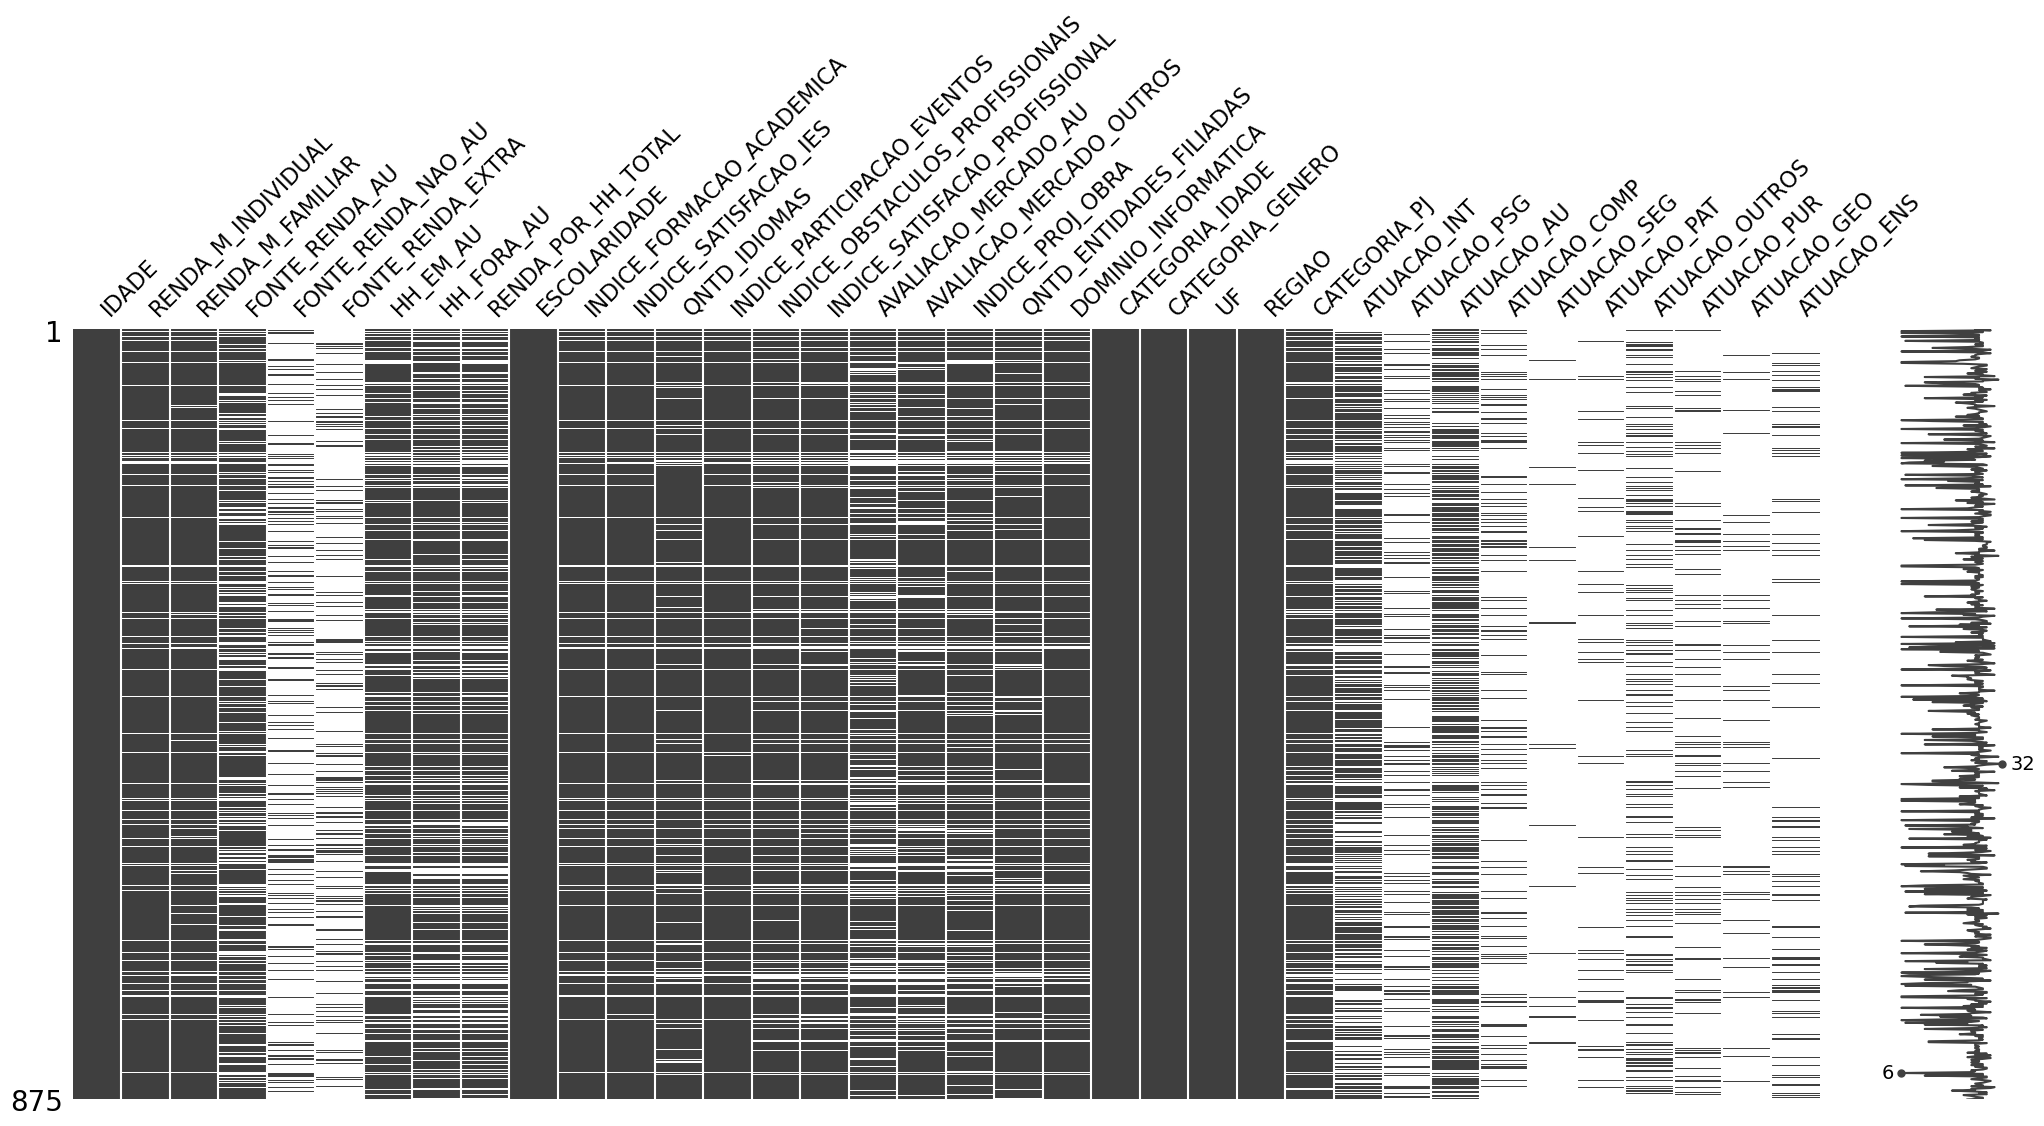

In [31]:
msno.matrix(df_1_tratamento)

In [38]:
df_1_tratamento[df_1_tratamento.CATEGORIA_GENERO.isna()].CATEGORIA_GENERO.index.array

<PandasArray>
[]
Length: 0, dtype: object

In [37]:
thresh_val = 5

<Axes: >

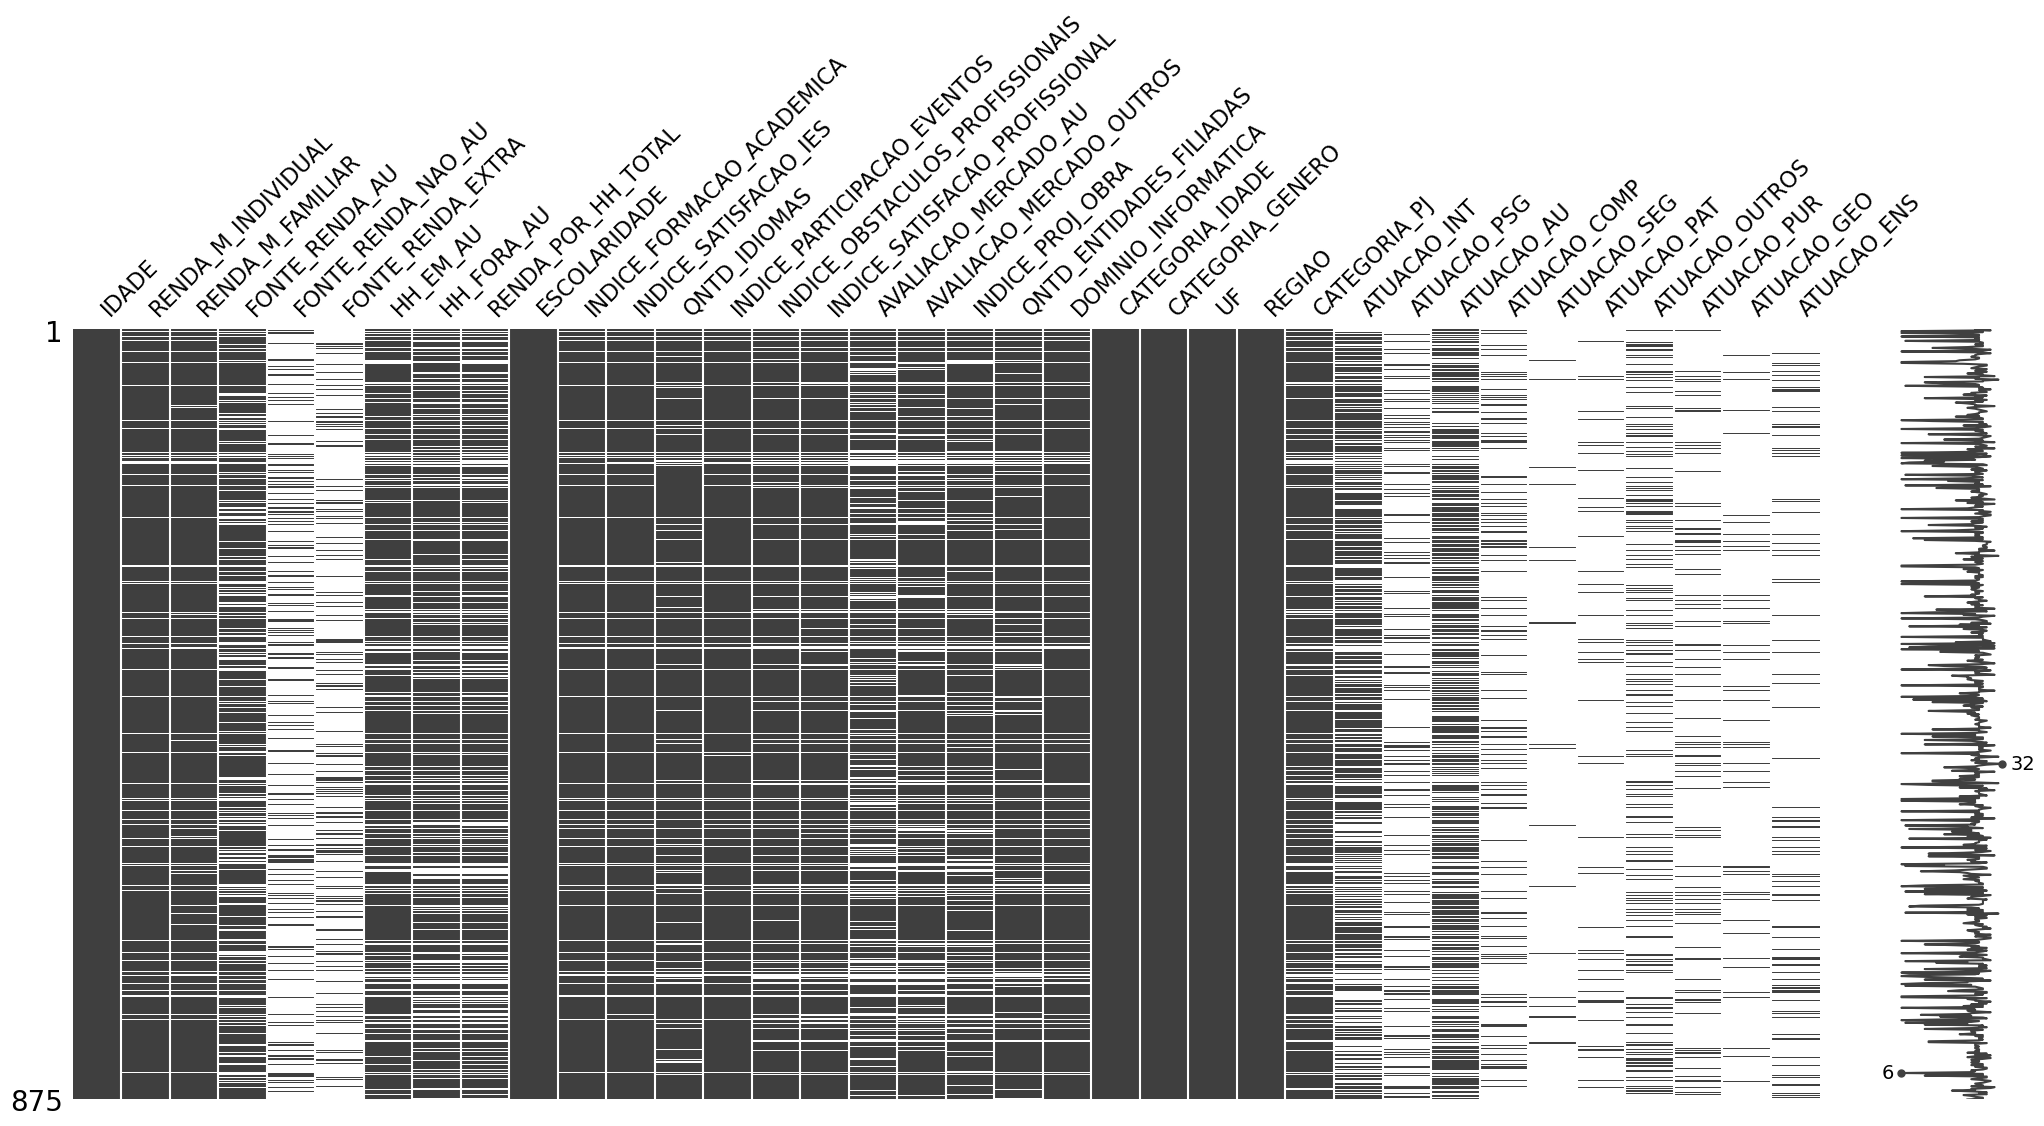

In [38]:
msno.matrix(df_1_tratamento.dropna(thresh=thresh_val,axis=0))

The sparkline at right summarizes the general shape of the data completeness and points out the rows with the maximum and minimum nullity in the dataset.

<Axes: >

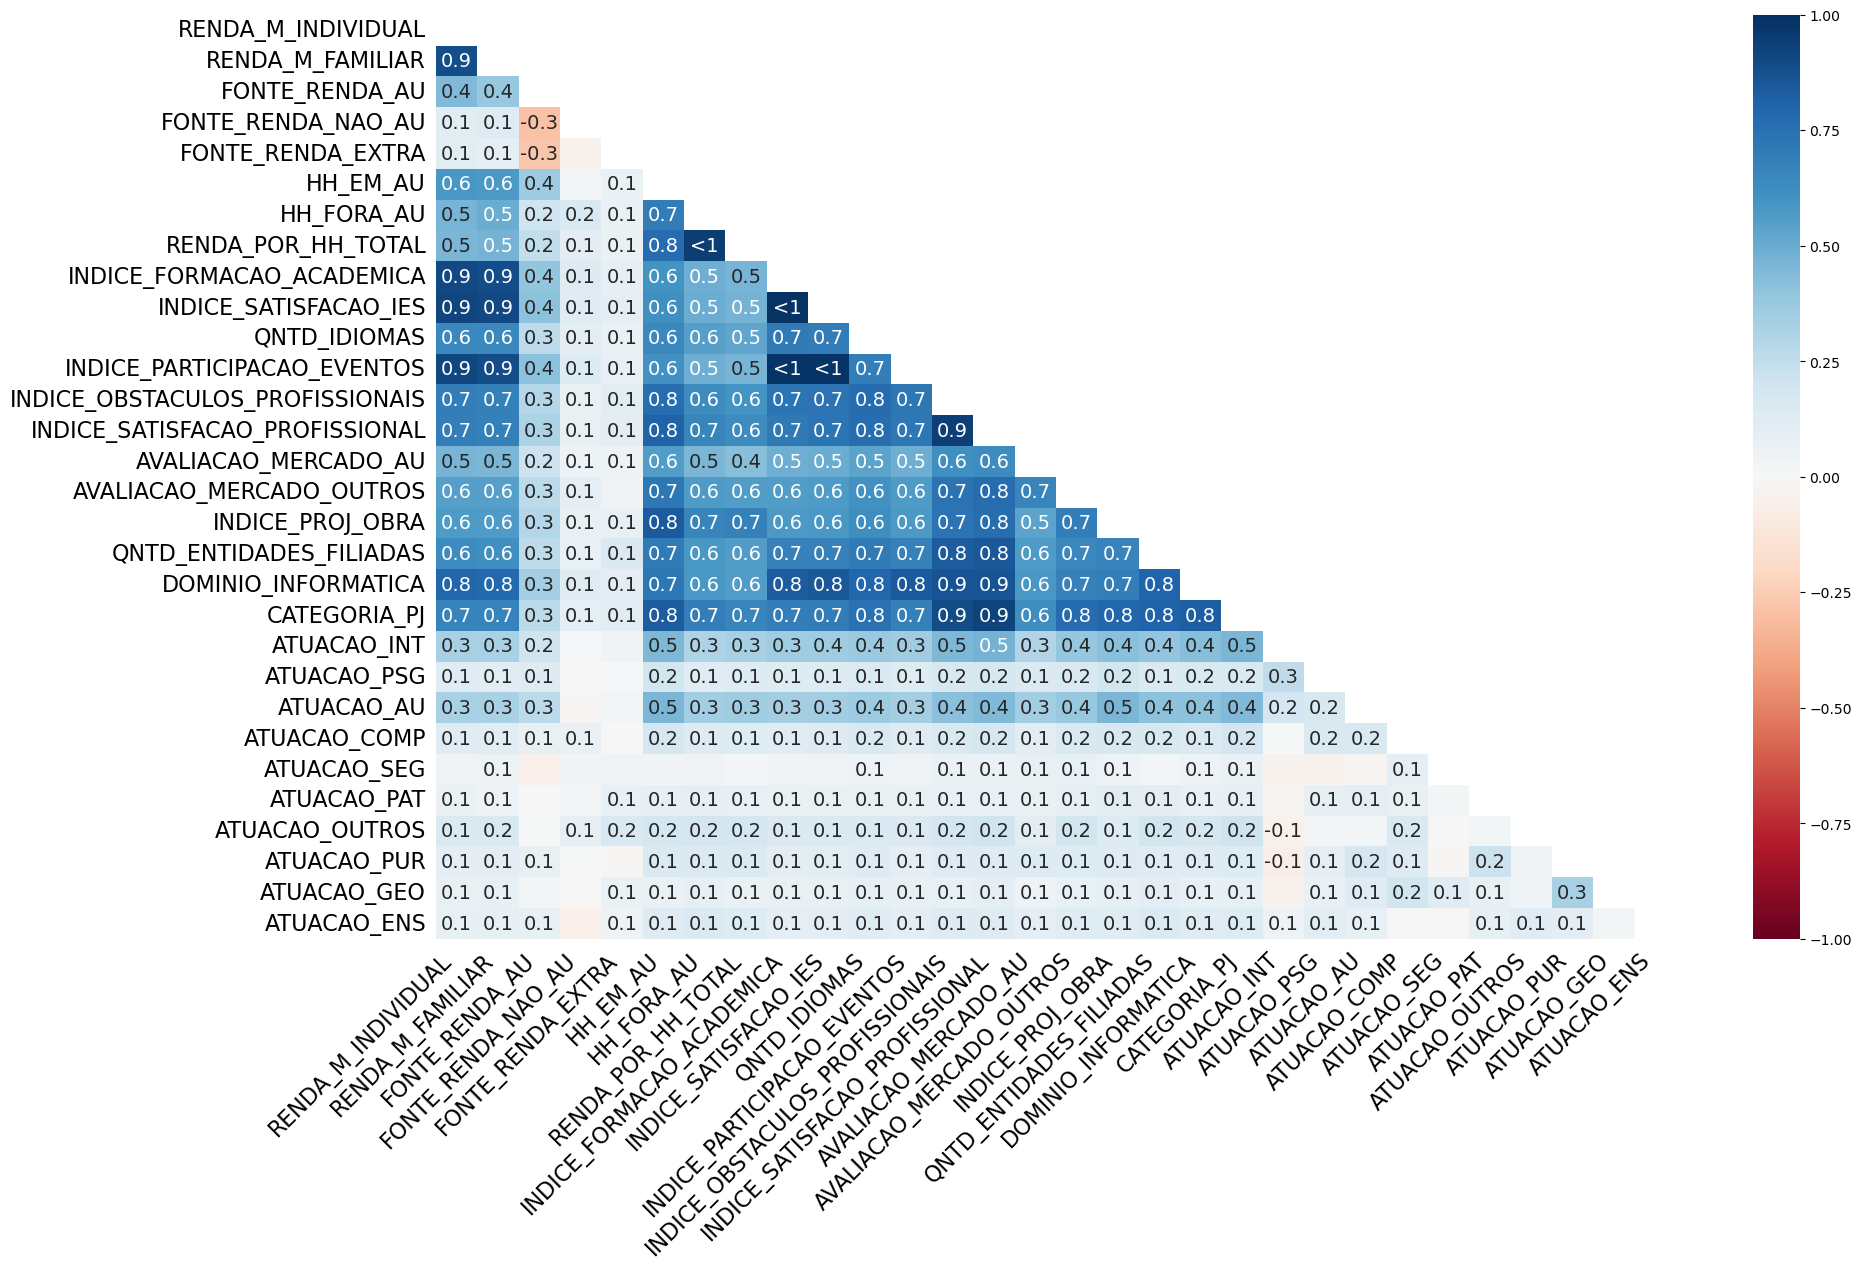

In [39]:
msno.heatmap(df_1_tratamento.dropna(thresh=thresh_val,axis=0))

Nullity correlation ranges from -1 (if one variable appears the other definitely does not) to 0 (variables appearing or not appearing have no effect on one another) to 1 (if one variable appears the other definitely also does).

Variables that are always full or always empty have no meaningful correlation, and so are silently removed from the visualization—in this case for instance the datetime and injury number columns, which are completely filled, are not included.

Entries marked <1 or >-1 have a correlation that is close to being exactingly negative or positive, but is still not quite perfectly so. This points to a small number of records in the dataset which are erroneous. For example, in this dataset the correlation between VEHICLE CODE TYPE 3 and CONTRIBUTING FACTOR VEHICLE 3 is <1, indicating that, contrary to our expectation, there are a few records which have one or the other, but not both. These cases will require special attention.msno.dendrogram(df3)

<Axes: >

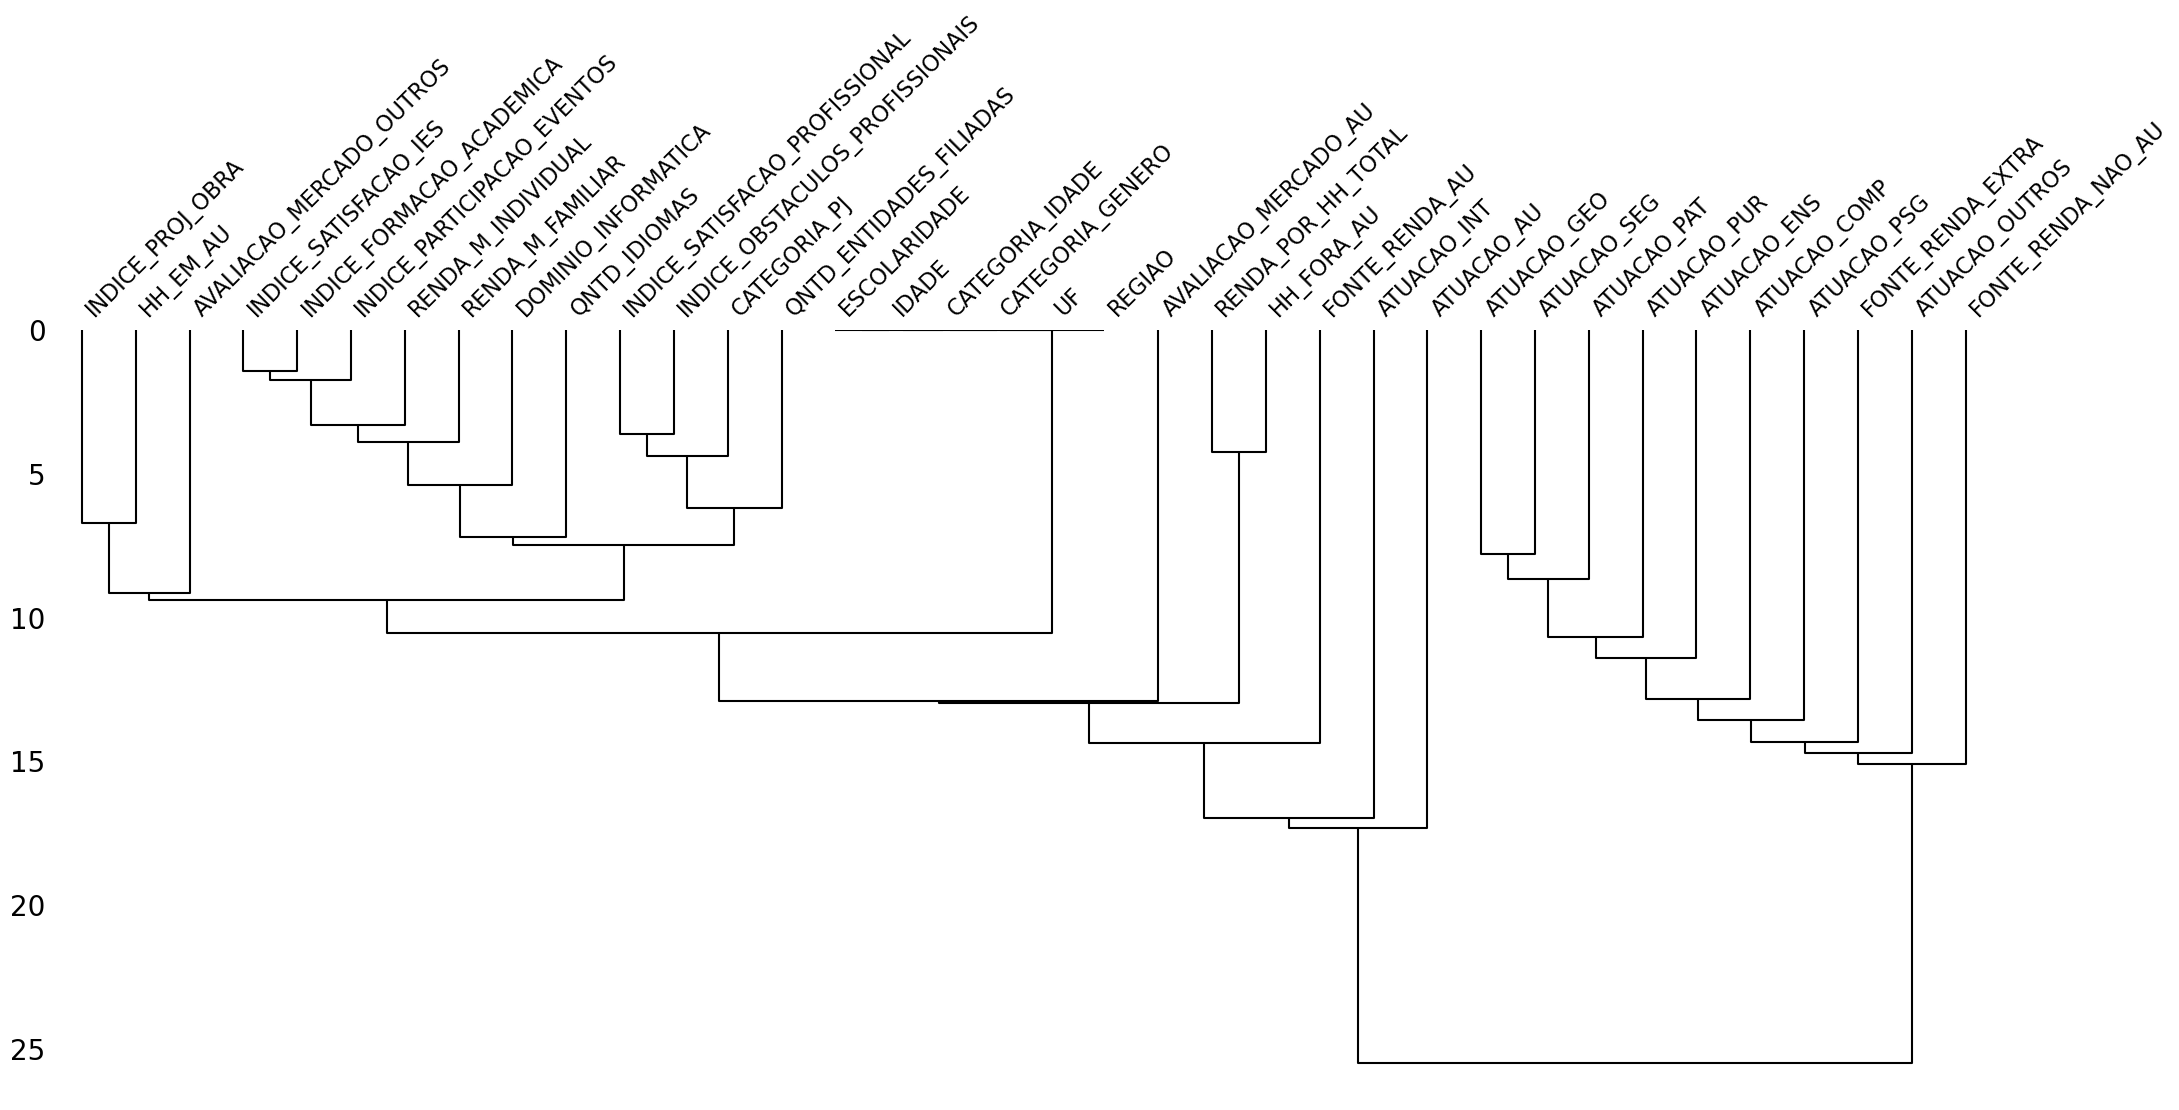

In [40]:
msno.dendrogram(df_1_tratamento.dropna(thresh=thresh_val,axis=0))

To interpret this graph, read it from a top-down perspective. Cluster leaves which linked together at a distance of zero fully predict one another's presence—one variable might always be empty when another is filled, or they might always both be filled or both empty, and so on. In this specific example the dendrogram glues together the variables which are required and therefore present in every record.

## 1.2 Tratamento dos Dados

### Substituição Parcial dos Nulos: Aplicação de Medianas e Zeros
### Remoção Parcial de Outliers
### Imputation: ?
### Dropagem de Nulos Restantes

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from string import ascii_letters
from pandas.plotting import scatter_matrix
from scipy import stats
#from matplotlib import pyplot

### 1.2.1 Primeira Dropagem Parcial de Nulos

<AxesSubplot:>

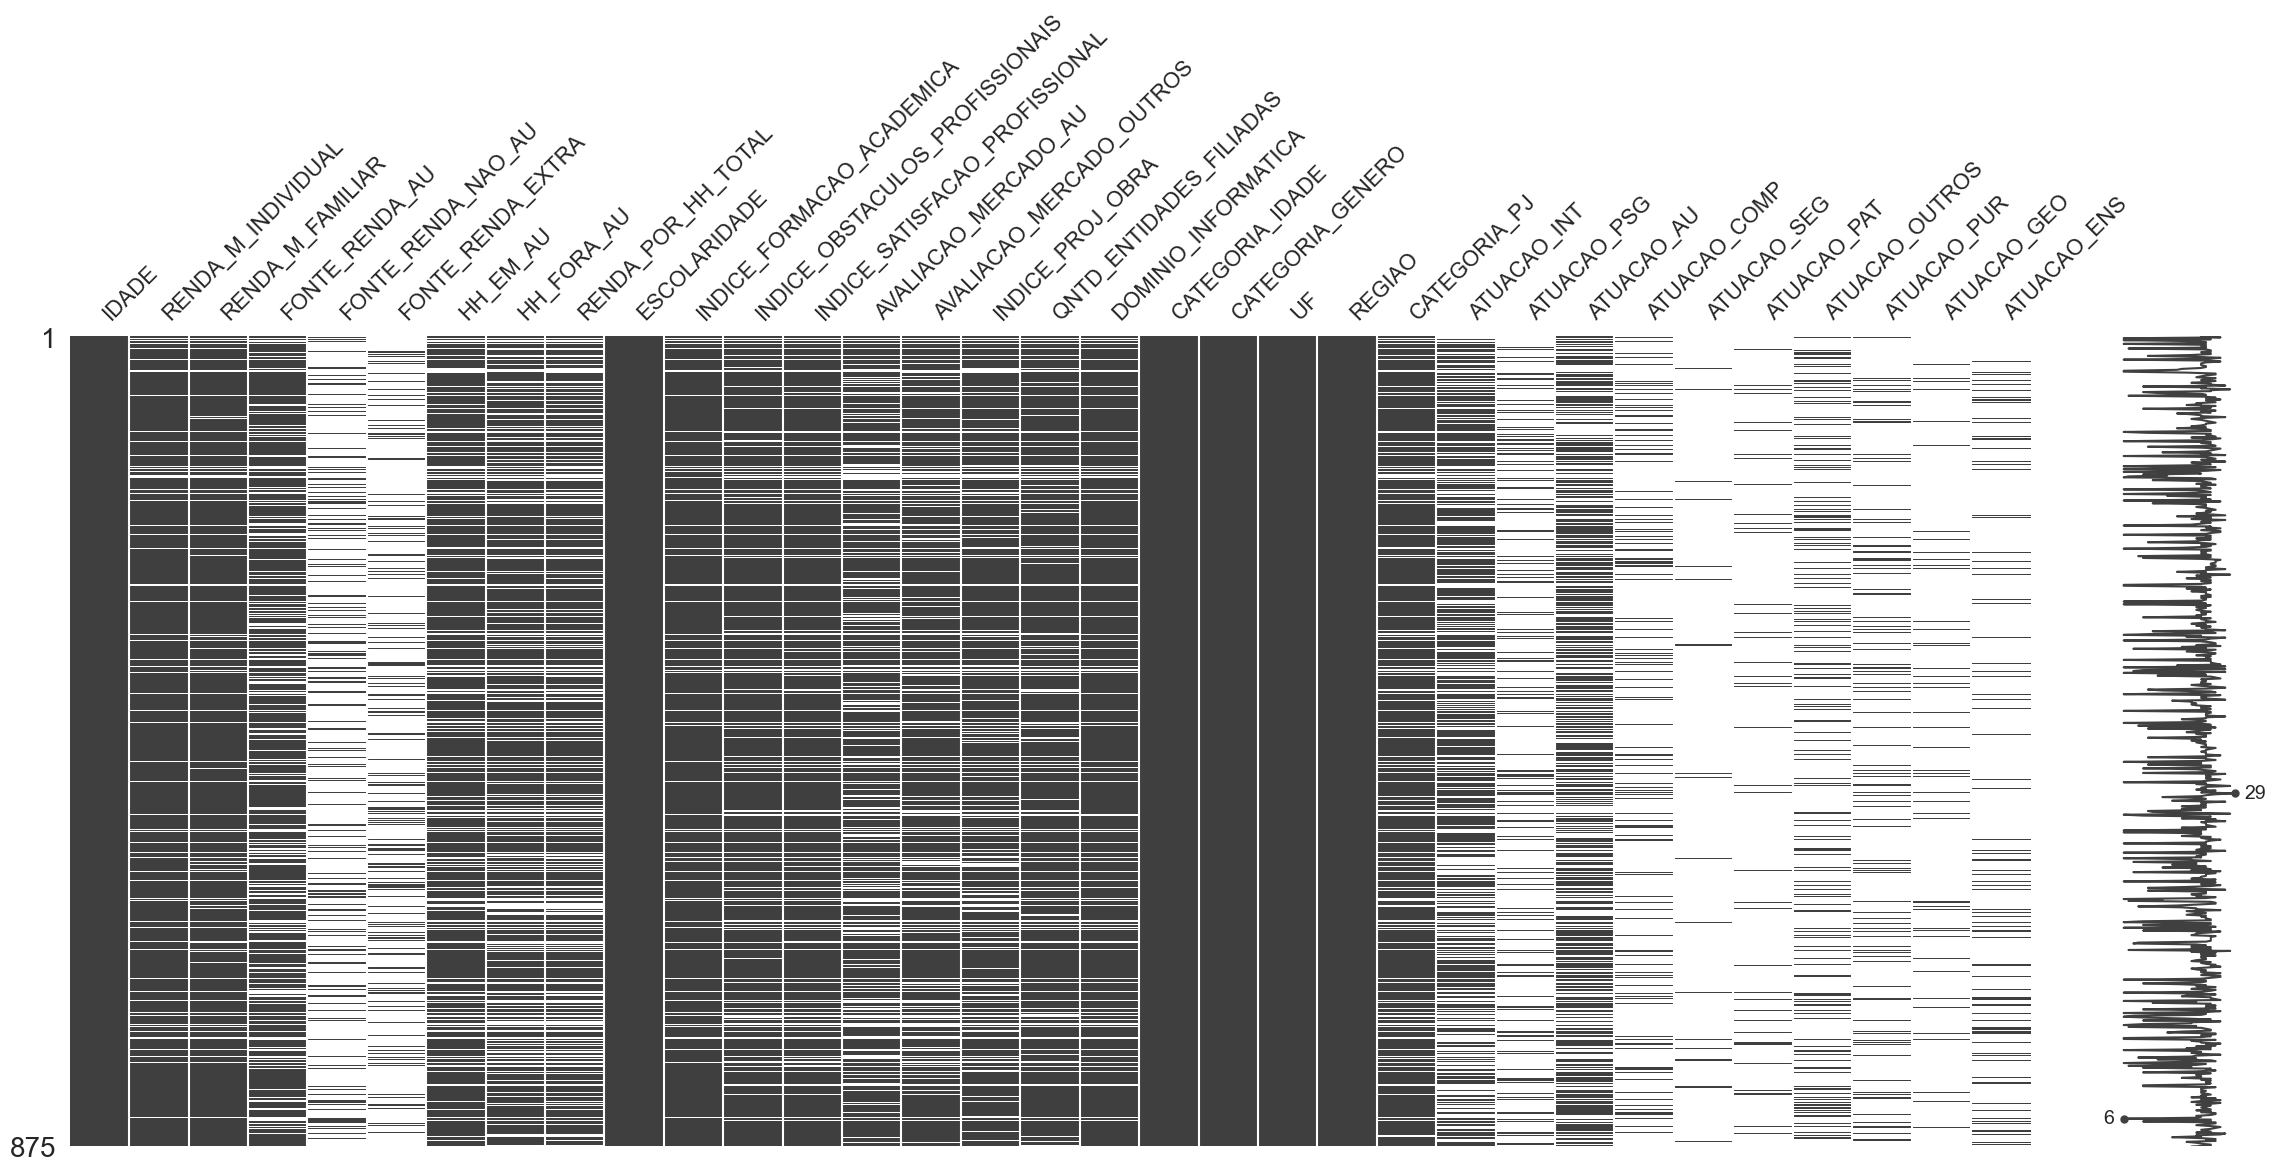

In [873]:
msno.matrix(df_1_tratamento)

<Axes: >

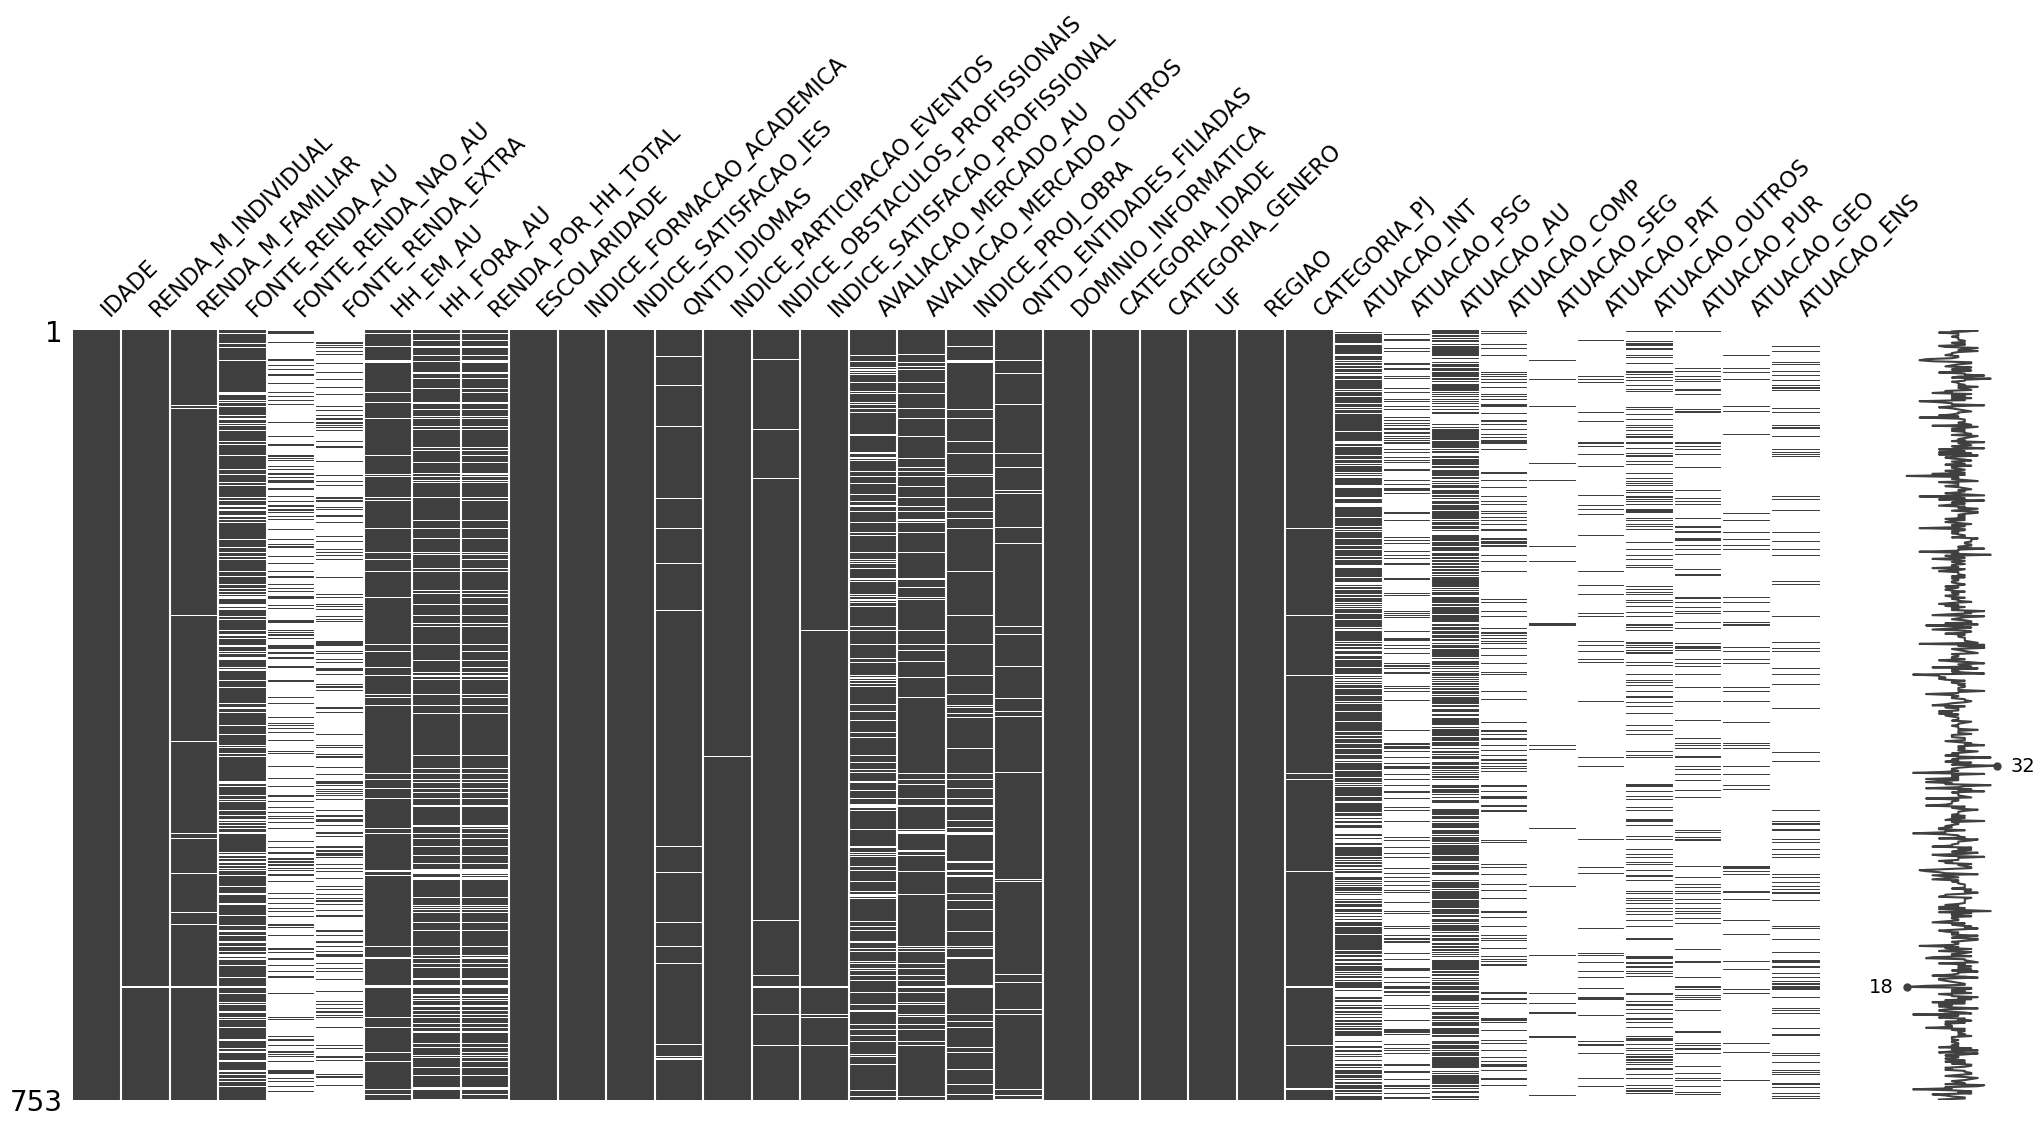

In [41]:
limiar_perc = 0.5
limiar_val = round((len(df_1_tratamento.columns.tolist())*limiar_perc))
df_1_tratamento.dropna(thresh=limiar_val,axis=0,inplace=True)
msno.matrix(df_1_tratamento)

### 1.2.1 Substituição Parcial dos Nulos

#### Procedimento:
- Preencher nulos com valores esperados, quando cabível;
- Remover entradas com outliers, para um subconjunto de features;

In [42]:
df_1_tratamento.isna().sum()

IDADE                                0
RENDA_M_INDIVIDUAL                   1
RENDA_M_FAMILIAR                    10
FONTE_RENDA_AU                     147
FONTE_RENDA_NAO_AU                 598
FONTE_RENDA_EXTRA                  604
HH_EM_AU                            45
HH_FORA_AU                         109
RENDA_POR_HH_TOTAL                 126
ESCOLARIDADE                         0
INDICE_FORMACAO_ACADEMICA            0
INDICE_SATISFACAO_IES                0
QNTD_IDIOMAS                        16
INDICE_PARTICIPACAO_EVENTOS          1
INDICE_OBSTACULOS_PROFISSIONAIS      8
INDICE_SATISFACAO_PROFISSIONAL       5
AVALIACAO_MERCADO_AU               111
AVALIACAO_MERCADO_OUTROS            63
INDICE_PROJ_OBRA                    58
QNTD_ENTIDADES_FILIADAS             25
DOMINIO_INFORMATICA                  0
CATEGORIA_IDADE                      0
CATEGORIA_GENERO                     0
UF                                   0
REGIAO                               0
CATEGORIA_PJ             

In [43]:
dict_fillna = {
    'IDADE': np.nan, 'RENDA_M_INDIVIDUAL':0, 'RENDA_M_FAMILIAR':0, 'FONTE_RENDA_AU':0, 'FONTE_RENDA_NAO_AU':0, 'FONTE_RENDA_EXTRA':0,
    'HH_EM_AU': np.nan,'HH_FORA_AU': np.nan,'RENDA_POR_HH_TOTAL': np.nan, 'ESCOLARIDADE': 0,
    'INDICE_FORMACAO_ACADEMICA': np.nan, 'INDICE_OBSTACULOS_PROFISSIONAIS': np.nan, 'INDICE_SATISFACAO_PROFISSIONAL': np.nan, 
    'AVALIACAO_MERCADO_AU': np.nan, 'AVALIACAO_MERCADO_OUTROS': np.nan, 'INDICE_PROJ_OBRA': np.nan,
    'QNTD_ENTIDADES_FILIADAS': 0,'DOMINIO_INFORMATICA': 0,'CATEGORIA_GENERO': 'INDEF',
    'UF': np.nan, 'REGIAO': np.nan, 'CATEGORIA_PJ': np.nan,
    'ATUACAO_INT': 0, 'ATUACAO_PSG': 0, 'ATUACAO_AU': 0, 'ATUACAO_COMP': 0, 'ATUACAO_SEG': 0, 'ATUACAO_PAT': 0, 'ATUACAO_OUTROS': 0, 'ATUACAO_PUR': 0,
    'ATUACAO_GEO': 0, 'ATUACAO_ENS': 0,#'CATEGORIA_IDADE': 0
              }

In [44]:
df_1_tratamento.fillna(value=dict_fillna,inplace=True)

C:\Users\Bruno\AppData\Local\Temp\ipykernel_25176\2542981369.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_1_tratamento.fillna(value=dict_fillna,inplace=True)


<Axes: >

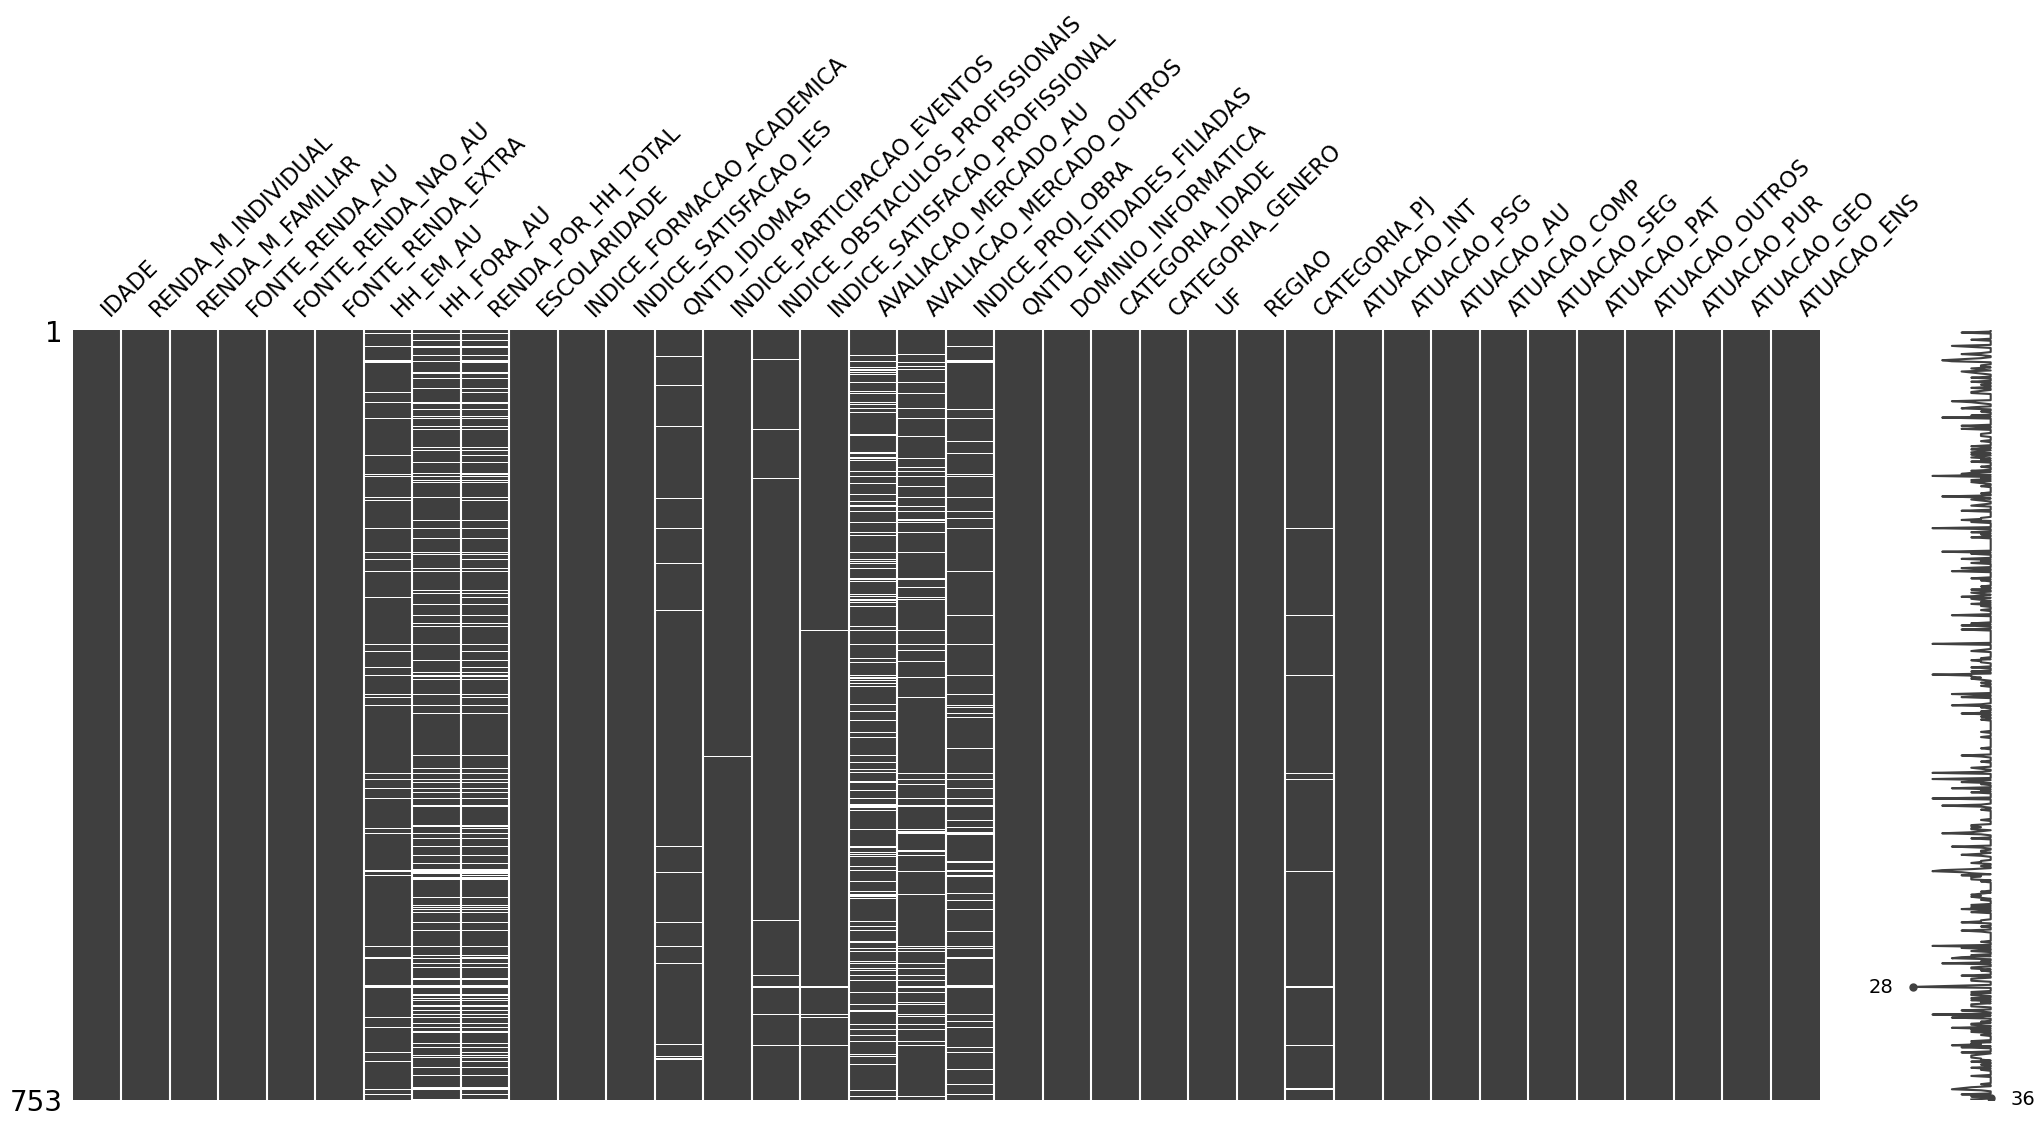

In [45]:
msno.matrix(df_1_tratamento)

### 1.2.2 Remoção Parcial de Outliers

In [46]:
df_1_tratamento.select_dtypes(include = ['float']).info()

<class 'pandas.core.frame.DataFrame'>
Index: 753 entries, 32 to 45354
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   IDADE                            753 non-null    float64
 1   RENDA_M_INDIVIDUAL               753 non-null    float64
 2   RENDA_M_FAMILIAR                 753 non-null    float64
 3   FONTE_RENDA_AU                   753 non-null    float64
 4   FONTE_RENDA_NAO_AU               753 non-null    float64
 5   FONTE_RENDA_EXTRA                753 non-null    float64
 6   HH_EM_AU                         708 non-null    float64
 7   HH_FORA_AU                       644 non-null    float64
 8   RENDA_POR_HH_TOTAL               627 non-null    float64
 9   ESCOLARIDADE                     753 non-null    float64
 10  INDICE_FORMACAO_ACADEMICA        753 non-null    float64
 11  INDICE_SATISFACAO_IES            753 non-null    float64
 12  QNTD_IDIOMAS            

#### Subset e Normalização

<Axes: >

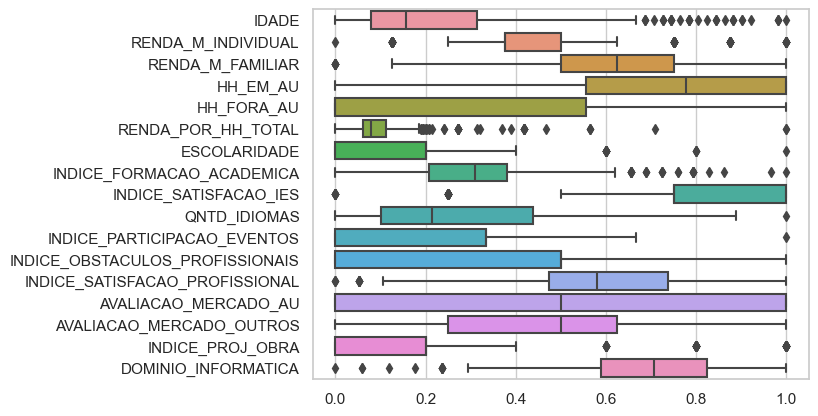

In [47]:
sns.set_theme(style="whitegrid")
#normalized_df=(df-df.mean())/df.std()
df_outliers = df_1_tratamento.select_dtypes(include = ['float'])
df_outliers['CATEGORIA_IDADE'] = df_1_tratamento['CATEGORIA_IDADE']
df_outliers.drop(
    labels=['ATUACAO_INT','ATUACAO_PSG','ATUACAO_AU','ATUACAO_COMP','ATUACAO_SEG','ATUACAO_PAT','ATUACAO_OUTROS','ATUACAO_PUR','ATUACAO_GEO','ATUACAO_ENS','CATEGORIA_IDADE','QNTD_ENTIDADES_FILIADAS','FONTE_RENDA_NAO_AU','FONTE_RENDA_AU','FONTE_RENDA_EXTRA'],
    axis=1,
    inplace=True
)
df_outliers = (df_outliers - df_outliers.min()) / (df_outliers.max() - df_outliers.min())
sns.boxplot(
    data=df_outliers,
    orient='h'
)

#### Nulos do subset

<Axes: >

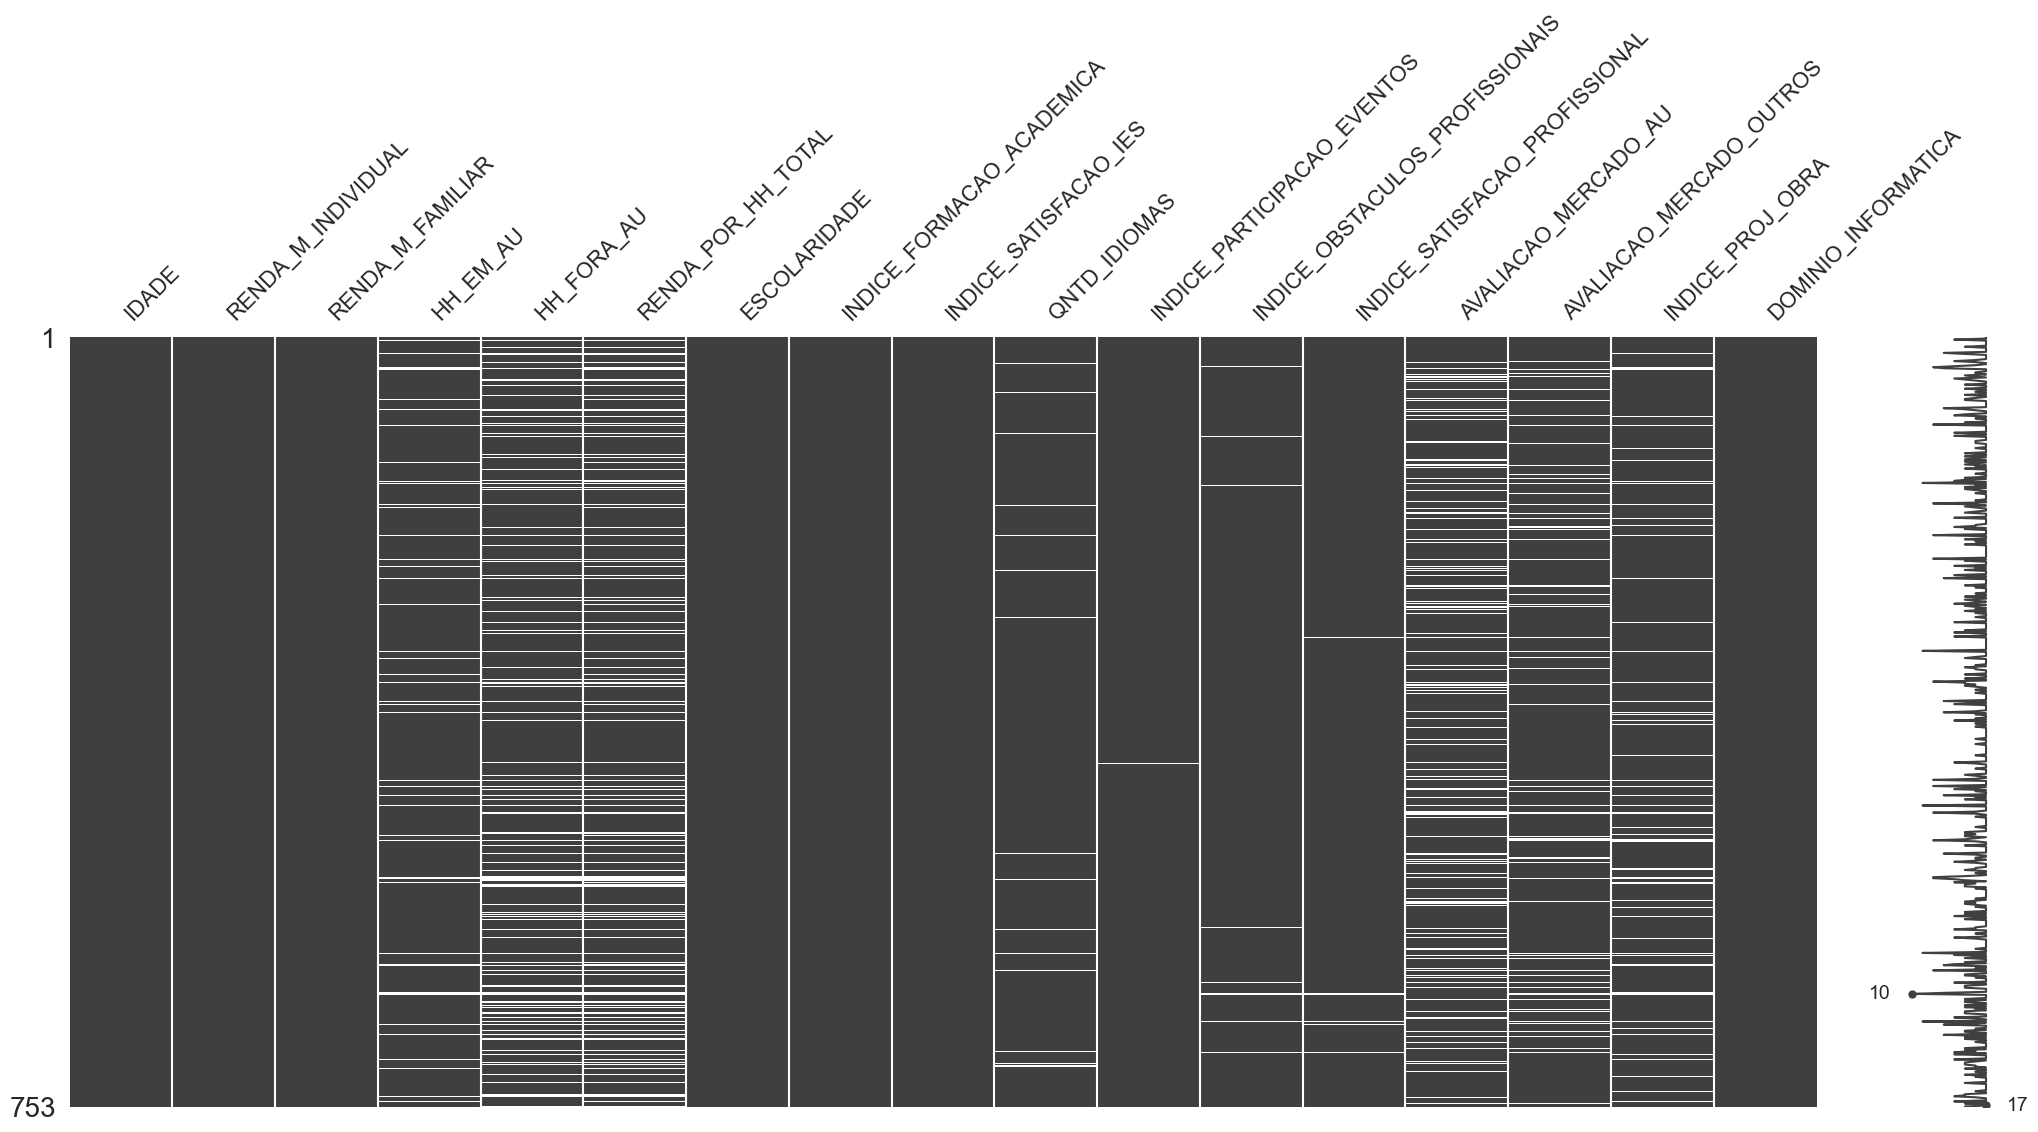

In [48]:
msno.matrix(df_outliers)

#### Marcação e Droppagem dos Outliers

In [49]:
df_outliers.fillna(value=0,inplace=True)
np.abs(stats.zscore(df_outliers) < 3)

IDADE  RENDA_M_INDIVIDUAL  RENDA_M_FAMILIAR  HH_EM_AU  HH_FORA_AU  \
32      True                True              True      True        True   
156     True               False              True      True        True   
193     True                True              True      True        True   
340     True                True              True      True        True   
414     True                True              True      True        True   
...      ...                 ...               ...       ...         ...   
45273   True                True              True      True        True   
45278   True                True              True      True        True   
45346   True                True              True      True        True   
45353   True                True              True      True        True   
45354   True                True              True      True        True   

       RENDA_POR_HH_TOTAL  ESCOLARIDADE  INDICE_FORMACAO_ACADEMICA  \
32                   True          True                       True   
156                  True          True                       True   
193                  True          True                       True   
340                  True          True                       True   
414                  True          True                       True   
...                   ...           ...                        ...   
45273                True          True                       True   
45278                True          True                       True   
45346                True          True                       True   
45353                True          True                       True   
45354                True          True                       True   

       INDICE_SATISFACAO_IES  QNTD_IDIOMAS  INDICE_PARTICIPACAO_EVENTOS  \
32                      True          True                         True   
156                     True          True                         True   
193                     True          True                         True   
340                     True          True                         True   
414                     True          True                         True   
...                      ...           ...                          ...   
45273                   True          True                         True   
45278                   True          True                         True   
45346                   True          True                         True   
45353                   True          True                         True   
45354                   True          True                         True   

       INDICE_OBSTACULOS_PROFISSIONAIS  INDICE_SATISFACAO_PROFISSIONAL  \
32                                True                            True   
156                               True                            True   
193                               True                            True   
340                               True                            True   
414                               True                            True   
...                                ...                             ...   
45273                             True                            True   
45278                             True                            True   
45346                             True                            True   
45353                             True                            True   
45354                             True                            True   

       AVALIACAO_MERCADO_AU  AVALIACAO_MERCADO_OUTROS  INDICE_PROJ_OBRA  \
32                     True                      True              True   
156                    True                      True              True   
193                    True                      True             False   
340                    True                      True              True   
414                    True                      True              True   
...          

In [51]:
df_1_tratamento = df_1_tratamento[(np.abs(stats.zscore(df_outliers)) < 3).all(axis=1)]

### Remoção Parcial de Outliers

<Axes: >

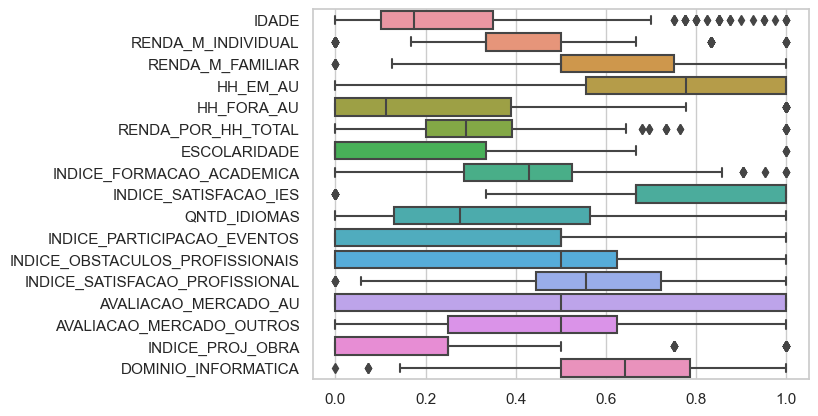

In [52]:
sns.set_theme(style="whitegrid")
#normalized_df=(df-df.mean())/df.std()
df_outliers = df_1_tratamento.select_dtypes(include = ['float'])
df_outliers.drop(
    labels=['ATUACAO_INT','ATUACAO_PSG','ATUACAO_AU','ATUACAO_COMP','ATUACAO_SEG','ATUACAO_PAT','ATUACAO_OUTROS','ATUACAO_PUR','ATUACAO_GEO','ATUACAO_ENS','QNTD_ENTIDADES_FILIADAS','FONTE_RENDA_NAO_AU','FONTE_RENDA_AU','FONTE_RENDA_EXTRA'],
    axis=1,
    inplace=True
)
df_outliers = (df_outliers - df_outliers.min()) / (df_outliers.max() - df_outliers.min())
sns.boxplot(
    data=df_outliers,
    orient='h'
)

In [53]:
df_1_tratamento.describe().transpose()

count       mean       std     min   25%  \
IDADE                            653.0  32.993874  8.784396  23.000  27.0   
RENDA_M_INDIVIDUAL               653.0   3.346095  1.233345   1.000   3.0   
RENDA_M_FAMILIAR                 653.0   4.782542  1.662064   0.000   4.0   
FONTE_RENDA_AU                   653.0   0.931087  0.556472   0.000   1.0   
FONTE_RENDA_NAO_AU               653.0   0.208270  0.445969   0.000   0.0   
FONTE_RENDA_EXTRA                653.0   0.192956  0.410162   0.000   0.0   
HH_EM_AU                         617.0   3.653160  1.490378   0.500   3.0   
HH_FORA_AU                       556.0   1.616007  1.506304   0.500   0.5   
RENDA_POR_HH_TOTAL               543.0   0.700599  0.309597   0.125   0.5   
ESCOLARIDADE                     653.0   1.607963  0.704541   1.000   1.0   
INDICE_FORMACAO_ACADEMICA        653.0   9.396631  4.263246   1.000   7.0   
INDICE_SATISFACAO_IES            653.0   4.217458  0.735932   2.000   4.0   
QNTD_IDIOMAS                     640.0   2.407500  1.780526   0.100   1.0   
INDICE_PARTICIPACAO_EVENTOS      652.0   1.751534  0.501531   1.000   1.0   
INDICE_OBSTACULOS_PROFISSIONAIS  648.0   1.851852  0.791939   1.000   1.0   
INDICE_SATISFACAO_PROFISSIONAL   653.0  12.217458  3.429196   2.000  10.0   
AVALIACAO_MERCADO_AU             555.0   2.003604  0.856060   1.000   1.0   
AVALIACAO_MERCADO_OUTROS         598.0   4.533445  1.932197   1.000   3.0   
INDICE_PROJ_OBRA                 608.0   1.861842  0.880313   1.000   1.0   
QNTD_ENTIDADES_FILIADAS          653.0   0.206738  0.416475   0.000   0.0   
DOMINIO_INFORMATICA              653.0  14.719755  3.008606   6.000  13.0   
ATUACAO_INT                      653.0   0.719755  0.449463   0.000   0.0   
ATUACAO_PSG                      653.0   0.208270  0.406382   0.000   0.0   
ATUACAO_AU                       653.0   0.667688  0.471403   0.000   0.0   
ATUACAO_COMP                     653.0   0.179173  0.383791   0.000   0.0   
ATUACAO_SEG                      653.0   0.022971  0.149926   0.000   0.0   
ATUACAO_PAT                      653.0   0.062787  0.242766   0.000   0.0   
ATUACAO_OUTROS                   653.0   0.222052  0.415945   0.000   0.0   
ATUACAO_PUR                      653.0   0.131700  0.338423   0.000   0.0   
ATUACAO_GEO                      653.0   0.065850  0.248210   0.000   0.0   
ATUACAO_ENS                      653.0   0.113323  0.317230   0.000   0.0   

                                       50%        75%   max  
IDADE                            30.000000  37.000000  63.0  
RENDA_M_INDIVIDUAL                3.000000   4.000000   7.0  
RENDA_M_FAMILIAR                  4.000000   6.000000   8.0  
FONTE_RENDA_AU                    1.000000   1.000000   4.0  
FONTE_RENDA_NAO_AU                0.000000   0.000000   3.0  
FONTE_RENDA_EXTRA                 0.000000   0.000000   2.0  
HH_EM_AU                          4.000000   5.000000   5.0  
HH_FORA_AU                        1.000000   2.250000   5.0  
RENDA_POR_HH_TOTAL                0.666667   0.857143   2.0  
ESCOLARIDADE                      1.000000   2.000000   4.0  
INDICE_FORMACAO_ACADEMICA        10.000000  12.000000  22.0  
INDICE_SATISFACAO_IES             4.000000   5.000000   5.0  
QNTD_IDIOMAS                      2.000000   4.000000   7.0  
INDICE_PARTICIPACAO_EVENTOS       2.000000   2.000000   3.0  
INDICE_OBSTACULOS_PROFISSIONAIS   2.000000   2.250000   3.0  
INDICE_SATISFACAO_PROFISSIONAL   12.000000  15.000000  20.0  
AVALIACAO_MERCADO_AU              2.000000   3.000000   3.0  
AVALIACAO_MERCADO_OUTROS          5.000000   6.000000   9.0  
INDICE_PROJ_OBRA                  2.000000   2.000000   5.0  
QNTD_ENTIDADES_FILIADAS           0.000000   0.000000   2.0  
DOMINIO_INFORMATICA              15.000000  17.000000  20.0  
ATUACAO_INT                       1.000000   1.000000   1.0  
ATUACAO_PSG                       0.000000   0.000000   1.0  
ATUACAO_AU                        1.000000   1.000000   1.0  
ATUACAO_COMP      

### Imputation: Mediana

<Axes: >

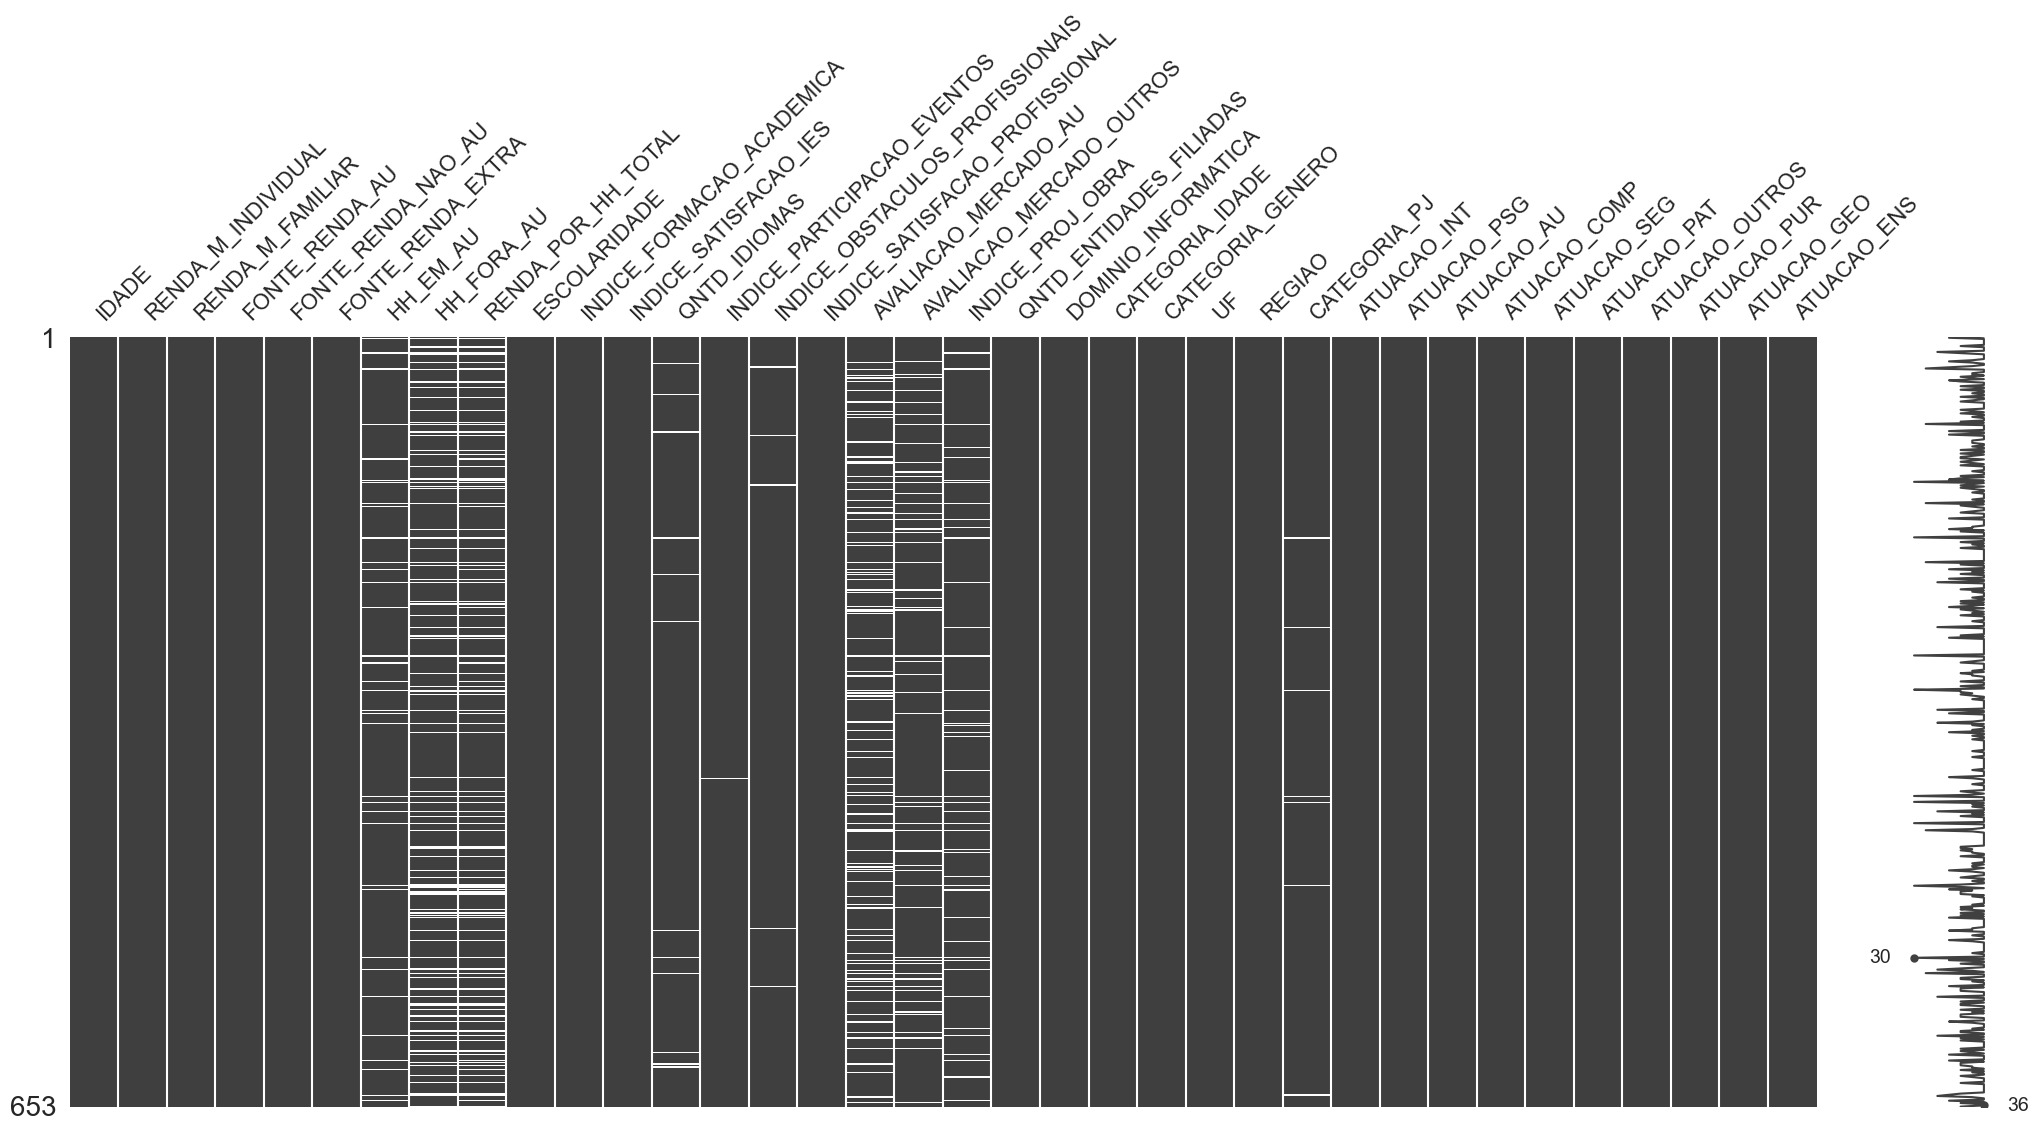

In [54]:
msno.matrix(df_1_tratamento)

In [50]:
df_2_eda = df_1_tratamento.copy()

### Histogramas das Variáveis Básicas

<Axes: xlabel='IDADE', ylabel='Probability'>

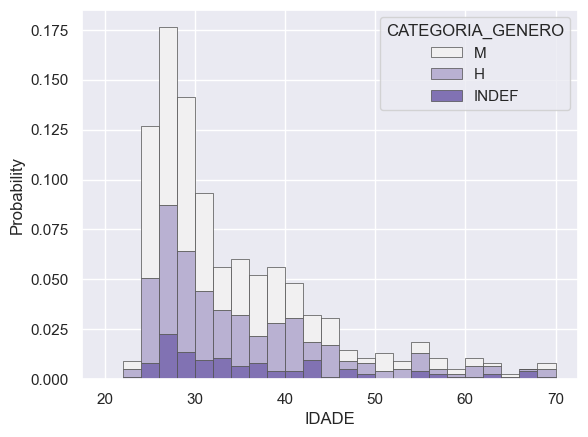

In [51]:
sns.set_theme(style="darkgrid")
sns.histplot(
    data=df_2_eda,
    x="IDADE", hue="CATEGORIA_GENERO",
    #x="IDADE", hue="CATEGORIA_PJ",
    #x="IDADE", hue="REGIAO",
    multiple="stack",
    palette="light:m",
    edgecolor=".3",
    linewidth=.5,
    log_scale=False,
    stat='probability',
    bins=20,
    binrange=(20,70), alpha=1, binwidth=2
)

<Axes: xlabel='RENDA_POR_HH_TOTAL', ylabel='Probability'>

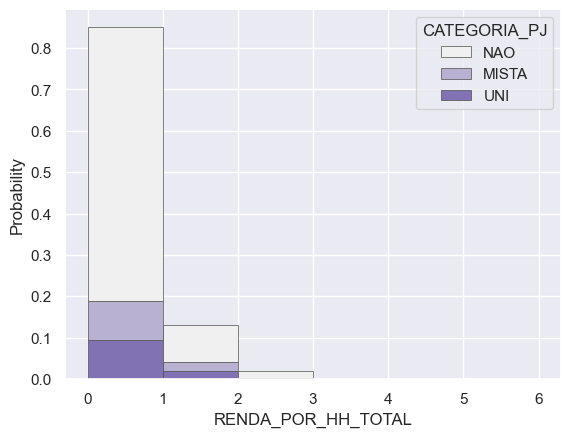

In [59]:
sns.set_theme(style="darkgrid")
sns.histplot(
    data=df_2_eda,
    #x="RENDA_POR_HH_TOTAL", hue="CATEGORIA_GENERO",
    x="RENDA_POR_HH_TOTAL", hue="CATEGORIA_PJ",
    #x="RENDA_POR_HH_TOTAL", hue="REGIAO",
    multiple="stack",
    palette="light:m",
    edgecolor=".3",
    linewidth=.5,
    log_scale=False,
    stat='probability',
    bins=6,
    binrange=(0,6), alpha=1, binwidth=1
)

<Axes: xlabel='HH_EM_AU', ylabel='Probability'>

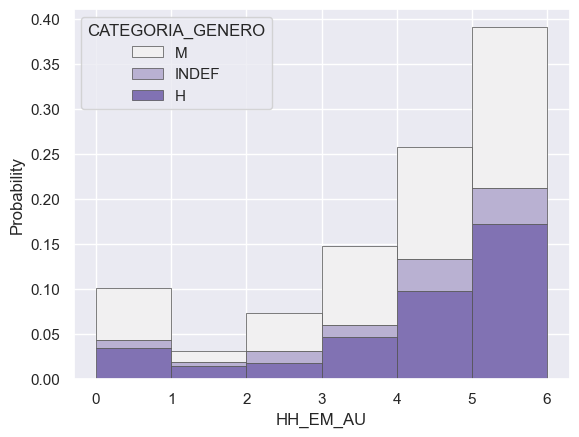

In [60]:
sns.set_theme(style="darkgrid")
sns.histplot(
    data=df_2_eda,
    x="HH_EM_AU", hue="CATEGORIA_GENERO",
    #x="HH_EM_AU", hue="CATEGORIA_PJ",
    #x="HH_EM_AU", hue="REGIAO",
    multiple="stack",
    palette="light:m",
    edgecolor=".3",
    linewidth=.5,
    log_scale=False,
    stat='probability',
    bins=10,
    binrange=(0,6), alpha=1, binwidth=1
)

<Axes: xlabel='RENDA_M_INDIVIDUAL', ylabel='Probability'>

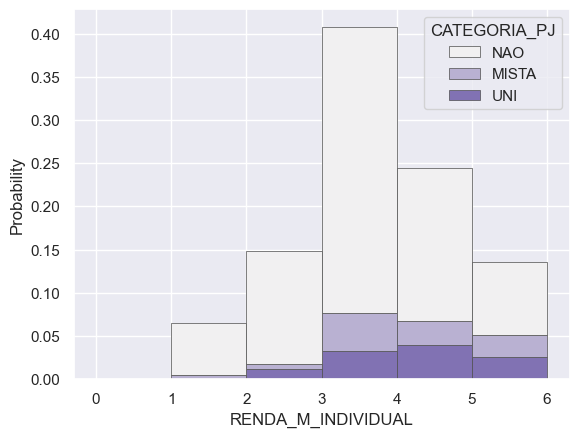

In [61]:
sns.set_theme(style="darkgrid")
sns.histplot(
    data=df_2_eda,
    #x="RENDA_M_INDIVIDUAL", hue="CATEGORIA_GENERO",
    x="RENDA_M_INDIVIDUAL", hue="CATEGORIA_PJ",
    #x="RENDA_M_INDIVIDUAL", hue="REGIAO",
    multiple="stack",
    palette="light:m",
    edgecolor=".3",
    linewidth=.5,
    log_scale=False,
    stat='probability',
    bins=10,
    binrange=(0,6), alpha=1, binwidth=1
)

<AxesSubplot:xlabel='INDICE_SATISFACAO_PROFISSIONAL', ylabel='Probability'>

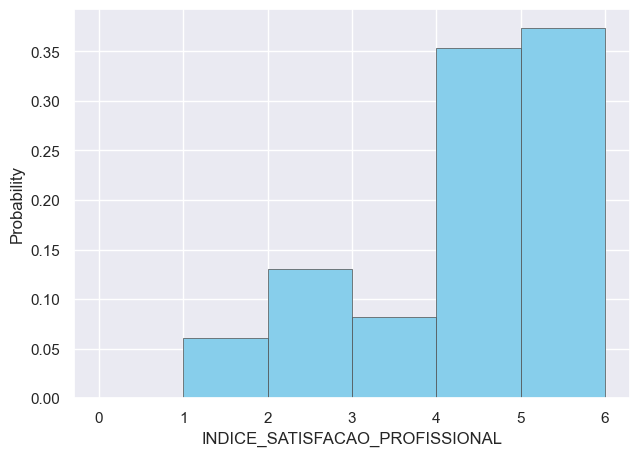

In [891]:
sns.set_theme(style="darkgrid")
sns.histplot(
    data=df_2_eda,
    x="INDICE_SATISFACAO_PROFISSIONAL", color="skyblue",
    #x="INDICE_SATISFACAO_PROFISSIONAL", hue="CATEGORIA_GENERO",
    #x="INDICE_SATISFACAO_PROFISSIONAL", hue="CATEGORIA_PJ",
    #x="INDICE_SATISFACAO_PROFISSIONAL", hue="REGIAO",
    multiple="stack",
    palette="light:m",
    edgecolor=".3",
    linewidth=.5,
    log_scale=False,
    stat='probability',
    bins=10,
    binrange=(0,6), alpha=1, binwidth=1
)

<Axes: xlabel='INDICE_FORMACAO_ACADEMICA', ylabel='Probability'>

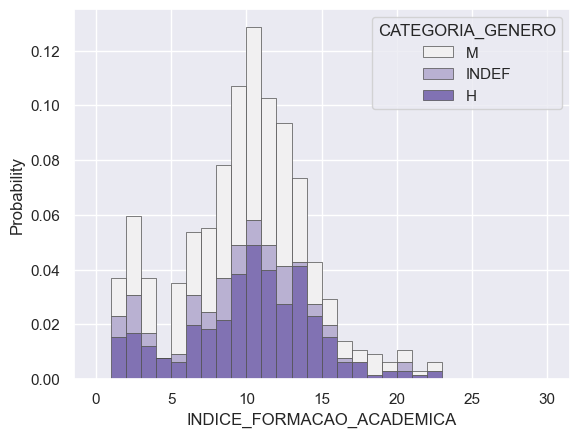

In [62]:
sns.set_theme(style="darkgrid")
sns.histplot(
    data=df_2_eda,
    #x="INDICE_FORMACAO_ACADEMICA", color="skyblue",
    x="INDICE_FORMACAO_ACADEMICA", hue="CATEGORIA_GENERO",
    #x="INDICE_FORMACAO_ACADEMICA", hue="CATEGORIA_PJ",
    #x="INDICE_FORMACAO_ACADEMICA", hue="REGIAO",
    multiple="stack",
    palette="light:m",
    edgecolor=".3",
    linewidth=.5,
    log_scale=False,
    stat='probability',
    bins=10,
    binrange=(0,30), alpha=1, binwidth=1
)

In [903]:
print(df_2_eda.groupby('CATEGORIA_IDADE')['INDICE_FORMACAO_ACADEMICA'].agg(np.median).sort_values())

CATEGORIA_IDADE
(55, 65]     9.0
(15, 25]    10.0
(25, 35]    10.0
(35, 45]    10.0
(45, 55]    10.0
(65, 75]     NaN
Name: INDICE_FORMACAO_ACADEMICA, dtype: float64


<Axes: xlabel='CATEGORIA_IDADE', ylabel='INDICE_FORMACAO_ACADEMICA'>

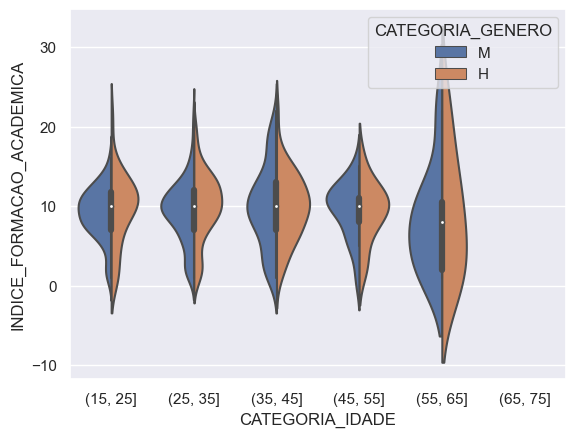

In [63]:
sns.violinplot(
    data=df_2_eda[['INDICE_FORMACAO_ACADEMICA','CATEGORIA_IDADE','CATEGORIA_GENERO']].query('CATEGORIA_GENERO == "H" or CATEGORIA_GENERO == "M"'),
    y="INDICE_FORMACAO_ACADEMICA", x="CATEGORIA_IDADE", hue='CATEGORIA_GENERO', split=True
)

In [905]:
print(df_2_eda.groupby('CATEGORIA_IDADE')['RENDA_M_INDIVIDUAL'].agg(np.median).sort_values())

CATEGORIA_IDADE
(15, 25]    3.0
(25, 35]    3.0
(35, 45]    4.0
(45, 55]    4.0
(55, 65]    4.0
(65, 75]    NaN
Name: RENDA_M_INDIVIDUAL, dtype: float64


<AxesSubplot:xlabel='CATEGORIA_IDADE', ylabel='RENDA_M_INDIVIDUAL'>

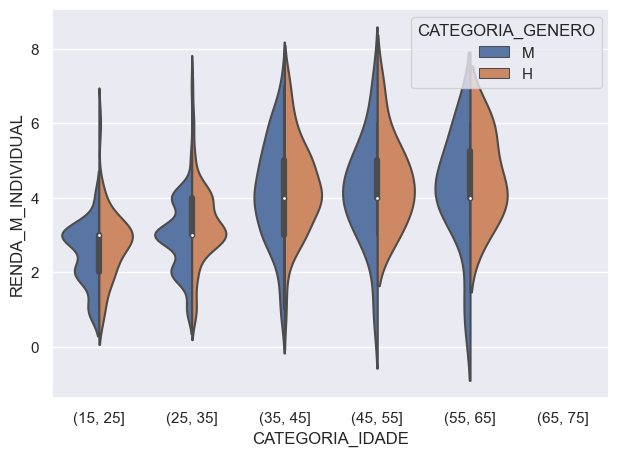

In [906]:
sns.violinplot(
    #data=df_selecao[['RENDA_M_INDIVIDUAL','CATEGORIA_IDADE','CATEGORIA_GENERO']].query('CATEGORIA_GENERO' == "H" or 'CATEGORIA_GENERO == "M"')['RENDA_M_INDIVIDUAL'],
    data=df_2_eda[['RENDA_M_INDIVIDUAL','CATEGORIA_IDADE','CATEGORIA_GENERO']].query('CATEGORIA_GENERO == "H" or CATEGORIA_GENERO == "M"'),
    y="RENDA_M_INDIVIDUAL", x="CATEGORIA_IDADE", hue="CATEGORIA_GENERO", split=True
)

In [907]:
print(df_2_eda.groupby('CATEGORIA_PJ')['IDADE'].agg(np.median).sort_values())

CATEGORIA_PJ
NAO      29.0
MISTA    31.0
UNI      34.5
Name: IDADE, dtype: float64


In [908]:
print(df_2_eda.groupby('CATEGORIA_PJ')['HH_EM_AU'].agg(np.median).sort_values())

CATEGORIA_PJ
MISTA    4.0
NAO      4.0
UNI      5.0
Name: HH_EM_AU, dtype: float64


## Correlação de Pearson e Gráficos de Dispersão

In [65]:
df_sns = df_2_eda.drop(labels=['IDADE','ATUACAO_ENS','ATUACAO_PUR','ATUACAO_OUTROS','ATUACAO_GEO','ATUACAO_GEO','ATUACAO_GEO','ATUACAO_COMP','ATUACAO_SEG','ATUACAO_PAT','ATUACAO_GEO','ATUACAO_PSG','ATUACAO_INT','ATUACAO_AU','REGIAO','UF','CATEGORIA_IDADE'],axis=1)
#df_sns = df_selecao

C:\Users\Bruno\AppData\Local\Temp\ipykernel_25584\2531501879.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_sns.corr(method='pearson')


<Axes: >

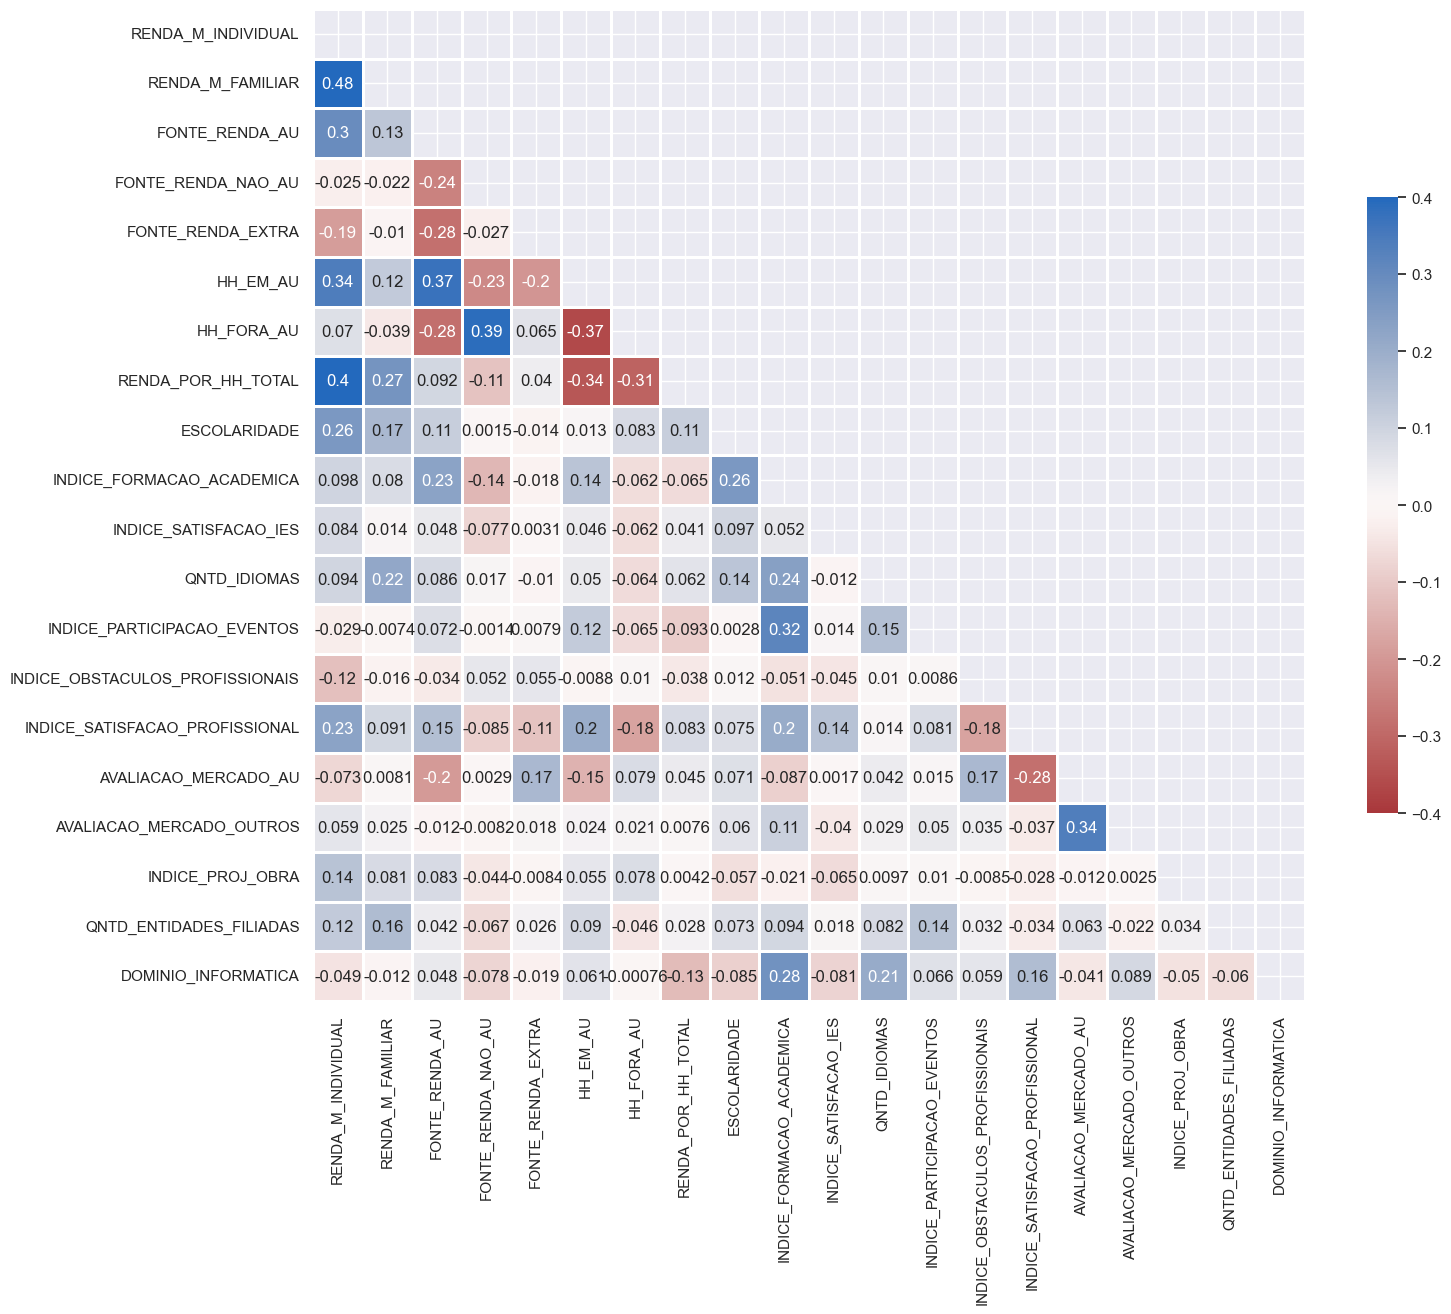

In [66]:
sns.set_theme(style="darkgrid")
corr = df_sns.corr(method='pearson')
#corr = df_sns.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(16, 16))

cmap = sns.color_palette("vlag_r", as_cmap=True)
#cmap = sns.color_palette("viridis", as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.4, vmin=-.4, center=0,
            annot=True, square=True, linewidths=.9, cbar_kws={"shrink": .5})

<Axes: >

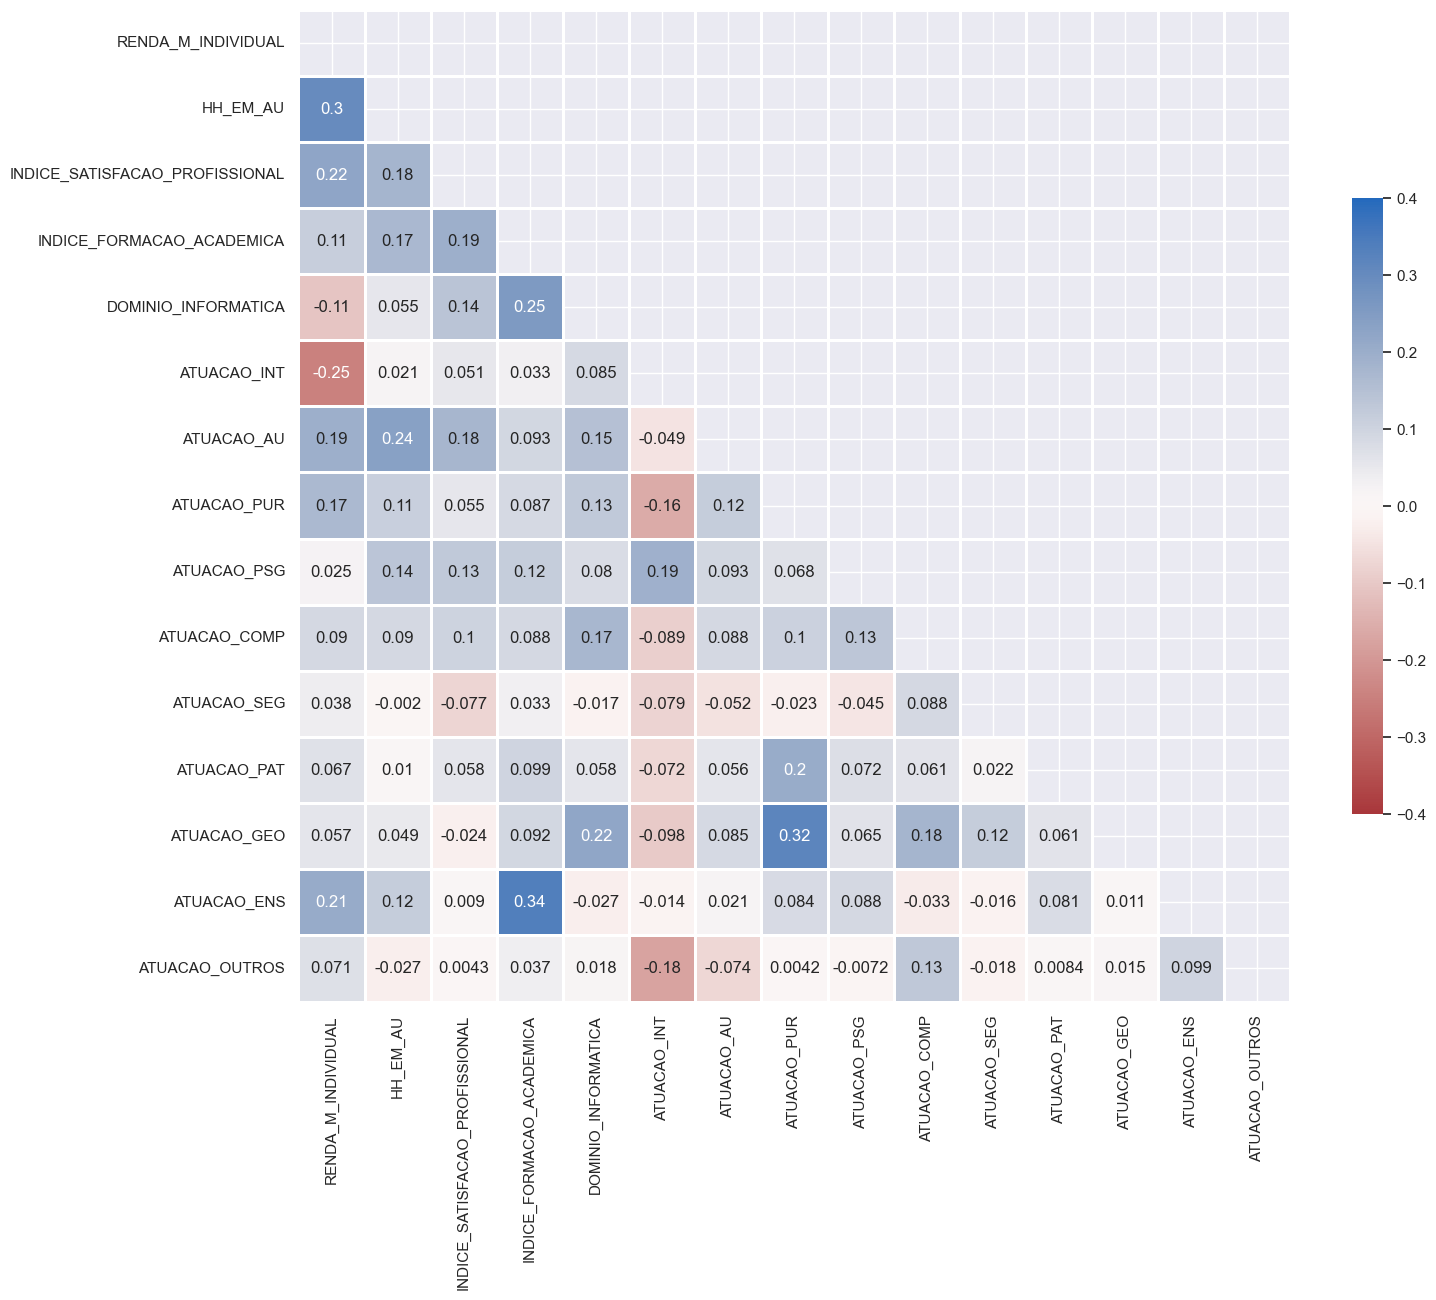

In [52]:
df_sns = df_2_eda[['RENDA_M_INDIVIDUAL','HH_EM_AU','INDICE_SATISFACAO_PROFISSIONAL','INDICE_FORMACAO_ACADEMICA','DOMINIO_INFORMATICA','ATUACAO_INT','ATUACAO_AU','ATUACAO_PUR','ATUACAO_PSG','ATUACAO_COMP','ATUACAO_SEG','ATUACAO_PAT','ATUACAO_GEO','ATUACAO_ENS','ATUACAO_OUTROS']]
sns.set_theme(style="darkgrid")
corr = df_sns.corr(method='spearman')
#corr = df_sns.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(16, 16))

cmap = sns.color_palette("vlag_r", as_cmap=True)
#cmap = sns.color_palette("viridis", as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.4, vmin=-.4, center=0,
            annot=True, square=True, linewidths=.9, cbar_kws={"shrink": .5})

## Renda Média Individual, Renda por HH, Índice de Satisfação Profissional por Região, PJ e Idade.

### Explorando a Renda Média Individual

<AxesSubplot:xlabel='REGIAO', ylabel='RENDA_M_INDIVIDUAL'>

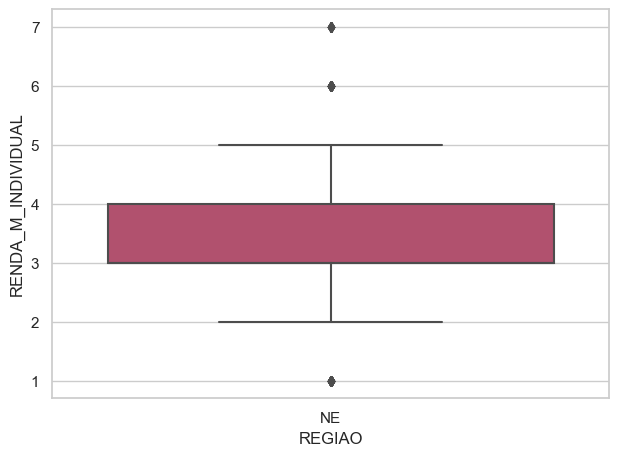

In [912]:
sns.set_theme(style="whitegrid")
sns.boxplot(x=df_2_eda["REGIAO"], y=df_2_eda["RENDA_M_INDIVIDUAL"], palette='flare')

<AxesSubplot:xlabel='CATEGORIA_PJ', ylabel='RENDA_M_INDIVIDUAL'>

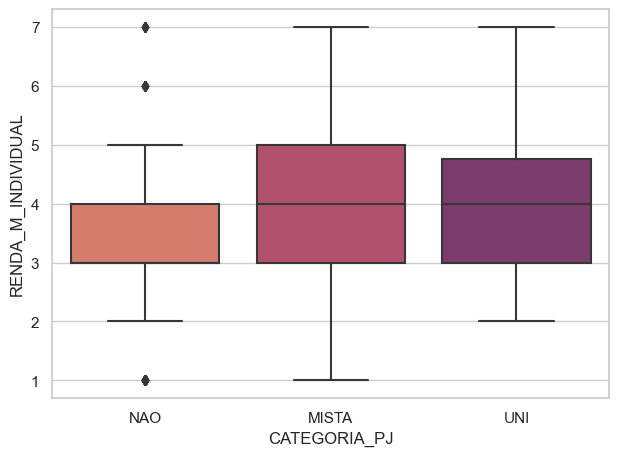

In [913]:
sns.set_theme(style="whitegrid")
sns.boxplot(x=df_2_eda["CATEGORIA_PJ"], y=df_2_eda["RENDA_M_INDIVIDUAL"], palette='flare')

<AxesSubplot:xlabel='RENDA_M_INDIVIDUAL', ylabel='Probability'>

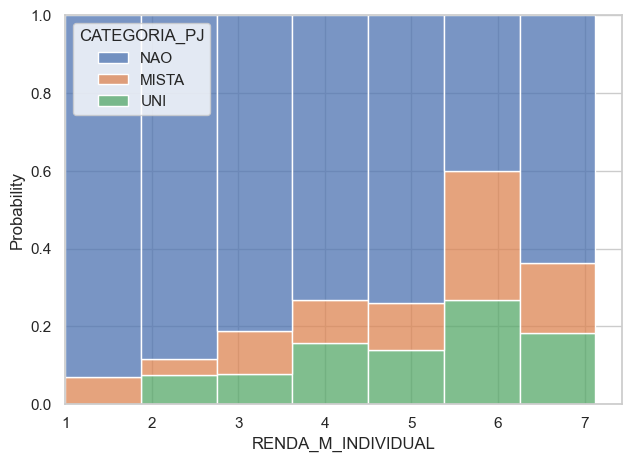

In [914]:
sns.histplot(data=df_2_eda, x="RENDA_M_INDIVIDUAL", hue="CATEGORIA_PJ", stat='probability', bins=8, common_bins=True, binrange=(1,8), common_norm=True, multiple='fill',)

<AxesSubplot:xlabel='CATEGORIA_IDADE', ylabel='RENDA_M_INDIVIDUAL'>

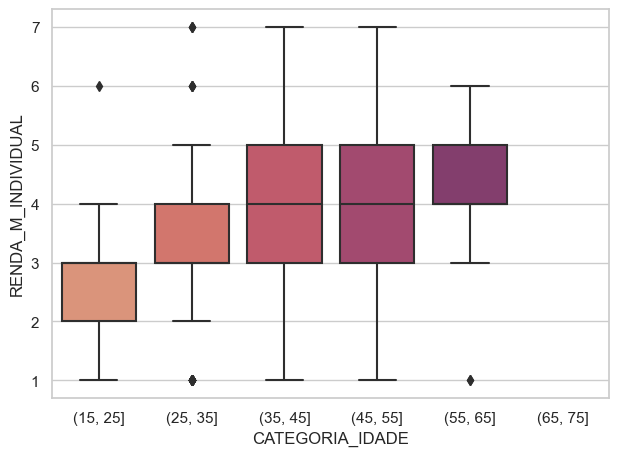

In [915]:
sns.set_theme(style="whitegrid")
sns.boxplot(x=df_2_eda["CATEGORIA_IDADE"], y=df_2_eda["RENDA_M_INDIVIDUAL"], palette='flare')

<AxesSubplot:xlabel='IDADE', ylabel='RENDA_M_INDIVIDUAL'>

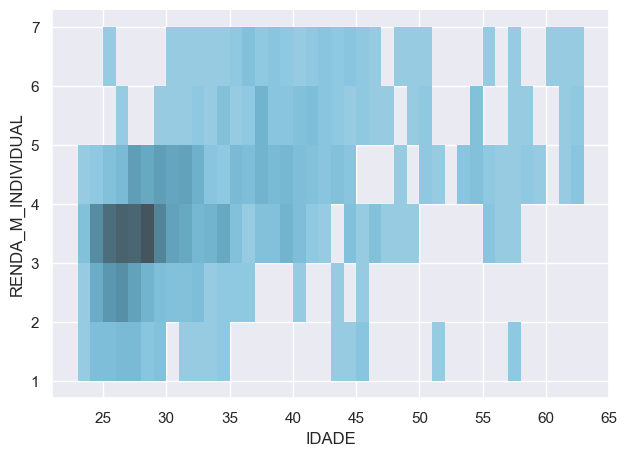

In [916]:
sns.set_theme(style="darkgrid")
sns.histplot(data=df_2_eda, x="IDADE", y="RENDA_M_INDIVIDUAL", color="skyblue", stat='density', bins=20, alpha=1, binwidth=1, discrete=False, common_norm=False, multiple='stack')

<AxesSubplot:xlabel='Probability', ylabel='RENDA_M_INDIVIDUAL'>

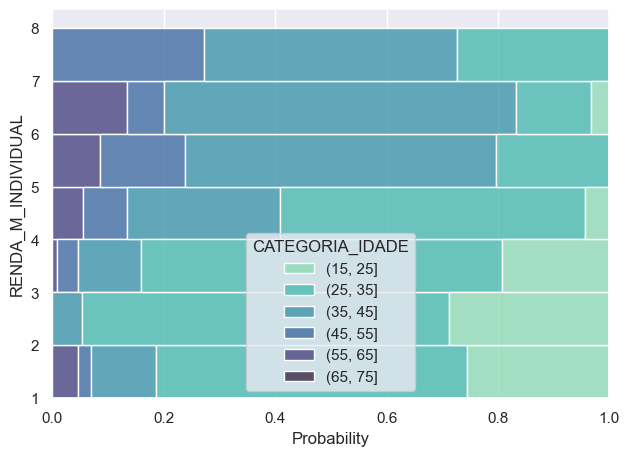

In [917]:
sns.histplot(data=df_2_eda, y="RENDA_M_INDIVIDUAL", hue="CATEGORIA_IDADE", stat='probability', palette='mako_r', common_bins=True, binrange=(1,9), binwidth=1, multiple='fill',legend=True)

### Explorando a Renda por HH Total

<AxesSubplot:xlabel='REGIAO', ylabel='RENDA_POR_HH_TOTAL'>

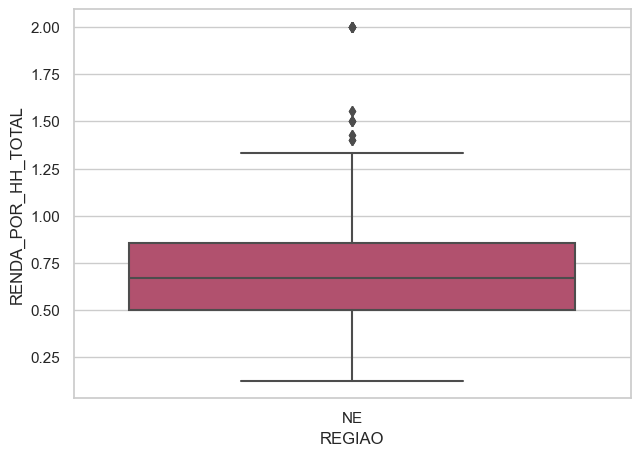

In [918]:
sns.set_theme(style="whitegrid")
sns.boxplot(x=df_2_eda["REGIAO"], y=df_2_eda["RENDA_POR_HH_TOTAL"], palette='flare')

<AxesSubplot:xlabel='CATEGORIA_PJ', ylabel='RENDA_POR_HH_TOTAL'>

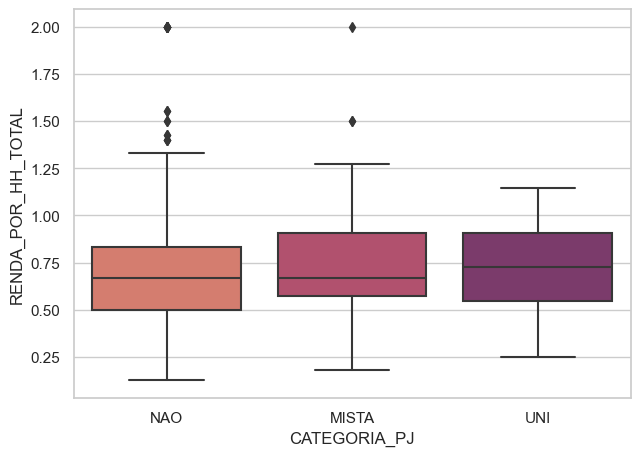

In [919]:
sns.set_theme(style="whitegrid")
sns.boxplot(x=df_2_eda["CATEGORIA_PJ"], y=df_2_eda["RENDA_POR_HH_TOTAL"], palette='flare')

<AxesSubplot:xlabel='RENDA_POR_HH_TOTAL', ylabel='Probability'>

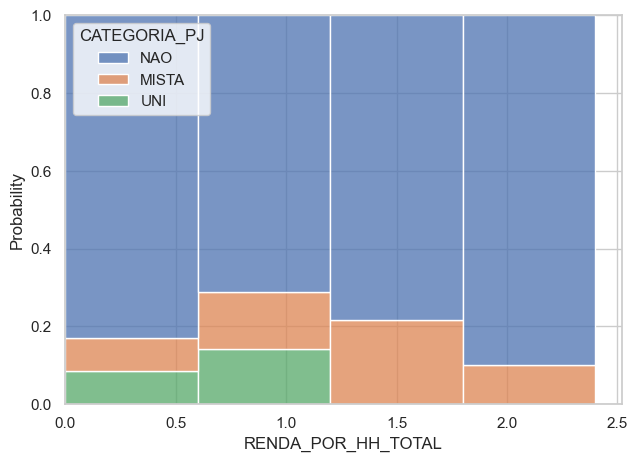

In [920]:
sns.set_theme(style="whitegrid")
sns.histplot(data=df_2_eda, x="RENDA_POR_HH_TOTAL", hue="CATEGORIA_PJ", stat='probability', bins=10, common_bins=True, binrange=(0,6), common_norm=True, multiple='fill',)

<AxesSubplot:xlabel='CATEGORIA_IDADE', ylabel='RENDA_POR_HH_TOTAL'>

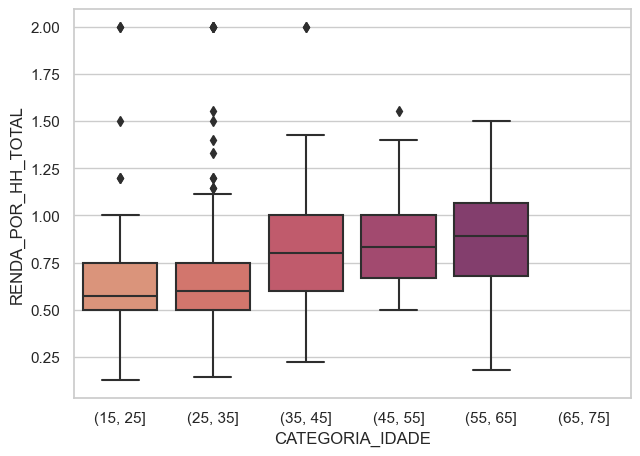

In [921]:
sns.set_theme(style="whitegrid")
sns.boxplot(x=df_2_eda["CATEGORIA_IDADE"], y=df_2_eda["RENDA_POR_HH_TOTAL"], palette='flare')

<AxesSubplot:xlabel='IDADE', ylabel='RENDA_POR_HH_TOTAL'>

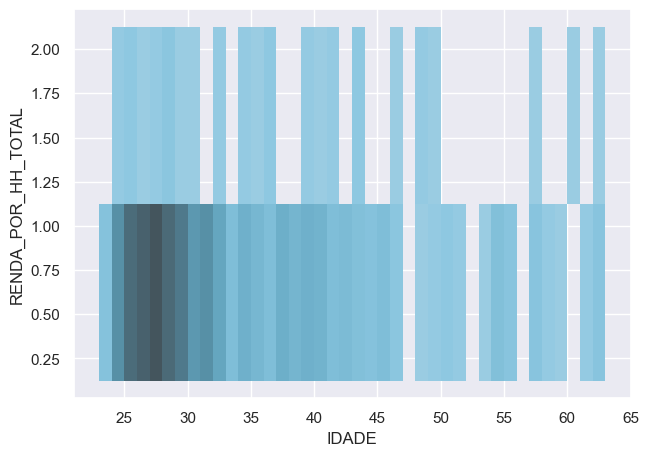

In [922]:
sns.set_theme(style="darkgrid")
sns.histplot(data=df_2_eda, x="IDADE", y="RENDA_POR_HH_TOTAL", color="skyblue", stat='density', bins=20, alpha=1, binwidth=1, discrete=False, common_norm=False, multiple='stack')

<AxesSubplot:xlabel='Probability', ylabel='RENDA_POR_HH_TOTAL'>

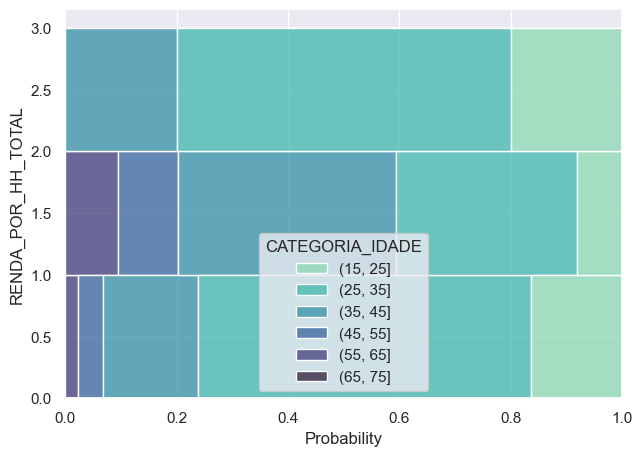

In [923]:
sns.histplot(data=df_2_eda, y="RENDA_POR_HH_TOTAL", hue="CATEGORIA_IDADE", stat='probability', palette='mako_r', common_bins=True, binrange=(0,8), binwidth=1, multiple='fill',legend=True)

### Explorando a Satisfação Profissional

<AxesSubplot:xlabel='REGIAO', ylabel='INDICE_SATISFACAO_PROFISSIONAL'>

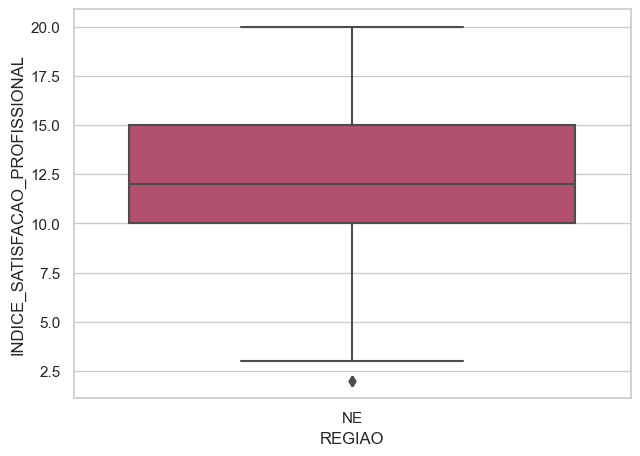

In [924]:
sns.set_theme(style="whitegrid")
sns.boxplot(x=df_2_eda["REGIAO"], y=df_2_eda["INDICE_SATISFACAO_PROFISSIONAL"], palette='flare')

<AxesSubplot:xlabel='CATEGORIA_PJ', ylabel='INDICE_SATISFACAO_PROFISSIONAL'>

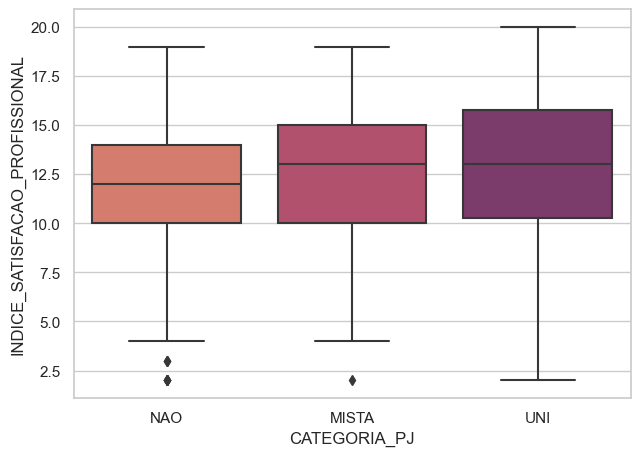

In [925]:
sns.set_theme(style="whitegrid")
sns.boxplot(x=df_2_eda["CATEGORIA_PJ"], y=df_2_eda["INDICE_SATISFACAO_PROFISSIONAL"], palette='flare')

<AxesSubplot:xlabel='INDICE_SATISFACAO_PROFISSIONAL', ylabel='Probability'>

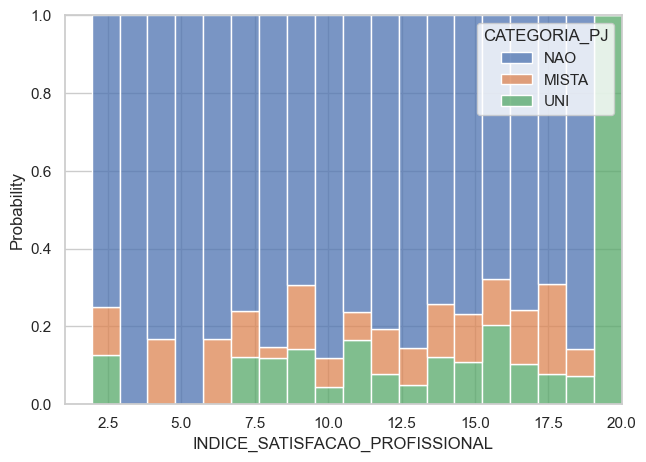

In [926]:
sns.set_theme(style="whitegrid")
sns.histplot(data=df_2_eda, x="INDICE_SATISFACAO_PROFISSIONAL", hue="CATEGORIA_PJ", stat='probability', bins=20, common_bins=True, binrange=(1,20), common_norm=True, multiple='fill',)

<AxesSubplot:xlabel='CATEGORIA_IDADE', ylabel='INDICE_SATISFACAO_PROFISSIONAL'>

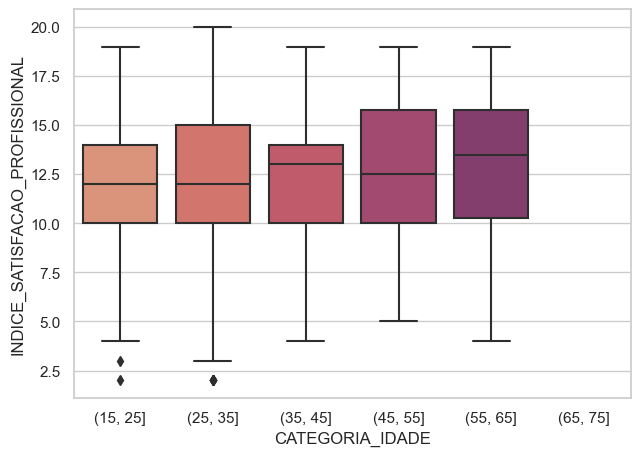

In [927]:
sns.set_theme(style="whitegrid")
sns.boxplot(x=df_2_eda["CATEGORIA_IDADE"], y=df_2_eda["INDICE_SATISFACAO_PROFISSIONAL"], palette='flare')

<AxesSubplot:xlabel='IDADE', ylabel='INDICE_SATISFACAO_PROFISSIONAL'>

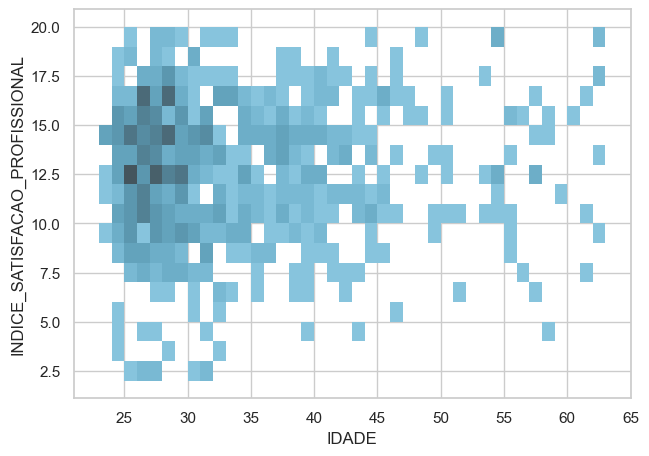

In [928]:
sns.histplot(data=df_2_eda, x="IDADE", y="INDICE_SATISFACAO_PROFISSIONAL", color="skyblue", stat='density', bins=20, alpha=1, binwidth=1, discrete=False, common_norm=False, multiple='stack')

<AxesSubplot:xlabel='Probability', ylabel='INDICE_SATISFACAO_PROFISSIONAL'>

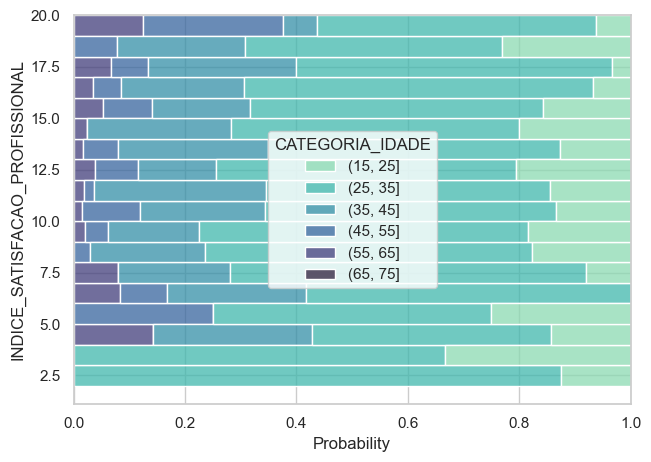

In [929]:
sns.histplot(data=df_2_eda, y="INDICE_SATISFACAO_PROFISSIONAL", hue="CATEGORIA_IDADE", palette='mako_r', stat='probability', common_bins=True, binrange=(0,20), binwidth=1, multiple='fill',legend=True)

## Outros

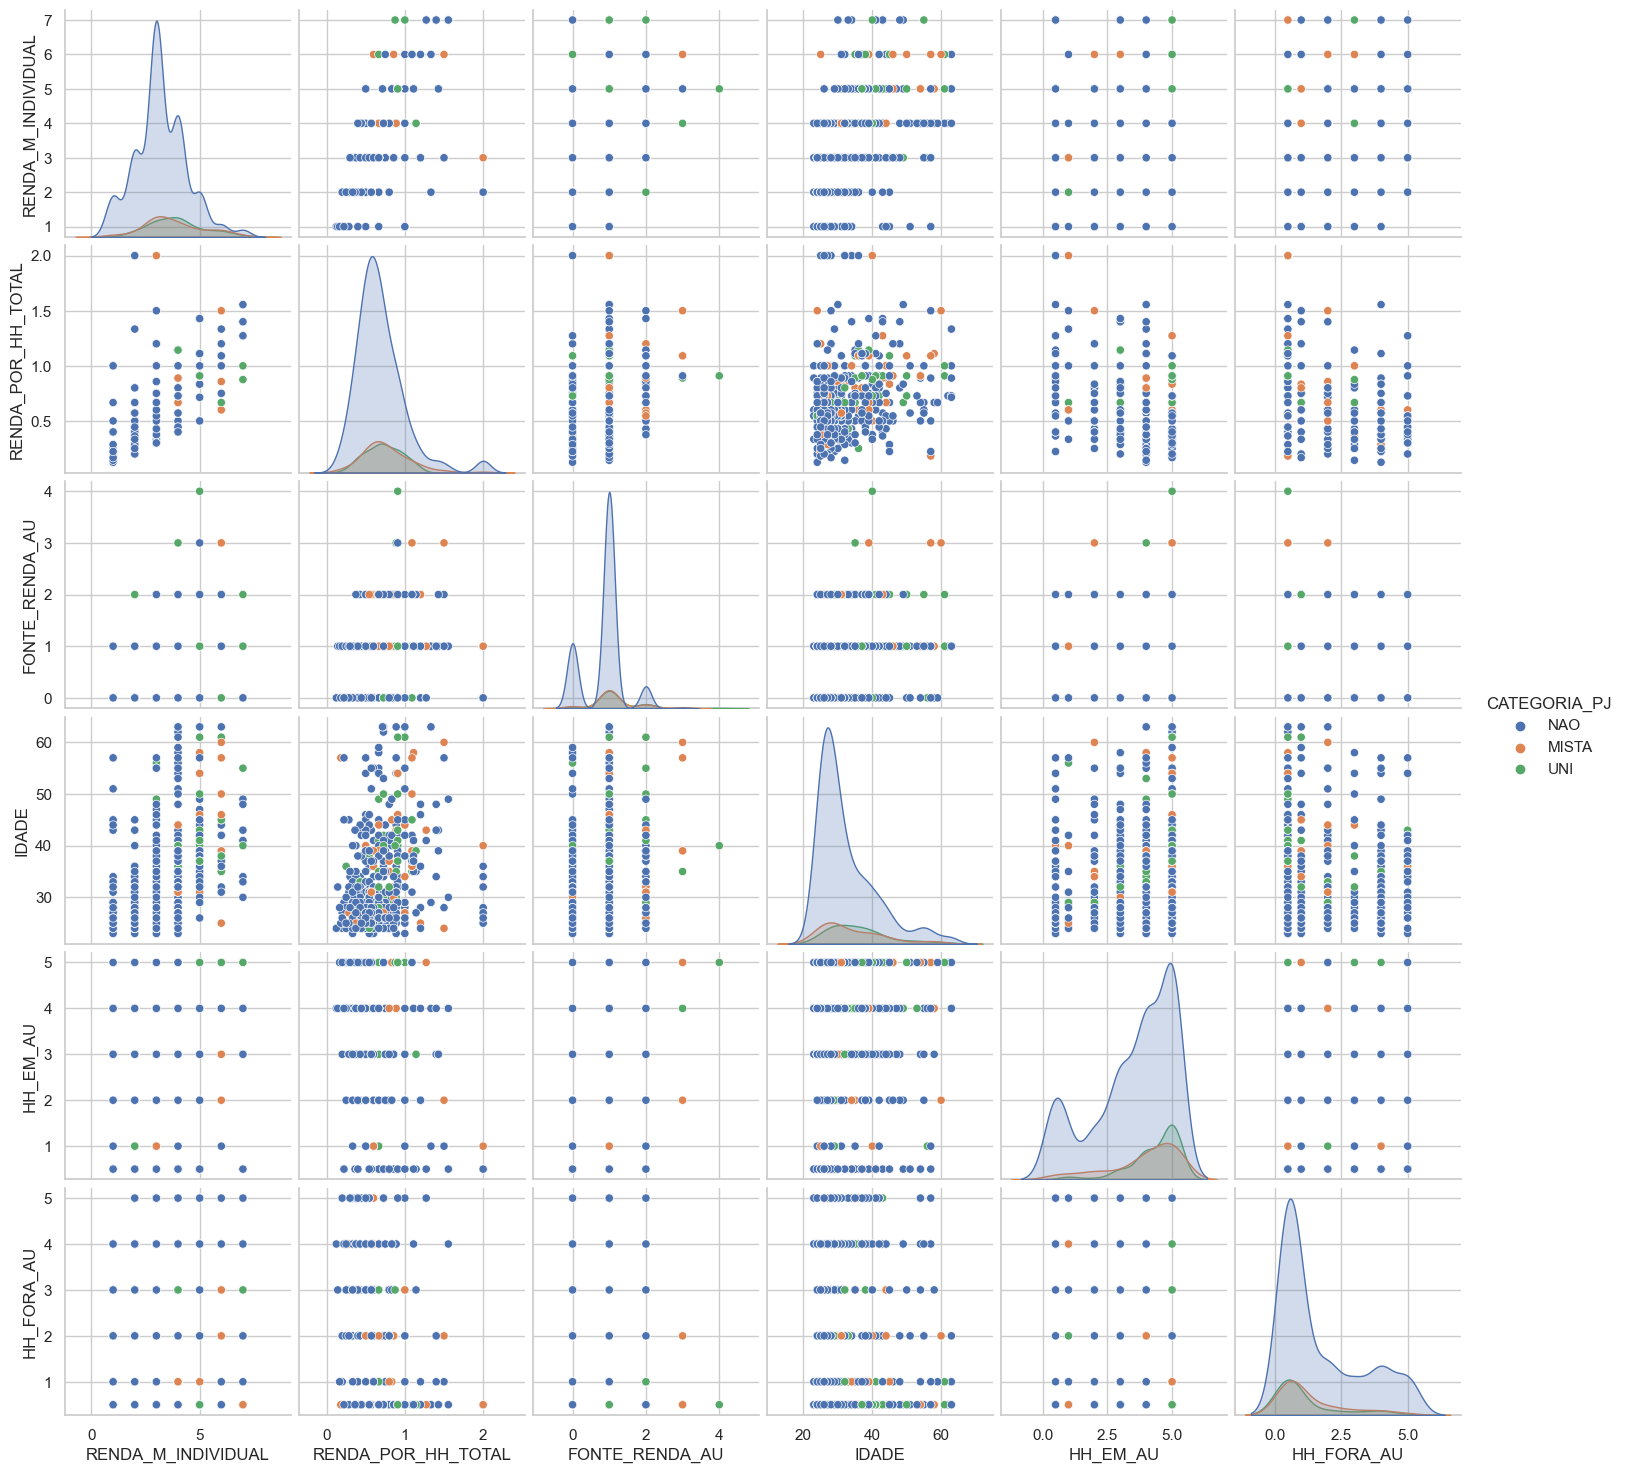

In [933]:
df_sns = df_2_eda[['RENDA_M_INDIVIDUAL','RENDA_POR_HH_TOTAL','FONTE_RENDA_AU','IDADE','HH_EM_AU','HH_FORA_AU','CATEGORIA_PJ']]
sns.pairplot(df_sns, hue='CATEGORIA_PJ', kind='scatter', diag_kind='auto')
#{‘scatter’, ‘kde’, ‘hist’, ‘reg’}
#diag_kind{‘auto’, ‘hist’, ‘kde’, None}

## Classificação Não-Supervisionada

In [53]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
# Calculate the linkage: mergings
mergings = linkage(samples,method='complete')
# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

NameError: name 'samples' is not defined

## Pré-Processamento

In [68]:
df_3_preproc = df_2_eda.copy()

## 2. Use Feature Hashing:

Feature hashing is a technique used on sparse datasets in which the dataset can be binned into the desired number of outputs.
Output:

## 3. Perform Feature Selection and Feature Extraction

## 4. Use t-Distributed Stochastic Neighbor Embedding (t-SNE)

## 5. Use low variance filter

In [71]:
from sklearn.feature_extraction import FeatureHasher
h = FeatureHasher(n_features=10)
p = [{'dog': 1, 'cat':2, 'elephant':4},{'dog': 2, 'run': 5}]
f = h.transform(p)
f.toarray()

array([[ 0.,  0., -4., -1.,  0.,  0.,  0.,  0.,  0.,  2.],
       [ 0.,  0.,  0., -2., -5.,  0.,  0.,  0.,  0.,  0.]])

## Caminho 1: Hot Encoding + Sparse Data (SVD)

In [55]:
df_3_preproc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 753 entries, 32 to 45354
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   IDADE                            753 non-null    float64 
 1   RENDA_M_INDIVIDUAL               753 non-null    float64 
 2   RENDA_M_FAMILIAR                 753 non-null    float64 
 3   FONTE_RENDA_AU                   753 non-null    float64 
 4   FONTE_RENDA_NAO_AU               753 non-null    float64 
 5   FONTE_RENDA_EXTRA                753 non-null    float64 
 6   HH_EM_AU                         708 non-null    float64 
 7   HH_FORA_AU                       644 non-null    float64 
 8   RENDA_POR_HH_TOTAL               627 non-null    float64 
 9   ESCOLARIDADE                     753 non-null    float64 
 10  INDICE_FORMACAO_ACADEMICA        753 non-null    float64 
 11  INDICE_SATISFACAO_IES            753 non-null    float64 
 12  QNTD_IDIOM

In [69]:
df_3_preproc.drop(
    #['CATEGORIA_IDADE','UF','REGIAO'],
    labels=['UF','IDADE','QNTD_ENTIDADES_FILIADAS','RENDA_POR_HH_TOTAL'],
    axis=1, inplace=True)

In [70]:
df_3_preproc[['CATEGORIA_GENERO','REGIAO','CATEGORIA_PJ']] = df_3_preproc[['CATEGORIA_GENERO','REGIAO','CATEGORIA_PJ']].astype('category')

In [71]:
dict_fillna = {
    'HH_EM_AU': 0,'HH_FORA_AU': 0,
              }
df_3_preproc.fillna(value=dict_fillna,inplace=True)

C:\Users\Bruno\AppData\Local\Temp\ipykernel_25176\2916214650.py:4: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_3_preproc.fillna(value=dict_fillna,inplace=True)


<Axes: >

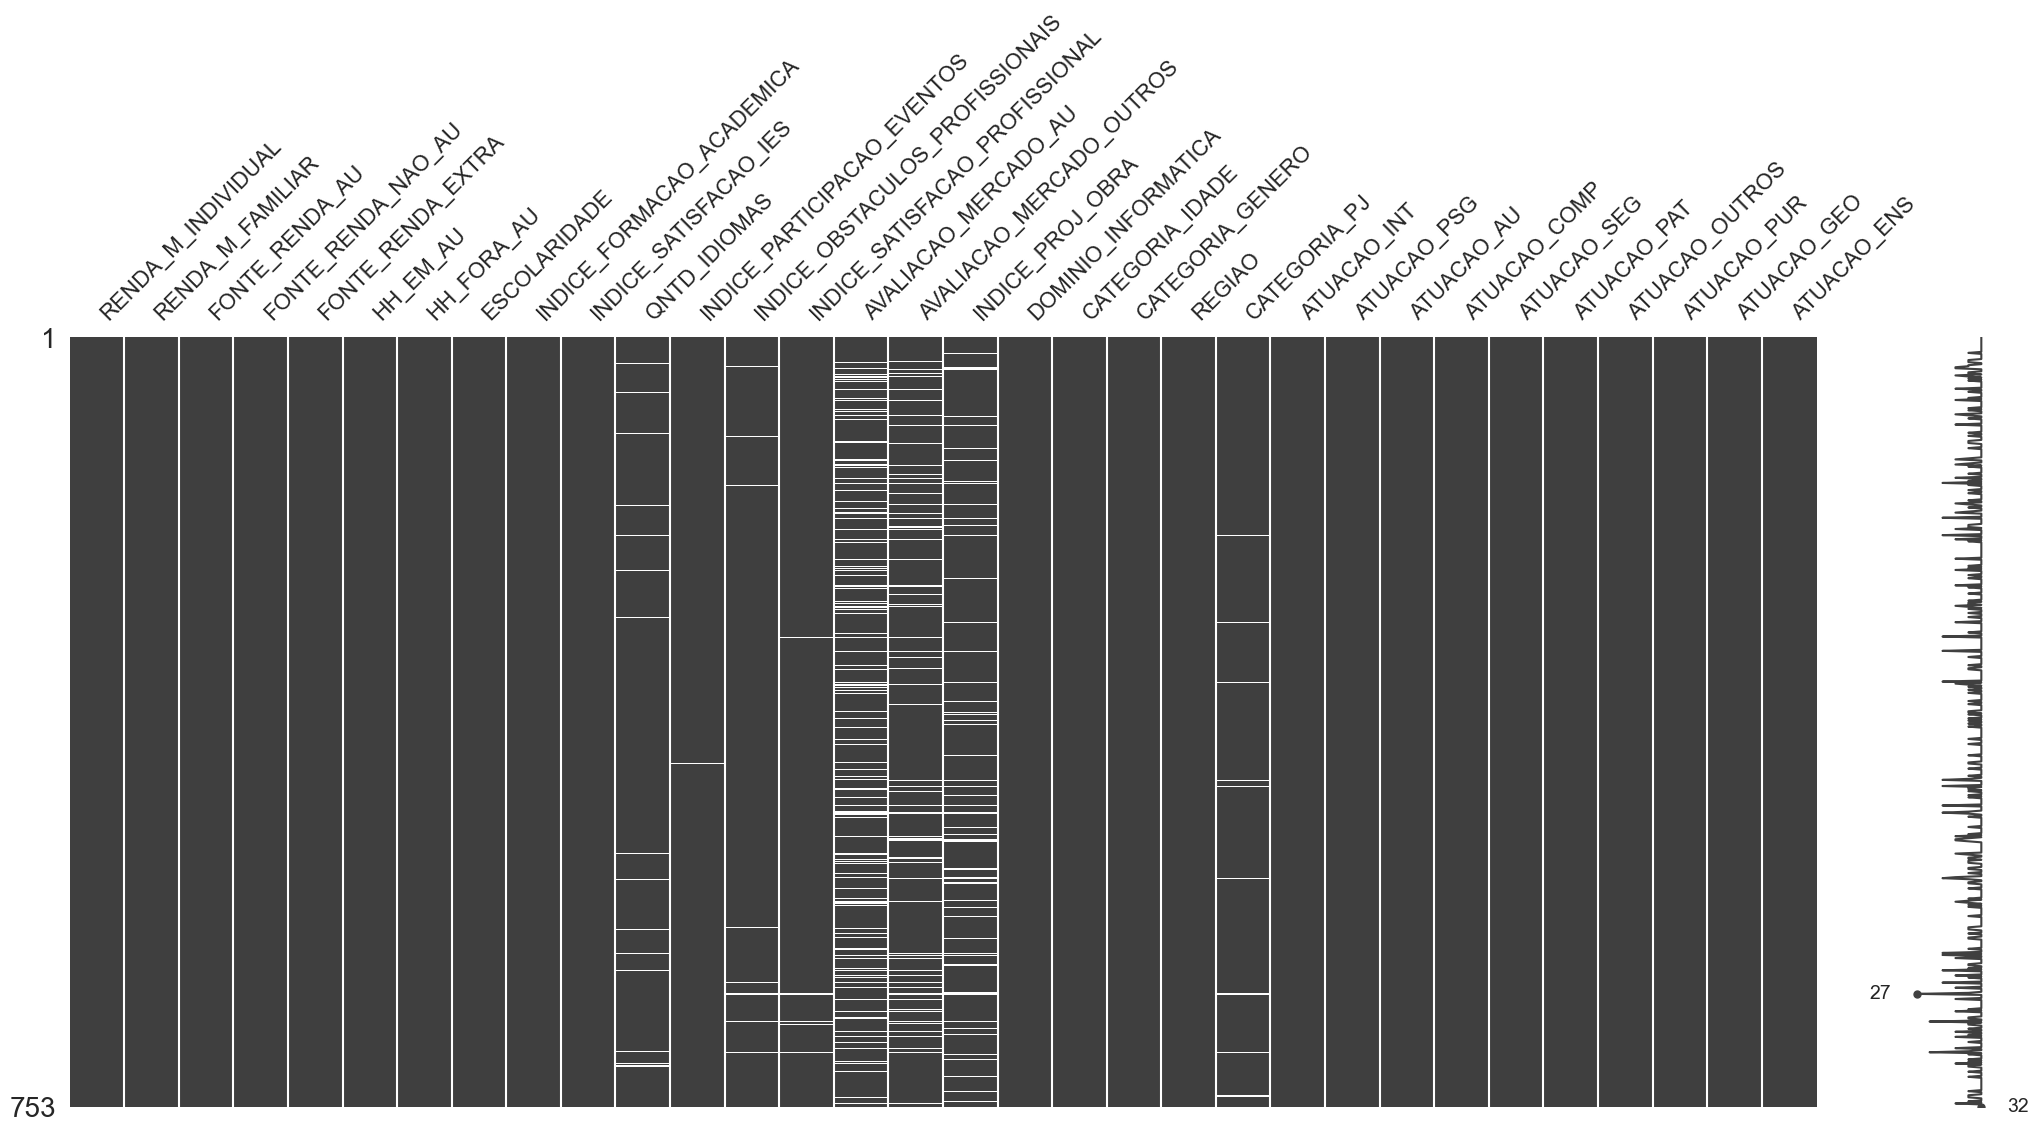

In [59]:
msno.matrix(df_3_preproc)

In [72]:
def preenche_mediana_coluna(df, coluna):
    df[coluna] = df[coluna].apply(lambda x: df[coluna].median() if pd.isnull(x) else x)
    return df

In [73]:
preenche_mediana_coluna(df_3_preproc,'AVALIACAO_MERCADO_AU')

RENDA_M_INDIVIDUAL  RENDA_M_FAMILIAR  FONTE_RENDA_AU  \
32                    4.0               4.0             1.0   
156                   8.0               8.0             1.0   
193                   4.0               4.0             1.0   
340                   3.0               6.0             0.0   
414                   2.0               3.0             1.0   
...                   ...               ...             ...   
45273                 5.0               5.0             1.0   
45278                 5.0               6.0             1.0   
45346                 3.0               4.0             1.0   
45353                 3.0               4.0             2.0   
45354                 3.0               4.0             1.0   

       FONTE_RENDA_NAO_AU  FONTE_RENDA_EXTRA  HH_EM_AU  HH_FORA_AU  \
32                    0.0                0.0       4.0         0.5   
156                   1.0                0.0       0.5         5.0   
193                   1.0                0.0       0.5         3.0   
340                   1.0                0.0       0.0         0.0   
414                   0.0                0.0       4.0         2.0   
...                   ...                ...       ...         ...   
45273                 0.0                0.0       0.5         4.0   
45278                 0.0                0.0       5.0         0.5   
45346                 0.0                0.0       5.0         5.0   
45353                 0.0                0.0       4.0         0.5   
45354                 0.0                0.0       5.0         0.0   

       ESCOLARIDADE  INDICE_FORMACAO_ACADEMICA  INDICE_SATISFACAO_IES  ...  \
32              2.0                        9.0                    4.0  ...   
156             3.0                        8.0                    3.0  ...   
193             2.0                        9.0                    5.0  ...   
340             2.0                       13.0                    5.0  ...   
414             2.0                       13.0                    4.0  ...   
...             ...                        ...                    ...  ...   
45273           2.0                        6.0                    5.0  ...   
45278           2.0                       10.0                    5.0  ...   
45346           1.0                       12.0                    4.0  ...   
45353           1.0                       10.0                    4.0  ...   
45354           1.0                        2.0                    4.0  ...   

       ATUACAO_INT  ATUACAO_PSG  ATUACAO_AU  ATUACAO_COMP  ATUACAO_SEG  \
32             0.0          0.0         1.0           0.0          0.0   
156            0.0          0.0         1.0           1.0          0.0   
193            1.0          0.0         1.0           0.0          0.0   
340            0.0          0.0         1.0           1.0          0.0   
414            1.0          1.0         0.0           0.0          0.0   
...            ...          ...         ...           ...          ...   
45273          0.0          0.0         0.0           0.0          1.0   
45278          1.0          0.0         1.0           0.0          0.0   
45346          1.0          1.0         1.0           0.0          0.0   
45353          1.0          1.0         0.0           0.0          0.0   
45354          1.0          0.0         1.0           0.0          0.0   

       ATUACAO_PAT  ATUACAO_OUTROS  ATUACAO_PUR ATUACAO_GEO ATUACAO_ENS  
32             0.0             0.0          0.0         0.0         0.0  
156            0.0             1.0          1.0         0.0         0.0  
193            0.0             0.0          0.0         0.0         0.0  
340            0.0             0.0          0.0         0.0         0.0  
414            0.0             0.0          0.0         0.0         0.0  
...            ...             ...          ...         ...         ...  
45273          0.0             0.0          0.0         0.0      

In [74]:
df_3_preproc['AVALIACAO_MERCADO_AU'] = df_3_preproc['AVALIACAO_MERCADO_AU'].fillna(df_3_preproc['AVALIACAO_MERCADO_AU'].median())
df_3_preproc['AVALIACAO_MERCADO_OUTROS'] = df_3_preproc['AVALIACAO_MERCADO_OUTROS'].fillna(df_3_preproc['AVALIACAO_MERCADO_OUTROS'].median())
#df_3_preproc.groubpy('AVALIACAO_MERCADO_AU').agg({"RENDA_M_INDIVIDUAL": lambda x: x.mean()})

In [75]:
(df_3_preproc.isna().sum() / len(df_3_preproc))

RENDA_M_INDIVIDUAL                 0.000000
RENDA_M_FAMILIAR                   0.000000
FONTE_RENDA_AU                     0.000000
FONTE_RENDA_NAO_AU                 0.000000
FONTE_RENDA_EXTRA                  0.000000
HH_EM_AU                           0.000000
HH_FORA_AU                         0.000000
ESCOLARIDADE                       0.000000
INDICE_FORMACAO_ACADEMICA          0.000000
INDICE_SATISFACAO_IES              0.000000
QNTD_IDIOMAS                       0.021248
INDICE_PARTICIPACAO_EVENTOS        0.001328
INDICE_OBSTACULOS_PROFISSIONAIS    0.010624
INDICE_SATISFACAO_PROFISSIONAL     0.006640
AVALIACAO_MERCADO_AU               0.000000
AVALIACAO_MERCADO_OUTROS           0.000000
INDICE_PROJ_OBRA                   0.077025
DOMINIO_INFORMATICA                0.000000
CATEGORIA_IDADE                    0.000000
CATEGORIA_GENERO                   0.000000
REGIAO                             0.000000
CATEGORIA_PJ                       0.013280
ATUACAO_INT                     

In [64]:
categorias = ['DOMINIO_INFORMATICA','INDICE_FORMACAO_ACADEMICA','INDICE_SATISFACAO_PROFISSIONAL','AVALIACAO_MERCADO_AU','AVALIACAO_MERCADO_OUTROS']
for categoria in categorias:
    coluna = df_3_preproc[categoria]
    nova_coluna = 'CAT_' + categoria
    df_3_preproc[nova_coluna] = pd.cut(coluna, 5)
    df_3_preproc.drop(labels=categoria,axis=1,inplace=True)
    
#intervalos = [0,5,10,15,20,25,30]
#bins = intervalos
#df.groupby('CATEGORIA_IDADE')['CATEGORIA_IDADE'].count()

In [76]:
df_3_preproc.describe().transpose()

count       mean       std  min   25%   50%  \
RENDA_M_INDIVIDUAL               753.0   3.505976  1.424623  0.0   3.0   3.0   
RENDA_M_FAMILIAR                 753.0   4.861886  1.759335  0.0   4.0   5.0   
FONTE_RENDA_AU                   753.0   0.912351  0.562828  0.0   1.0   1.0   
FONTE_RENDA_NAO_AU               753.0   0.217795  0.447037  0.0   0.0   0.0   
FONTE_RENDA_EXTRA                753.0   0.209827  0.435840  0.0   0.0   0.0   
HH_EM_AU                         753.0   3.373838  1.722819  0.0   2.0   4.0   
HH_FORA_AU                       753.0   1.382470  1.515368  0.0   0.5   0.5   
ESCOLARIDADE                     753.0   1.691899  0.812568  1.0   1.0   2.0   
INDICE_FORMACAO_ACADEMICA        753.0   9.628154  4.714154  1.0   7.0  10.0   
INDICE_SATISFACAO_IES            753.0   4.195219  0.817286  1.0   4.0   4.0   
QNTD_IDIOMAS                     737.0   2.447354  1.855580  0.1   1.0   2.0   
INDICE_PARTICIPACAO_EVENTOS      752.0   1.763298  0.518457  1.0   1.0   2.0   
INDICE_OBSTACULOS_PROFISSIONAIS  745.0   1.834899  0.793702  1.0   1.0   2.0   
INDICE_SATISFACAO_PROFISSIONAL   748.0  12.176471  3.571175  1.0  10.0  12.0   
AVALIACAO_MERCADO_AU             753.0   1.997344  0.788881  1.0   1.0   2.0   
AVALIACAO_MERCADO_OUTROS         753.0   4.557769  1.867178  1.0   3.0   5.0   
INDICE_PROJ_OBRA                 695.0   2.041727  1.212204  1.0   1.0   2.0   
DOMINIO_INFORMATICA              753.0  14.549801  3.178297  3.0  13.0  15.0   
ATUACAO_INT                      753.0   0.690571  0.462565  0.0   0.0   1.0   
ATUACAO_PSG                      753.0   0.201859  0.401654  0.0   0.0   0.0   
ATUACAO_AU                       753.0   0.669323  0.470770  0.0   0.0   1.0   
ATUACAO_COMP                     753.0   0.180611  0.384951  0.0   0.0   0.0   
ATUACAO_SEG                      753.0   0.027888  0.164763  0.0   0.0   0.0   
ATUACAO_PAT                      753.0   0.063745  0.244461  0.0   0.0   0.0   
ATUACAO_OUTROS                   753.0   0.236388  0.425145  0.0   0.0   0.0   
ATUACAO_PUR                      753.0   0.143426  0.350740  0.0   0.0   0.0   
ATUACAO_GEO                      753.0   0.066401  0.249147  0.0   0.0   0.0   
ATUACAO_ENS                      753.0   0.126162  0.332253  0.0   0.0   0.0   

                                  75%   max  
RENDA_M_INDIVIDUAL                4.0   8.0  
RENDA_M_FAMILIAR                  6.0   8.0  
FONTE_RENDA_AU                    1.0   4.0  
FONTE_RENDA_NAO_AU                0.0   3.0  
FONTE_RENDA_EXTRA                 0.0   2.0  
HH_EM_AU                          5.0   5.0  
HH_FORA_AU                        2.0   5.0  
ESCOLARIDADE                      2.0   6.0  
INDICE_FORMACAO_ACADEMICA        12.0  30.0  
INDICE_SATISFACAO_IES             5.0   5.0  
QNTD_IDIOMAS                      4.0   9.0  
INDICE_PARTICIPACAO_EVENTOS       2.0   4.0  
INDICE_OBSTACULOS_PROFISSIONAIS   2.0   3.0  
INDICE_SATISFACAO_PROFISSIONAL   15.0  20.0  
AVALIACAO_MERCADO_AU              3.0   3.0  
AVALIACAO_MERCADO_OUTROS          6.0   9.0  
INDICE_PROJ_OBRA                  2.0   6.0  
DOMINIO_INFORMATICA              17.0  20.0  
ATUACAO_INT                       1.0   1.0  
ATUACAO_PSG                       0.0   1.0  
ATUACAO_AU                        1.0   1.0  
ATUACAO_COMP                      0.0   1.0  
ATUACAO_SEG                       0.0   1.0  
ATUACAO_PAT                       0.0   1.0  
ATUACAO_OUTROS                    0.0   1.0  
ATUACAO_PUR                       0.0   1.0  
ATUACAO_GEO                       0.0   1.0  
ATUACAO_ENS                       0.0   1.0

In [77]:
df_3_preproc.dropna(inplace=True)

<Axes: >

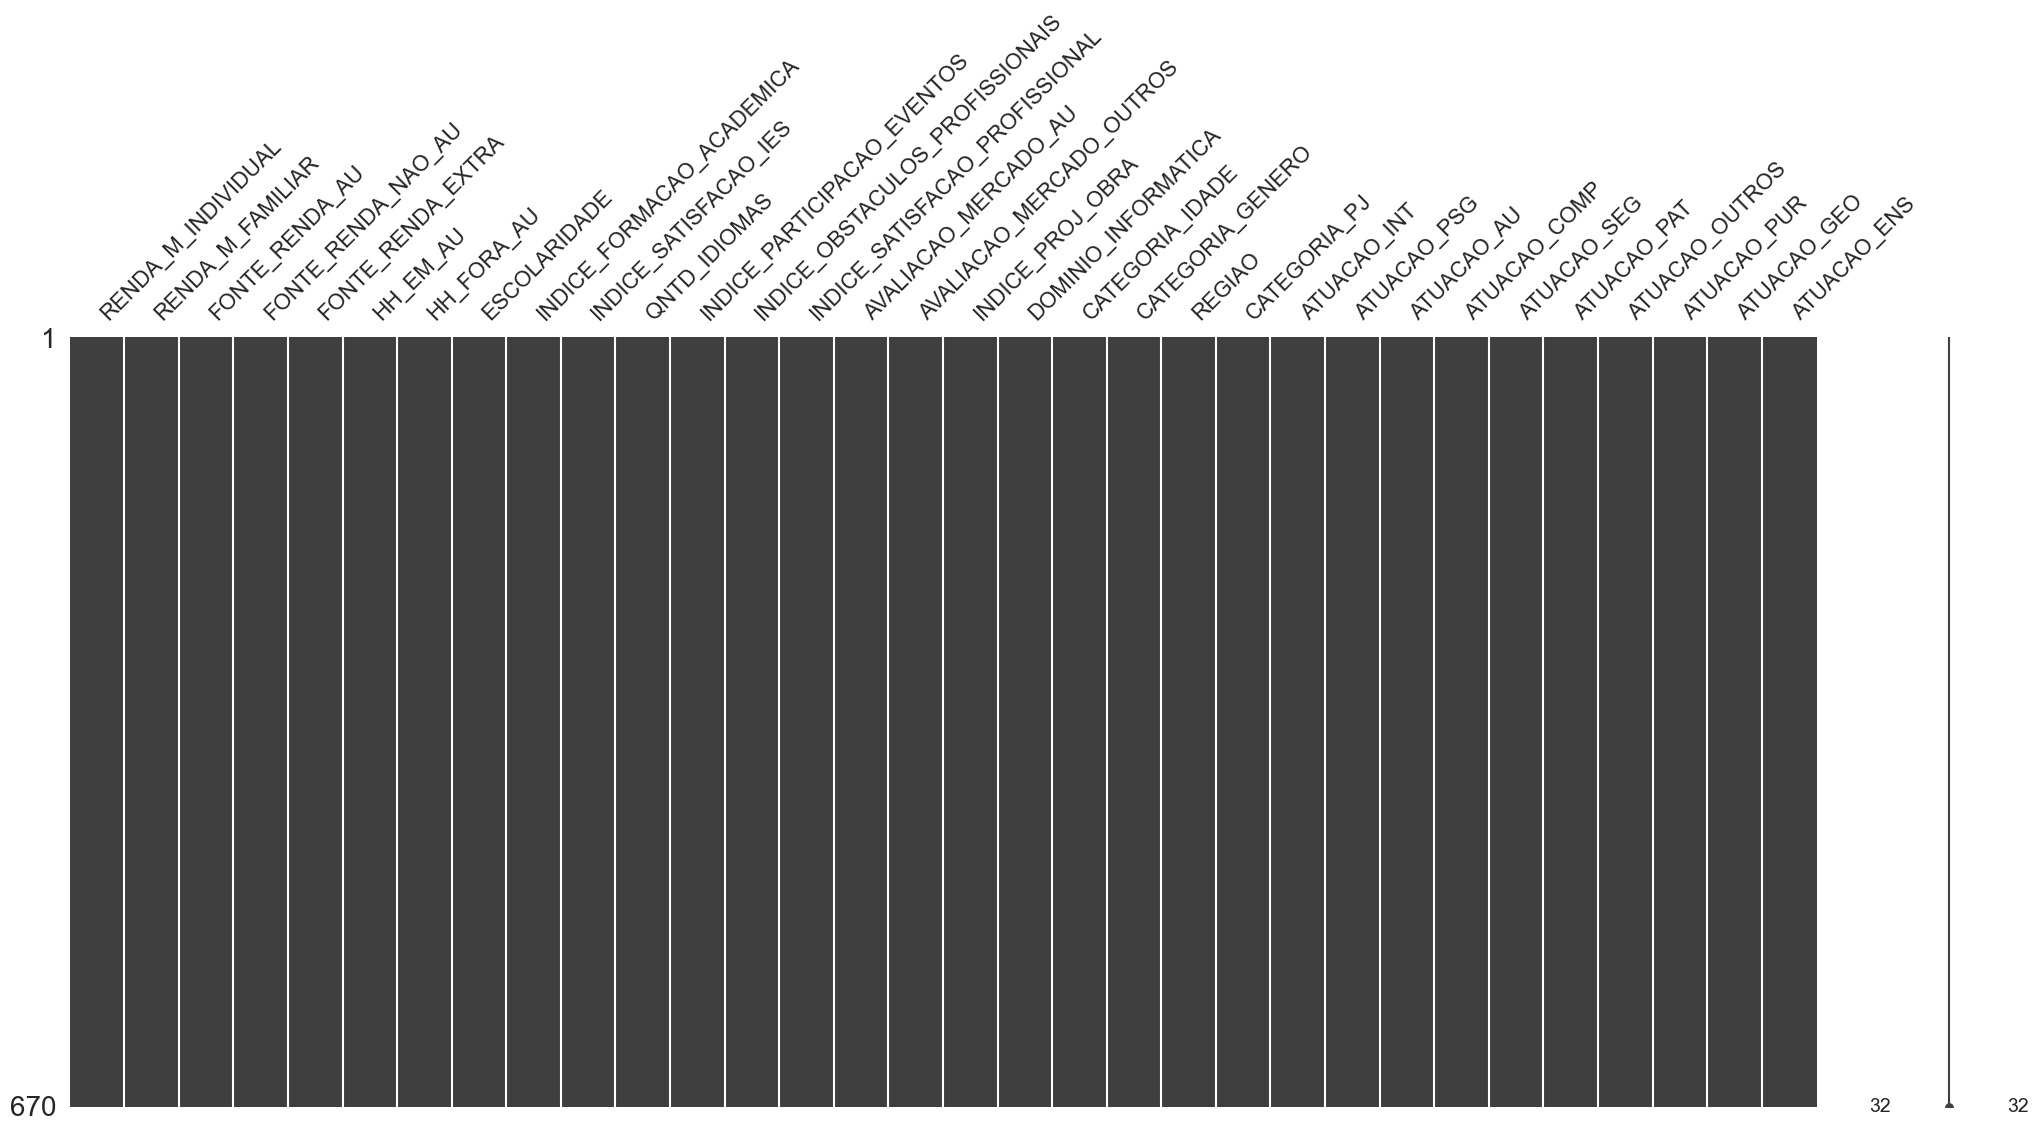

In [78]:
msno.matrix(df_3_preproc)

In [79]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
features_categoricas = df_3_preproc.columns.tolist()
for feature_categorica in features_categoricas:
    df_3_preproc[feature_categorica] = le.fit_transform(df_3_preproc[feature_categorica])

In [80]:
hot_encoding = pd.DataFrame()
for coluna in df_3_preproc.columns.tolist():
    hot_encoding = pd.concat([hot_encoding, pd.get_dummies(df_3_preproc[coluna], prefix=coluna, drop_first=True)], axis=1)
hot_encoding.describe().transpose()

count      mean       std  min  25%  50%  75%  max
RENDA_M_INDIVIDUAL_1  670.0  0.135821  0.342854  0.0  0.0  0.0  0.0  1.0
RENDA_M_INDIVIDUAL_2  670.0  0.380597  0.485896  0.0  0.0  0.0  1.0  1.0
RENDA_M_INDIVIDUAL_3  670.0  0.249254  0.432904  0.0  0.0  0.0  0.0  1.0
RENDA_M_INDIVIDUAL_4  670.0  0.091045  0.287888  0.0  0.0  0.0  0.0  1.0
RENDA_M_INDIVIDUAL_5  670.0  0.047761  0.213420  0.0  0.0  0.0  0.0  1.0
...                     ...       ...       ...  ...  ...  ...  ...  ...
ATUACAO_PAT_1         670.0  0.067164  0.250493  0.0  0.0  0.0  0.0  1.0
ATUACAO_OUTROS_1      670.0  0.226866  0.419118  0.0  0.0  0.0  0.0  1.0
ATUACAO_PUR_1         670.0  0.146269  0.353639  0.0  0.0  0.0  0.0  1.0
ATUACAO_GEO_1         670.0  0.068657  0.253058  0.0  0.0  0.0  0.0  1.0
ATUACAO_ENS_1         670.0  0.131343  0.338028  0.0  0.0  0.0  0.0  1.0

[152 rows x 8 columns]

In [81]:
hot_encoding.columns.tolist()

['RENDA_M_INDIVIDUAL_1',
 'RENDA_M_INDIVIDUAL_2',
 'RENDA_M_INDIVIDUAL_3',
 'RENDA_M_INDIVIDUAL_4',
 'RENDA_M_INDIVIDUAL_5',
 'RENDA_M_INDIVIDUAL_6',
 'RENDA_M_INDIVIDUAL_7',
 'RENDA_M_FAMILIAR_1',
 'RENDA_M_FAMILIAR_2',
 'RENDA_M_FAMILIAR_3',
 'RENDA_M_FAMILIAR_4',
 'RENDA_M_FAMILIAR_5',
 'RENDA_M_FAMILIAR_6',
 'RENDA_M_FAMILIAR_7',
 'RENDA_M_FAMILIAR_8',
 'FONTE_RENDA_AU_1',
 'FONTE_RENDA_AU_2',
 'FONTE_RENDA_AU_3',
 'FONTE_RENDA_AU_4',
 'FONTE_RENDA_NAO_AU_1',
 'FONTE_RENDA_NAO_AU_2',
 'FONTE_RENDA_NAO_AU_3',
 'FONTE_RENDA_EXTRA_1',
 'FONTE_RENDA_EXTRA_2',
 'HH_EM_AU_1',
 'HH_EM_AU_2',
 'HH_EM_AU_3',
 'HH_EM_AU_4',
 'HH_EM_AU_5',
 'HH_EM_AU_6',
 'HH_FORA_AU_1',
 'HH_FORA_AU_2',
 'HH_FORA_AU_3',
 'HH_FORA_AU_4',
 'HH_FORA_AU_5',
 'HH_FORA_AU_6',
 'ESCOLARIDADE_1',
 'ESCOLARIDADE_2',
 'ESCOLARIDADE_3',
 'ESCOLARIDADE_4',
 'ESCOLARIDADE_5',
 'INDICE_FORMACAO_ACADEMICA_1',
 'INDICE_FORMACAO_ACADEMICA_2',
 'INDICE_FORMACAO_ACADEMICA_3',
 'INDICE_FORMACAO_ACADEMICA_4',
 'INDICE_FORMACAO_A

In [82]:
hot_encoding.mean()

RENDA_M_INDIVIDUAL_1    0.135821
RENDA_M_INDIVIDUAL_2    0.380597
RENDA_M_INDIVIDUAL_3    0.249254
RENDA_M_INDIVIDUAL_4    0.091045
RENDA_M_INDIVIDUAL_5    0.047761
                          ...   
ATUACAO_PAT_1           0.067164
ATUACAO_OUTROS_1        0.226866
ATUACAO_PUR_1           0.146269
ATUACAO_GEO_1           0.068657
ATUACAO_ENS_1           0.131343
Length: 152, dtype: float64

In [571]:
array_features = hot_encoding.to_numpy()
array_features.shape

(670, 152)

In [620]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

#scaler = StandardScaler()
#scaler = MinMaxScaler()
scaler = RobustScaler()
scaled_features = scaler.fit_transform(array_features)

https://stackabuse.com/feature-scaling-data-with-scikit-learn-for-machine-learning-in-python/

Normalization is the process of scaling data into a range of [0, 1]. It's more useful and common for regression tasks.

Normalization is also known as Min-Max Scaling and Scikit-Learn provides the MinMaxScaler for this purpose. On the other hand, it also provides a Normalizer, which can make things a bit confusing.

Standardization is the process of scaling data so that they have a mean value of 0 and a standard deviation of 1. It's more useful and common for classification tasks.

It's worth noting that standardizing data doesn't guarantee that it'll be within the [0, 1] range. It most likely won't be - which can be a problem for certain algorithms that expect this range.

When to Perform Feature Scaling?

Feature Scaling doesn't guarantee better model performance for all models.

For instance, Feature Scaling doesn't do much if the scale doesn't matter. For K-Means Clustering, the Euclidean distance is important, so Feature Scaling makes a huge impact. It also makes a huge impact for any algorithms that rely on gradients, such as linear models that are fitted by minimizing loss with Gradient Descent. Principal Component Analysis (PCA) also suffers from data that isn't scaled properly.

In the case of Scikit-Learn - you won't see any tangible difference with a LinearRegression, but will see a substantial difference with a SGDRegressor, because a SGDRegressor, which is also a linear model, depends on Stochastic Gradient Descent to fit the parameters.

In [ ]:
from sklearn.pipeline import make_pipeline
estimator = make_pipeline(StandardScaler(), kmeans).fit(data)

NameError: name 'kmeans' is not defined

An alternative standardization is scaling features to lie between a given minimum and maximum value, often between zero and one, or so that the maximum absolute value of each feature is scaled to unit size. This can be achieved using MinMaxScaler or MaxAbsScaler, respectively. The motivation to use this scaling include robustness to very small standard deviations of features and preserving zero entries in sparse data.

If your data contains many outliers, scaling using the mean and variance of the data is likely to not work very well. In these cases, you can use RobustScaler as a drop-in replacement instead. It uses more robust estimates for the center and range of your data.

It is sometimes not enough to center and scale the features independently, since a downstream model can further make some assumption on the linear independence of the features. To address this issue you can use PCA with whiten=True to further remove the linear correlation across features.

In [621]:
scaled_features[:2]

array([[ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0., -1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0., -1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0., -1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0

In [622]:
scaled_features.shape

(670, 152)

# TruncatedSVD

In [625]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(
    n_components=150,
    n_oversamples=100,
    n_iter=7,
    random_state=42,
    
    )

svd.fit(array_features)
print(svd.explained_variance_ratio_)
print(svd.explained_variance_ratio_.sum())
print(svd.singular_values_)

transformed_features = svd.fit_transform(scaled_features)

[1.66433237e-02 4.52671487e-02 3.40672961e-02 3.25655327e-02
 3.09584243e-02 2.93489950e-02 2.69824393e-02 2.50847998e-02
 2.46085144e-02 2.28930418e-02 2.21331612e-02 2.10308366e-02
 1.98574905e-02 1.85577587e-02 1.79297966e-02 1.69405122e-02
 1.63871544e-02 1.61344007e-02 1.55134693e-02 1.51586465e-02
 1.48801332e-02 1.47811289e-02 1.43753179e-02 1.36827679e-02
 1.33005273e-02 1.25759857e-02 1.23753436e-02 1.20588660e-02
 1.18122162e-02 1.16996291e-02 1.08764685e-02 1.07471285e-02
 1.05376167e-02 1.02113026e-02 9.93268176e-03 9.32121356e-03
 9.14299538e-03 9.00095980e-03 8.87785091e-03 8.78756490e-03
 8.55427341e-03 8.40771073e-03 8.23595079e-03 8.03411514e-03
 7.82408901e-03 7.77087877e-03 7.51395939e-03 7.29986526e-03
 7.22003348e-03 7.10682839e-03 6.97400613e-03 6.78237787e-03
 6.55804623e-03 6.48162139e-03 6.32414506e-03 6.20759806e-03
 5.92495017e-03 5.85433338e-03 5.75294728e-03 5.38431366e-03
 5.36080531e-03 5.29633013e-03 5.17756059e-03 5.08847061e-03
 4.98158743e-03 4.766236

In [602]:
transformed_features.shape

(670, 120)

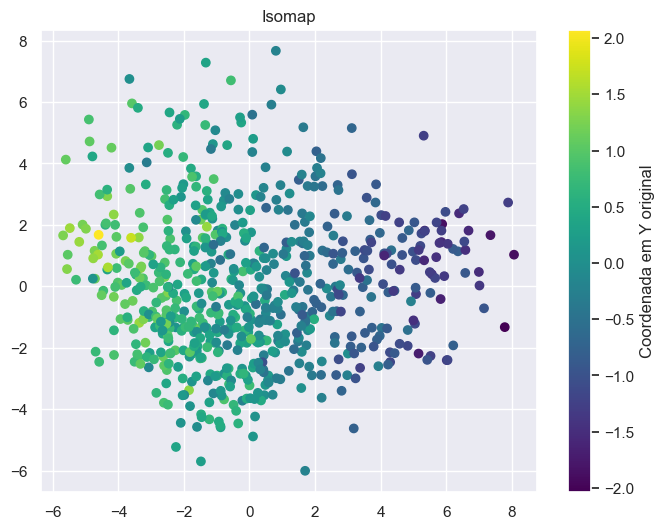

In [626]:
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import Isomap

# Crie um conjunto de dados de exemplo (swiss roll)
X = transformed_features

# Aplique o Isomap
n_neighbors = 10  # Número de vizinhos a serem considerados para a construção do grafo de vizinhos
n_components = 2  # Número de componentes a serem extraídos (dimensão da projeção)

isomap = Isomap(
    n_neighbors=n_neighbors,
    n_components=n_components,
    eigen_solver='dense',
    neighbors_algorithm='brute')

X_reduced = isomap.fit_transform(X)

# Visualize os resultados
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=X[:, 1], cmap=plt.cm.viridis)
plt.title("Isomap")
plt.colorbar(label='Coordenada em Y original')
plt.show()

# PCA

With the best line (linear combination) found, PCA gets the directions of its axes, called eigenvectors, and its linear coefficients, the eigenvalues. The combination of the eigenvectors and eigenvalues - or axes directions and coefficients - are the Principal Components of PCA. And that is when we can choose our number of dimensions based on the explained variance of each feature, by understanding which principal components we want to keep or discard based on how much variance they explain.

After obtaining the principal components, PCA uses the eigenvectors to form a vector of features that reorient the data from the original axes to the ones represented by the principal components - that's how the data dimensions are reduced.

PCA is a linear transformation, and linearity is sensitive to the scale of data. Therefore, PCA works best when all data values are on the same scale.

https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/

In [582]:
scaled_features.shape

(670, 152)

In [630]:
from sklearn.decomposition import PCA
pca = PCA(
    n_components=100, whiten=True,
)
transformed_features = pca.fit_transform(scaled_features)
#.transform(scaled_features)
print(
    '\n Total de variância explicada: {}'.format(pca.explained_variance_ratio_.sum()),'\n',
    'Explicação de variância por Componente Principal: {}'.format(pca.explained_variance_ratio_),
    '\n Variância de rúido: {}'.format(pca.noise_variance_)
    
)


 Total de variância explicada: 0.9716959503145117 
 Explicação de variância por Componente Principal: [0.04574356 0.03769789 0.03282213 0.03163552 0.02995604 0.02728108
 0.02582266 0.02469962 0.02295013 0.02284289 0.02120239 0.01987189
 0.01866806 0.0182639  0.01743777 0.016688   0.01624645 0.01612247
 0.01534488 0.01498527 0.01480424 0.01451971 0.01426575 0.01334091
 0.01302913 0.01248457 0.01219061 0.01182663 0.01177272 0.01093237
 0.01085593 0.01056242 0.0102383  0.00993497 0.00963212 0.00928366
 0.00905929 0.00899952 0.00879018 0.00855451 0.00844243 0.00838236
 0.00823112 0.00801897 0.00778498 0.00771929 0.00732381 0.00728781
 0.00713369 0.00697546 0.00680511 0.00662897 0.0065443  0.00642705
 0.00623506 0.00607353 0.00591145 0.00584354 0.0057197  0.00536587
 0.00531321 0.00524171 0.00515361 0.00499988 0.00481297 0.0046885
 0.00462943 0.00447118 0.00442657 0.00421653 0.00407664 0.00402336
 0.00387355 0.00377585 0.00370404 0.00363914 0.00356885 0.00330147
 0.00327988 0.00323273 0.00

In [631]:
ps = pd.DataFrame(transformed_features)
ps.head()

0         1         2         3         4         5         6   \
0  0.081586 -0.195744  1.463982 -0.753671 -1.756076 -0.405000  1.166952   
1  0.371700  1.352746 -0.572940  1.460888 -0.500841  0.084118  0.624092   
2  0.056471  0.697145 -2.353936 -0.002827 -1.078565 -1.567674 -0.682064   
3  0.805685  1.115665 -0.635204 -0.219225  0.354457 -1.314208 -0.013014   
4 -1.583566 -0.755934  0.391109 -1.536955 -0.053155 -1.513163  0.157126   

         7         8         9   ...        90        91        92        93  \
0  2.149554  0.255914  1.710357  ... -0.535058 -0.119754 -0.142885 -0.609421   
1 -0.092311 -0.706397 -0.836269  ... -1.227164 -0.932445 -0.489750  1.237811   
2  1.642861 -0.250700  0.305592  ... -0.019786 -0.081706 -0.707646  2.996818   
3 -0.857144  0.524614  0.418030  ... -0.801049  1.164455  0.006262  0.006454   
4 -0.104600 -0.305313 -0.883194  ...  0.698991 -1.232531 -0.281205  0.258815   

         94        95        96        97        98        99  
0  0.090540 -0.111141 -0.734714 -0.132377  0.197638  0.167645  
1  1.278177 -1.327078 -0.327193  0.159653 -0.540640  0.763305  
2  0.412981 -1.601792  0.909169 -0.965618  0.485279  0.934111  
3  0.190706 -0.864009 -1.626653 -1.649426  0.664332  0.560466  
4 -1.937599 -0.417777 -0.227447  0.209843 -0.339298  1.365112  

[5 rows x 100 columns]

## Dendrograma

Notice that HCAs can be either divisive and top-down, or agglomerative and bottom-up. The top-down DHC approach works best when you have fewer, but larger clusters, hence it's more computationally expensive. On the other hand, the bottom-up AHC approach is fitted for when you have many smaller clusters. It is computationally simpler, more used, and more available.

# T-SNE

https://towardsdatascience.com/t-sne-clearly-explained-d84c537f53a

https://distill.pub/2016/misread-tsne/

https://builtin.com/data-science/tsne-python

In [632]:
from sklearn.manifold import TSNE
from tqdm import tqdm

perplexity_values = [2,3,5,10,20,40,60,80,100]
#perplexity_range = [5,25]
n_components=2
label_colunas_1 = []
label_colunas_2 = []

for n_perplexity in perplexity_values:
    for i in range(0,n_components):
        label_colunas_1.append(n_perplexity)
        label_colunas_2.append(i)

df_tsne = pd.DataFrame(columns=[label_colunas_1,label_colunas_2], dtype='float64')

for n_perplexity in tqdm(perplexity_values):
    tsne = TSNE(
        n_components=(n_components), verbose=0, perplexity=n_perplexity, n_iter=10000, init='pca'
    )
    #print(f'KL Divergence {n_perplexity}: {tsne.kl_divergence_}')
    tsne_results = tsne.fit_transform(transformed_features)
    for i in range(0,n_components):
        df_tsne[n_perplexity, i] = tsne_results[:,(i-1)]

df_tsne

100%|██████████| 9/9 [00:46<00:00,  5.22s/it]


2                      3                     5               \
             0           1          0          1          0          1   
0   -12.768229   29.132021  44.017876   9.867848   0.956368  -6.436350   
1    48.120247   94.723648  38.726162  -9.240394 -11.927522  58.419590   
2    20.955460  102.752113  58.393600 -10.001774  53.283833  34.371941   
3    71.347984  -44.442944  16.573900 -72.379768 -36.647682  48.392132   
4   -38.229210   89.401230  44.909313  72.356720   5.073579 -62.336819   
..         ...         ...        ...        ...        ...        ...   
665 -95.627754    3.519962 -35.292778  60.711723  39.727882  43.474762   
666 -35.298206  -84.985077 -78.994133 -38.689484  39.173782 -37.224545   
667  30.007526  -15.948547 -70.583351  13.259582 -40.318359   3.330286   
668  31.131521   15.860703  86.184586  66.060257 -22.629118  32.321632   
669 -50.613075   91.114235  24.031727  71.313202  56.544128  -3.843018   

           10                    20                    40             \
             0          1          0          1          0         1   
0    -6.453494  -9.372075  -3.483911   1.197384   0.851768 -1.668219   
1    23.467648  26.246088  -9.670556 -22.424807  -9.730425  1.497211   
2    17.829672  29.044353 -10.140901  20.243126  12.394282 -6.384149   
3     5.579962 -29.876518  -6.428965 -11.800958  -0.267171 -5.078278   
4   -19.681213   9.715779   4.777153  15.883635   3.424129  2.322809   
..         ...        ...        ...        ...        ...       ...   
665  11.589664  38.251232  -3.674178 -13.671133   8.075736  0.916531   
666  23.346994   4.436904  14.082925 -11.790152  -3.098761  1.831979   
667 -31.526552   0.729156   4.365199  -6.839659  -1.360729  4.472221   
668 -33.851044 -23.956724   5.425020   8.198345  -3.625635 -9.456123   
669  32.252312  14.906175   5.411885  18.152464  -0.413976 -7.552916   

          60                  80                  100            
            0         1         0         1         0         1  
0   -0.358877  0.259394 -0.319741  0.086467 -0.710504 -0.582592  
1   -3.498843  0.691762  0.993158 -2.137834 -2.058364  1.079816  
2   -3.598099  4.344526  0.966710 -0.097598 -2.320317  0.732066  
3    1.402051  1.104607 -1.650116  0.569184 -1.798341 -1.193769  
4   -1.336275  2.611001  1.946877 -0.628411  0.817277  0.471311  
..        ...       ...       ...       ...       ...       ...  
665 -2.419857  1.654659  1.527635  1.000379 -0.395809  1.007811  
666  2.072479 -0.872438 -1.697416 -0.595855 -0.521528 -1.816133  
667  2.041487 -0.359073 -1.510033 -0.850227 -0.349207 -1.785573  
668 -0.638608 -1.700853 -0.598401  1.638765 -1.401687 -2.370590  
669 -1.458800  2.676336  0.821677 -0.657739  0.231962  0.046032  

[670 rows x 18 columns]

In [95]:
perplexity_range = int(len(perplexity_values))
print(
    perplexity_range,
    n_components,
    len(df_tsne.columns.tolist()),
    perplexity_values
)

9 2 18 [2, 3, 5, 10, 20, 40, 60, 80, 100]


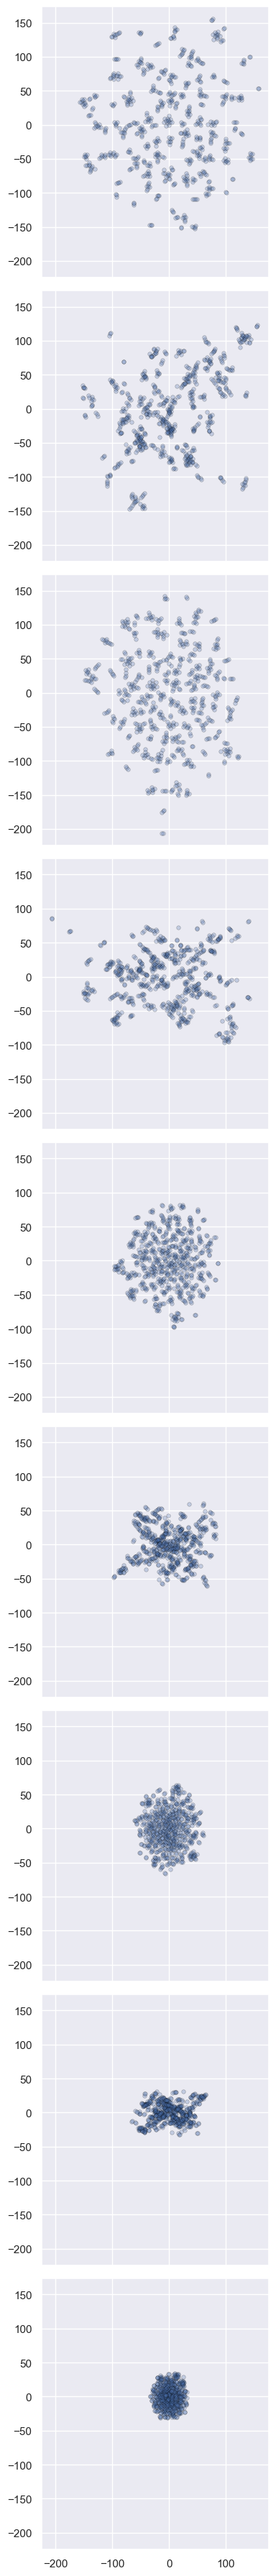

In [634]:
fig, axs = plt.subplots(
    nrows=perplexity_range, ncols=1,
    sharex=True, sharey=True, figsize=(4, ((perplexity_range/1.5)**2))
)
i = 0
while i < perplexity_range:
    x = df_tsne.iloc[:,i].array
    y = df_tsne.iloc[:,(i+1)].array
    axs[i].plot(x, y, 'bo', markersize=4, alpha=0.25, markeredgecolor='black', markeredgewidth=.5)
    i += 1
fig.tight_layout()
#fig.subplots_adjust(hspace=5.0)
plt.show()
#axs[0].plot(x,y)
#axs.set_title('Simple plot')

[t-SNE] Computing 271 nearest neighbors...
[t-SNE] Indexed 670 samples in 0.001s...
[t-SNE] Computed neighbors for 670 samples in 0.056s...
[t-SNE] Computed conditional probabilities for sample 670 / 670
[t-SNE] Mean sigma: 3.677587
[t-SNE] KL divergence after 250 iterations with early exaggeration: 11800.951172
[t-SNE] KL divergence after 4850 iterations: 1.401376


100%|██████████| 1/1 [00:00<00:00, 499.86it/s]


<Axes: xlabel='0', ylabel='1'>

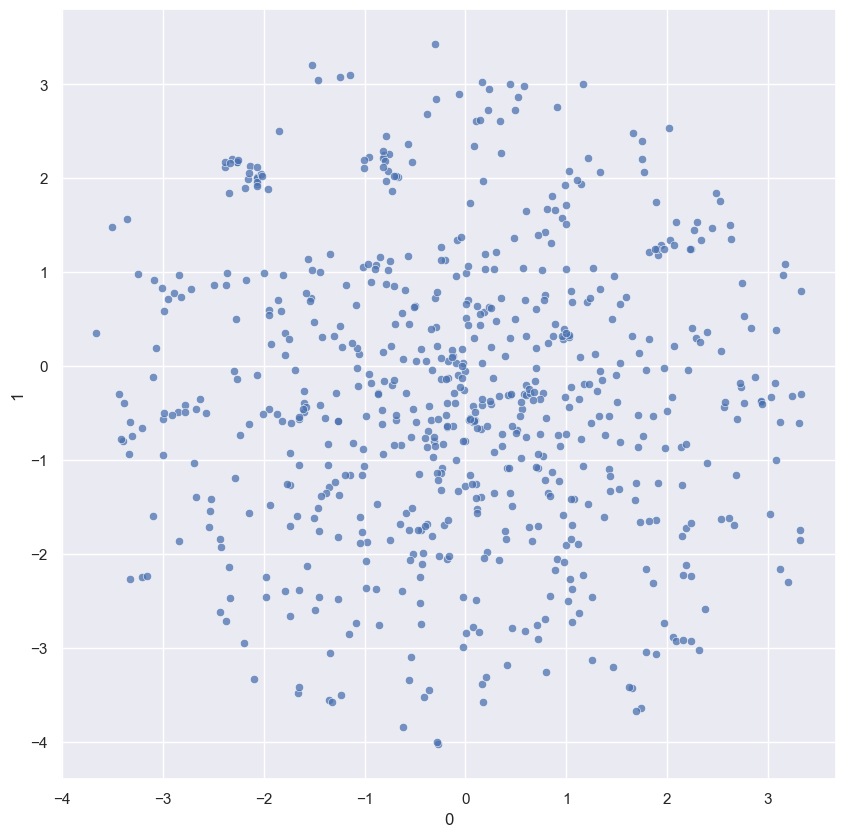

In [691]:
tsne = TSNE(
    n_components=2,
    verbose=1,
    perplexity=90,
    early_exaggeration=1000,
    n_iter=10000,
    learning_rate=5,
    #method='exact'
    #init='pca'
)
tsne_results = tsne.fit_transform(transformed_features)
for i in tqdm(range(1,n_components)):
    df_tsne[i] = tsne_results[:,(i-1)]
tsne_escolhido = pd.DataFrame(tsne_results)
#tsne_escolhido
plt.figure(figsize=(10,10))
sns.scatterplot(
    data=tsne_escolhido,
    x=0, y=1,
    #hue="tsne-2d-three",
    #palette=sns.color_palette("hls", 10),
    legend="full",
    alpha=.75,
    #marker=markers
)

## KMedoids

In [494]:
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(
    n_clusters=4, random_state=None, max_iter=300,
    metric='euclidean', init='heuristic', method='alternate', #method='pam', 
).fit(transformed_features)
print(
    kmedoids.labels_,
    kmedoids.cluster_centers_,
    kmedoids.medoid_indices_,
    kmedoids.inertia_
)

[0 1 0 3 0 2 2 2 0 0 0 2 2 3 0 0 3 2 2 0 3 0 1 3 3 2 0 0 2 1 2 3 3 2 1 3 2
 1 1 1 2 1 0 0 0 1 3 2 0 1 3 3 2 0 3 1 2 1 1 2 3 0 0 3 3 1 1 3 3 0 0 1 3 1
 3 0 0 3 1 3 3 2 0 1 0 0 1 2 2 3 1 1 3 3 1 3 1 3 3 0 0 2 2 0 3 0 1 0 1 3 0
 2 0 2 0 2 0 1 1 0 2 0 2 3 3 1 1 2 1 2 2 2 1 0 0 3 1 0 1 3 0 1 1 3 3 0 1 2
 2 1 1 3 1 3 1 2 3 3 1 0 1 2 2 0 2 0 3 2 2 0 1 2 2 1 0 1 0 0 2 3 0 3 1 0 0
 1 3 3 0 0 2 0 3 2 1 3 3 1 2 0 1 2 2 3 0 1 2 0 2 1 2 2 2 1 3 2 3 1 2 2 0 2
 1 3 1 1 1 2 2 2 0 2 2 1 3 0 3 1 3 2 0 2 3 0 2 1 2 0 2 1 1 1 3 3 0 1 2 3 2
 2 2 1 0 0 0 3 1 3 3 1 0 2 2 0 3 2 3 3 1 1 0 3 2 0 0 0 1 3 2 0 1 2 2 0 1 0
 3 0 2 0 2 3 0 2 3 1 2 1 2 1 2 0 2 1 0 2 0 3 2 2 2 0 0 0 2 0 1 1 2 0 1 3 1
 3 2 3 2 2 1 2 1 1 2 3 1 0 1 0 1 1 1 0 0 3 3 1 3 2 1 2 3 2 1 2 1 2 3 2 3 0
 3 0 0 1 2 3 2 1 3 0 3 3 1 2 2 1 2 2 0 2 1 0 1 3 1 2 1 1 0 1 0 2 2 2 1 2 2
 3 2 1 2 2 2 2 3 2 3 1 2 2 1 2 2 1 3 0 2 2 2 0 1 0 3 3 3 2 3 1 2 0 2 1 2 2
 0 1 0 0 1 2 1 0 2 3 2 2 3 2 0 2 2 2 0 0 3 3 2 1 1 0 2 0 1 3 3 2 0 1 3 0 2
 1 3 1 0 0 3 0 0 1 3 1 2 

## K-means

### Silhouette Analysis

NameError: name 'X' is not defined

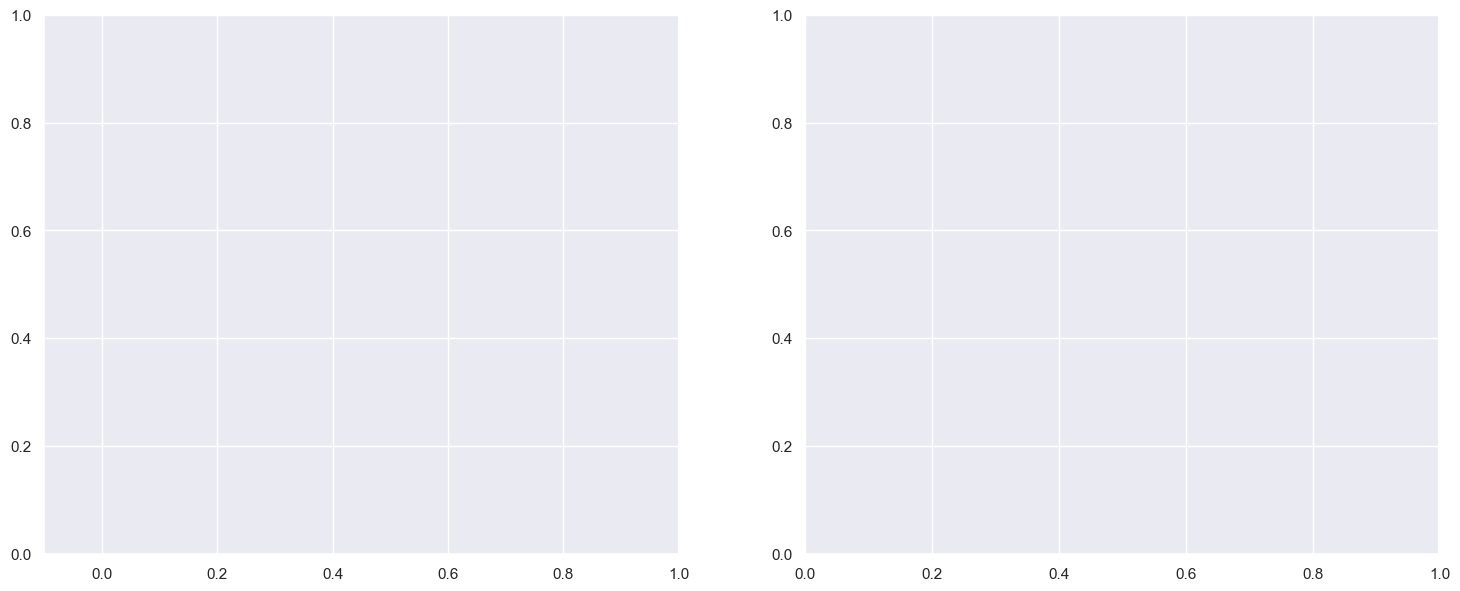

In [116]:
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6]
#range_n_clusters = range(2, 11)

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
    kmeans = KMeans(n_clusters=n_clusters, n_init="auto").fit(transformed_features)
    cluster_labels = kmeans.predict

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(transformed_features, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    break

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [149]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import HDBSCAN
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn_extra.cluster import KMedoids

ImportError: cannot import name 'HDBSCAN' from 'sklearn.cluster' (c:\Users\Bruno\anaconda3\lib\site-packages\sklearn\cluster\__init__.py)

In [100]:
clustering_metrics = [
    metrics.homogeneity_score,
    metrics.silhouette_score,
    metrics.completeness_score,
    metrics.v_measure_score,
    metrics.adjusted_rand_score,
    metrics.adjusted_mutual_info_score,
]

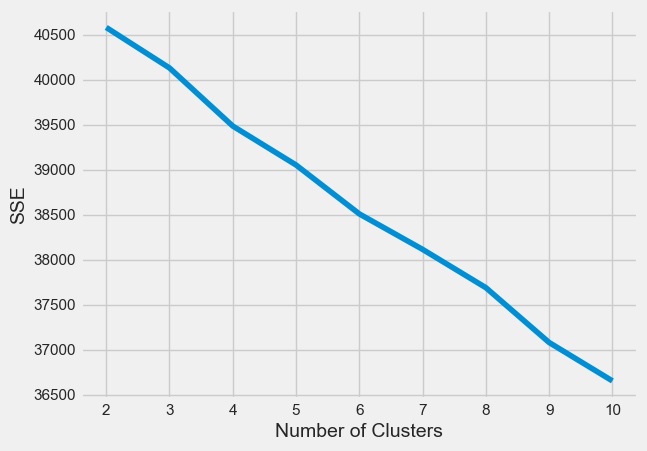

In [130]:
kmeans_kwargs = {
   "init": "random",
   "n_init": 10,
   "max_iter": 300,
   #"random_state": 42,
    "algorithm": "elkan"
   }
sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(transformed_features)
    #kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), sse)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [131]:
kl = KneeLocator(
   range(2, 11), sse, curve="convex", direction="decreasing"
   )

kl.elbow

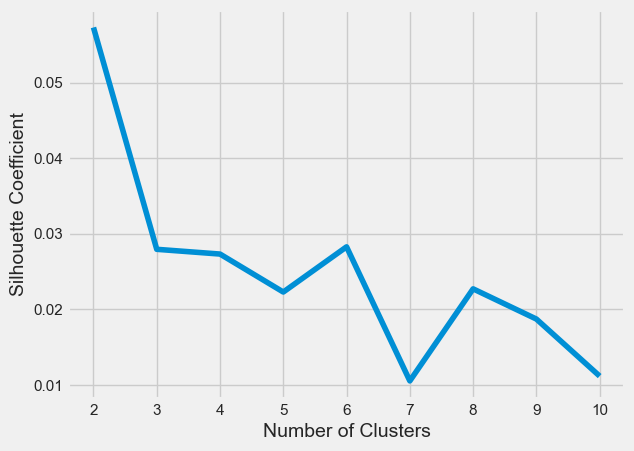

In [132]:
silhouette_coefficients = []
for k in range(2, 11):
   kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
   kmeans.fit(scaled_features)
   score = silhouette_score(scaled_features, kmeans.labels_)
   silhouette_coefficients.append(score)
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [133]:
kmeans = KMeans(
    algorithm="elkan",
    init="random",
    n_clusters=7,
    n_init=30,
    max_iter=1000,
   )

In [134]:
kmedoids = KMedoids(
    n_clusters=7, random_state=None, max_iter=300,
    metric='euclidean', init='heuristic', method='pam', 
    #method='alternate', 
)

In [135]:
clusterer = kmeans
#clusterer = kmedoids

clusterer.fit(transformed_features)
labels = clusterer.labels_
#centroids = clusterer.cluster_centers_

tsne_escolhido['labels'] = labels
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 7
Estimated number of noise points: 0


In [182]:
plt.figure(figsize=(12,12))
sns.set_theme(style="darkgrid")
sns.scatterplot(
    data=tsne_escolhido,
    x=0, y=1,
    hue="labels",
    palette='Spectral',
    #palette="ch:r=-.5,l=.75",
    #palette=sns.color_palette("hls", 10),
    legend="full",
    alpha=1,
    #marker=markers
)

ValueError: Could not interpret value `labels` for parameter `hue`

<Figure size 1200x1200 with 0 Axes>

GM / DBSCAN

Estimated number of clusters: 1
Estimated number of noise points: 0


<Axes: xlabel='0', ylabel='1'>

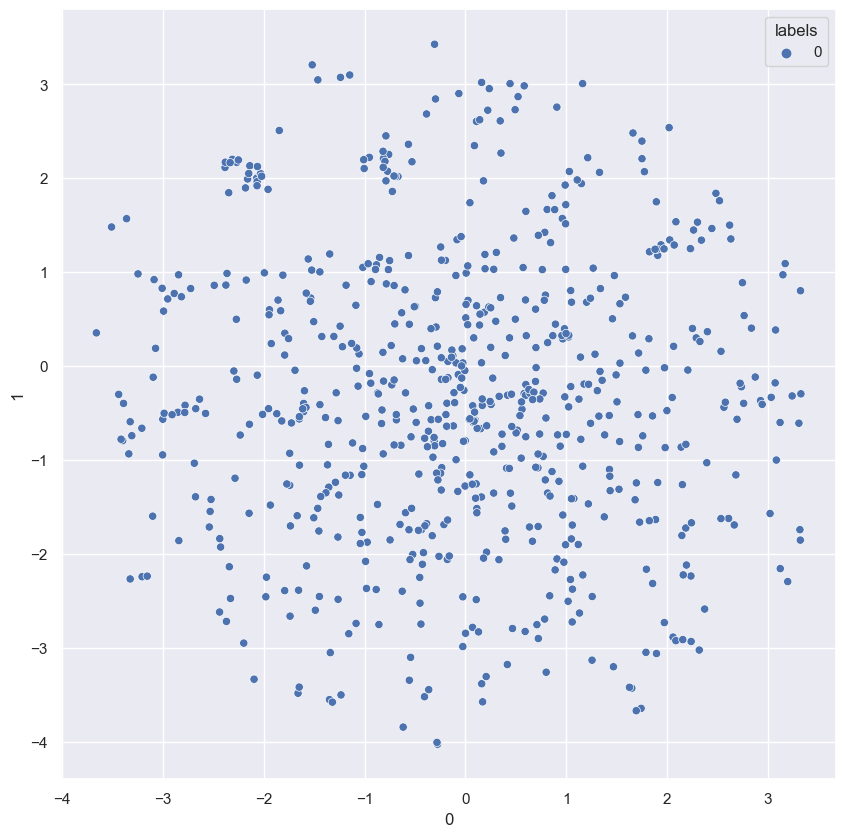

In [701]:
dbscan = DBSCAN(
    #eps=1, min_samples=3,
    eps=15, min_samples=2,
    metric='euclidean', metric_params=None, algorithm='auto',
    #metric='cityblock', metric_params=None, algorithm='auto',
    #metric{cityblock’, ‘cosine’, ‘euclidean’, ‘l1’, ‘l2’, ‘manhattan'}
    #algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}
)

#clusterer = hdbscan.HDBSCAN()

clusterer = dbscan
#clusterer.fit(transformed_features)
clusterer.fit(tsne_results)
labels = clusterer.labels_
tsne_escolhido['labels'] = labels
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

plt.figure(figsize=(10,10))
sns.set_theme(style="darkgrid")
sns.scatterplot(
    data=tsne_escolhido,
    x=0, y=1,
    hue="labels",
    palette='deep',
    #palette="ch:r=-.5,l=.75",
    #palette=sns.color_palette("hls", 10),
    legend="full",
    alpha=1,
    #marker=markers
)

# Gaussian

## Bayesian Gaussian Mixture

In [710]:
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(
    n_components=10,
    #'full' (each component has its own general covariance matrix),
    #'tied' (all components share the same general covariance matrix),
    #'diag' (each component has its own diagonal covariance matrix),
    #'spherical' (each component has its own single variance).
    #covariance_type='spherical',
    covariance_type='full',
    verbose=0,
    n_init=50,
    max_iter=300,
    warm_start=True,
    init_params='k-means++'
)
#bgm.fit(transformed_features)
#labels = bgm.predict(transformed_features)
#bgm.fit(tsne_results)
labels = bgm.fit_predict(tsne_results)

#labels = bgm.labels_
#labels = bgm.predict(transformed_features)

tsne_escolhido['labels'] = labels

<Axes: xlabel='0', ylabel='1'>

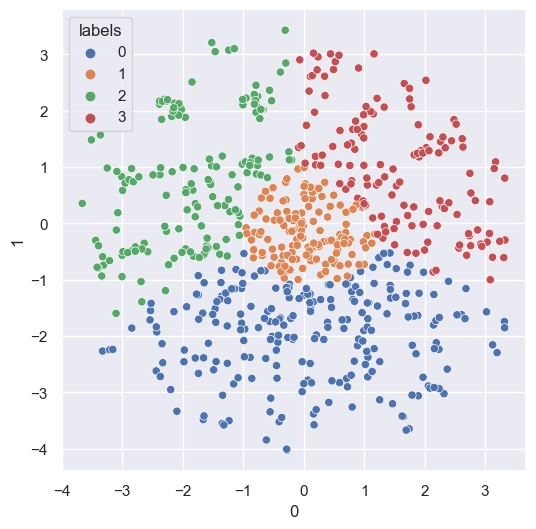

In [711]:
plt.figure(figsize=(6,6))
sns.set_theme(style="darkgrid")
sns.scatterplot(
    data=tsne_escolhido,
    x=0, y=1,
    hue="labels",
    #palette='Spectral',
    palette='deep',
    #palette='coolwarm',
    #palette="ch:r=-.5,l=.75",
    #palette=sns.color_palette("hls", 10),
    legend="full",
    alpha=1,
    #marker=markers
)

## Gaussian Mixture

In [717]:
gm = GaussianMixture(
    n_components=6,
    #covariance_type='spherical',
    covariance_type='full',
    max_iter=500,
    verbose=0,
    init_params='kmeans',
    #init_params='random',
    n_init=50,
    warm_start=True
)
#gm.fit(transformed_features)
gm.fit(tsne_results)
labels = gm.predict(tsne_results)

#labels = gm.predict(transformed_features)
tsne_escolhido['labels'] = labels

c:\Users\Bruno\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Bruno\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Bruno\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Bruno\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

In [714]:
print(
    gm.covariances_,
    gm.precisions_,
    gm.n_iter_
)

AttributeError: 'GaussianMixture' object has no attribute 'covariances_'

In [327]:
import os
diretorio = 'G:\\Meu Drive\\UNIFOR\\PROJETOS SOLO\\01 - CAU ML\\IMAGENS\\'
#diretorio = 'G:\\Meu Drive\\UNIFOR\\PESQUISAS E PROJETOS\\Projeto TCE-FUNCAP Antifraude\\Apresentações\\04 - RELATORIO MCDA TCE\\Imagens\\'
print(os.getcwd())

g:\Meu Drive\UNIFOR\PROJETOS SOLO\01 - CAU ML


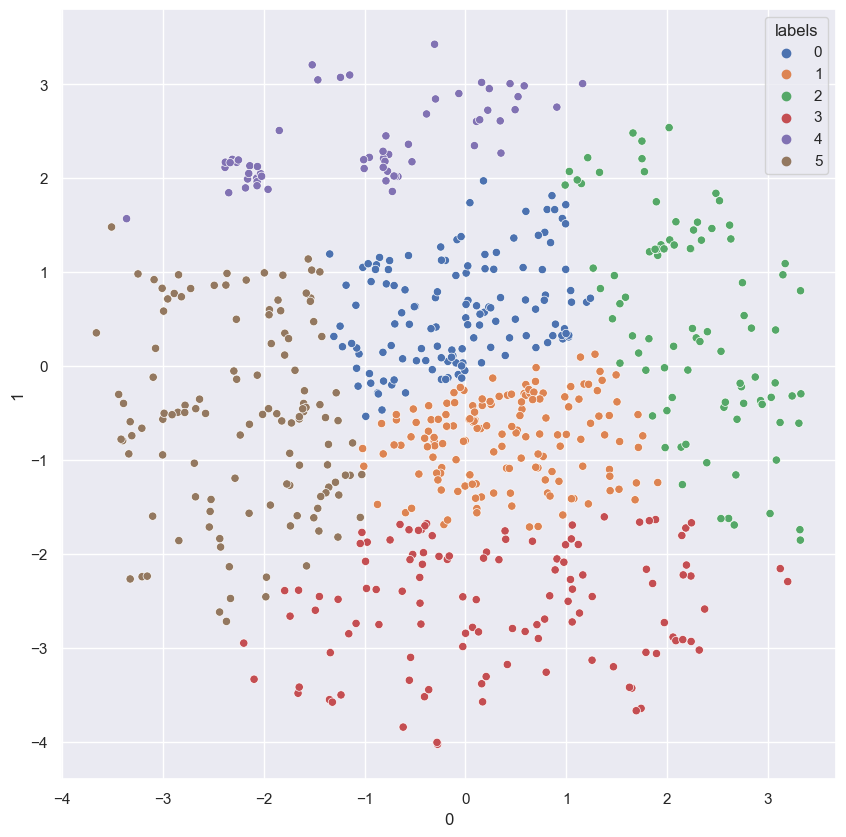

In [718]:
plt.figure(figsize=(10,10))
sns.set_theme(style="darkgrid")
sns.scatterplot(
    data=tsne_escolhido,
    x=0, y=1,
    hue="labels",
    #palette='Spectral',
    palette='deep',
    #palette='coolwarm',
    #palette="ch:r=-.5,l=.75",
    #palette=sns.color_palette("hls", 10),
    legend="full",
    alpha=1,
    #marker=markers
)

arquivo = 'TSNE_06_R00.png'
plt.savefig(os.path.join(diretorio, arquivo))

In [168]:
print(
    #kmedoids.medoid_indices_,
    #kmeans.cluster_centers_,
    #clusterer.n_iter_,
    #clusterer.inertia_,
)

Inertia is not a normalized metric. The lower values of inertia are better and zero is optimal, but in very high-dimensional spaces, euclidean distances tend to become inflated (this is an instance of curse of dimensionality).

Running a dimensionality reduction algorithm such as PCA prior to k-means clustering can alleviate this problem and speed up the computations.

In [169]:
print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels):.3f}")
print(
    "Adjusted Mutual Information:"
    f" {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}"
)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

NameError: name 'labels_true' is not defined

In [719]:
tsne_escolhido['labels'].unique()

array([1, 2, 3, 0, 4, 5], dtype=int64)

In [720]:
df_4_analise = df_3_preproc.copy()
#df_4_analise.reindex_like(tsne_escolhido)
df_4_analise.reset_index(inplace=True)
df_4_analise

index  RENDA_M_INDIVIDUAL  RENDA_M_FAMILIAR  FONTE_RENDA_AU  \
0       32                   3                 4               1   
1      156                   7                 8               1   
2      193                   3                 4               1   
3      340                   2                 6               0   
4      414                   1                 3               1   
..     ...                 ...               ...             ...   
665  45273                   4                 5               1   
666  45278                   4                 6               1   
667  45346                   2                 4               1   
668  45353                   2                 4               2   
669  45354                   2                 4               1   

     FONTE_RENDA_NAO_AU  FONTE_RENDA_EXTRA  HH_EM_AU  HH_FORA_AU  \
0                     0                  0         5           1   
1                     1                  0         1           6   
2                     1                  0         1           4   
3                     1                  0         0           0   
4                     0                  0         5           3   
..                  ...                ...       ...         ...   
665                   0                  0         1           5   
666                   0                  0         6           1   
667                   0                  0         6           6   
668                   0                  0         5           1   
669                   0                  0         6           0   

     ESCOLARIDADE  INDICE_FORMACAO_ACADEMICA  ...  ATUACAO_INT  ATUACAO_PSG  \
0               1                          8  ...            0            0   
1               2                          7  ...            0            0   
2               1                          8  ...            1            0   
3               1                         12  ...            0            0   
4               1                         12  ...            1            1   
..            ...                        ...  ...          ...          ...   
665             1                          5  ...            0            0   
666             1                          9  ...            1            0   
667             0                         11  ...            1            1   
668             0                          9  ...            1            1   
669             0                          1  ...            1            0   

     ATUACAO_AU  ATUACAO_COMP  ATUACAO_SEG  ATUACAO_PAT  ATUACAO_OUTROS  \
0             1             0            0            0               0   
1             1             1            0            0               1   
2             1             0            0            0               0   
3             1             1            0            0               0   
4             0             0            0            0               0   
..          ...           ...          ...          ...             ...   
665           0             0            1            0               0   
666           1             0            0            0               0   
667           1             0            0            0               0   
668           0             0            0            0               0   
669           1             0            0            0               0   

     ATUACAO_PUR  ATUACAO_GEO  ATUACAO_ENS  
0              0            0            0  
1              1            0            0  
2              0            0            0  
3              0            0            0  
4              0            0            0  
..           ...          ...          ...  
665            0            0            0  
666            0            0            1  
667            0            0            0  
668            0            0            1  
669            0          

In [721]:
df_4_analise['labels'] = tsne_escolhido['labels']
df_4_analise

index  RENDA_M_INDIVIDUAL  RENDA_M_FAMILIAR  FONTE_RENDA_AU  \
0       32                   3                 4               1   
1      156                   7                 8               1   
2      193                   3                 4               1   
3      340                   2                 6               0   
4      414                   1                 3               1   
..     ...                 ...               ...             ...   
665  45273                   4                 5               1   
666  45278                   4                 6               1   
667  45346                   2                 4               1   
668  45353                   2                 4               2   
669  45354                   2                 4               1   

     FONTE_RENDA_NAO_AU  FONTE_RENDA_EXTRA  HH_EM_AU  HH_FORA_AU  \
0                     0                  0         5           1   
1                     1                  0         1           6   
2                     1                  0         1           4   
3                     1                  0         0           0   
4                     0                  0         5           3   
..                  ...                ...       ...         ...   
665                   0                  0         1           5   
666                   0                  0         6           1   
667                   0                  0         6           6   
668                   0                  0         5           1   
669                   0                  0         6           0   

     ESCOLARIDADE  INDICE_FORMACAO_ACADEMICA  ...  ATUACAO_PSG  ATUACAO_AU  \
0               1                          8  ...            0           1   
1               2                          7  ...            0           1   
2               1                          8  ...            0           1   
3               1                         12  ...            0           1   
4               1                         12  ...            1           0   
..            ...                        ...  ...          ...         ...   
665             1                          5  ...            0           0   
666             1                          9  ...            0           1   
667             0                         11  ...            1           1   
668             0                          9  ...            1           0   
669             0                          1  ...            0           1   

     ATUACAO_COMP  ATUACAO_SEG  ATUACAO_PAT  ATUACAO_OUTROS  ATUACAO_PUR  \
0               0            0            0               0            0   
1               1            0            0               1            1   
2               0            0            0               0            0   
3               1            0            0               0            0   
4               0            0            0               0            0   
..            ...          ...          ...             ...          ...   
665             0            1            0               0            0   
666             0            0            0               0            0   
667             0            0            0               0            0   
668             0            0            0               0            0   
669             0            0            0               0            0   

     ATUACAO_GEO  ATUACAO_ENS  labels  
0              0            0       1  
1              0            0       2  
2              0            0       3  
3              0            0       1  
4              0            0       3  
..           ...          ...     ...  
665            0            0       3  
666            0            1       0  
667            0            0       0  
668            0            1       1  
669            0            0       1  

[670 rows x 34 columns]

In [722]:
df_4_analise['labels'].unique()

array([1, 2, 3, 0, 4, 5], dtype=int64)

In [723]:
print(df_4_analise.columns.tolist())

['index', 'RENDA_M_INDIVIDUAL', 'RENDA_M_FAMILIAR', 'FONTE_RENDA_AU', 'FONTE_RENDA_NAO_AU', 'FONTE_RENDA_EXTRA', 'HH_EM_AU', 'HH_FORA_AU', 'ESCOLARIDADE', 'INDICE_FORMACAO_ACADEMICA', 'INDICE_SATISFACAO_IES', 'QNTD_IDIOMAS', 'INDICE_PARTICIPACAO_EVENTOS', 'INDICE_OBSTACULOS_PROFISSIONAIS', 'INDICE_SATISFACAO_PROFISSIONAL', 'AVALIACAO_MERCADO_AU', 'AVALIACAO_MERCADO_OUTROS', 'INDICE_PROJ_OBRA', 'DOMINIO_INFORMATICA', 'CATEGORIA_IDADE', 'CATEGORIA_GENERO', 'REGIAO', 'CATEGORIA_PJ', 'ATUACAO_INT', 'ATUACAO_PSG', 'ATUACAO_AU', 'ATUACAO_COMP', 'ATUACAO_SEG', 'ATUACAO_PAT', 'ATUACAO_OUTROS', 'ATUACAO_PUR', 'ATUACAO_GEO', 'ATUACAO_ENS', 'labels']


<Axes: xlabel='INDICE_SATISFACAO_IES', ylabel='Probability'>

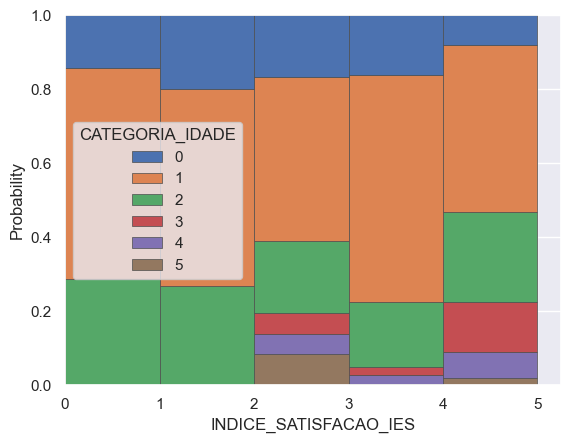

In [724]:
sns.set_theme(style="darkgrid")
sns.histplot(
    data=df_4_analise,
    x="INDICE_SATISFACAO_IES", hue="CATEGORIA_IDADE",
    #x="CATEGORIA_PJ", hue="labels",
    #x="RENDA_POR_HH_TOTAL", hue="REGIAO",
    multiple="fill",
    palette='deep',
    #palette="light:m",
    edgecolor=".3",
    linewidth=.5,
    log_scale=False,
    stat='probability',
    bins=6,
    binrange=(0,6), alpha=1, binwidth=1
)

<Axes: xlabel='FONTE_RENDA_AU', ylabel='Probability'>

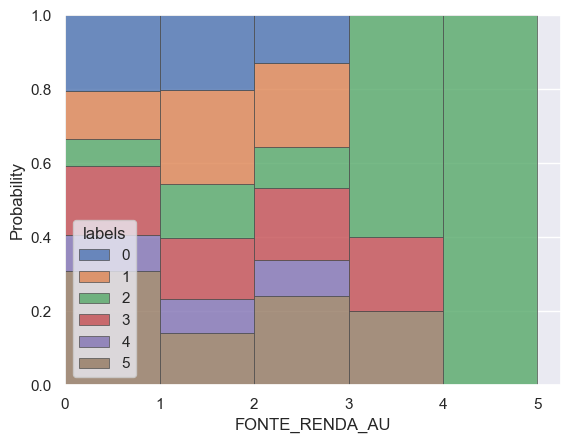

In [725]:
sns.histplot(
    data=df_4_analise,
    x="FONTE_RENDA_AU", hue="labels",
    stat='probability', 
    multiple="fill",
    palette='deep',
    #palette="light:m",
    edgecolor=".3",
    linewidth=.5,
    log_scale=False,
    bins=6,
    #common_norm=True,
    binrange=(0,6), alpha=.8, binwidth=1
)

<Axes: xlabel='CATEGORIA_PJ', ylabel='Probability'>

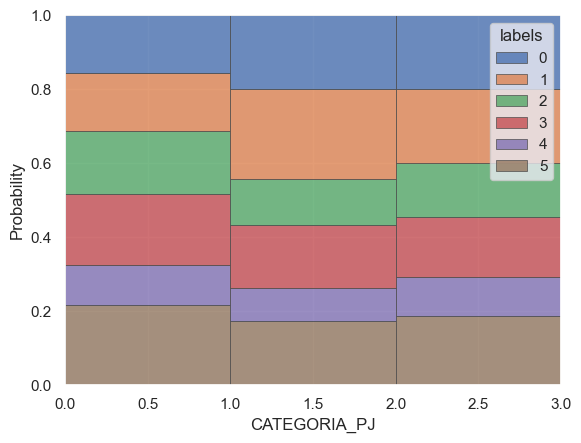

In [726]:
sns.histplot(
    data=df_4_analise,
    x="CATEGORIA_PJ", hue="labels",
    stat='probability', 
    multiple="fill",
    palette='deep',
    #palette="light:m",
    edgecolor=".3",
    linewidth=.5,
    log_scale=False,
    bins=3,
    #common_norm=True,
    binrange=(0,3), alpha=.8, binwidth=1
)

In [727]:
df_4_analise.groupby('labels')['FONTE_RENDA_AU'].describe()

count      mean       std  min  25%  50%  75%  max
labels                                                    
0       130.0  0.869231  0.488447  0.0  1.0  1.0  1.0  2.0
1       152.0  0.986842  0.445535  0.0  1.0  1.0  1.0  2.0
2        89.0  1.078652  0.643582  0.0  1.0  1.0  1.0  4.0
3       115.0  0.921739  0.579592  0.0  1.0  1.0  1.0  3.0
4        63.0  0.904762  0.530194  0.0  1.0  1.0  1.0  2.0
5       121.0  0.826446  0.666804  0.0  0.0  1.0  1.0  3.0

In [728]:
df_4_analise.groupby('labels')['RENDA_M_FAMILIAR'].describe()

count      mean       std  min  25%  50%   75%  max
labels                                                     
0       130.0  4.869231  1.615758  0.0  4.0  5.0  6.00  8.0
1       152.0  4.552632  1.654972  0.0  4.0  4.0  5.25  8.0
2        89.0  5.730337  1.826348  0.0  4.0  6.0  7.00  8.0
3       115.0  4.982609  1.654248  0.0  4.0  5.0  6.00  8.0
4        63.0  4.634921  1.687732  1.0  3.0  4.0  6.00  8.0
5       121.0  4.487603  1.678867  0.0  3.0  4.0  6.00  8.0

In [743]:
df_4_analise.groupby('labels')['CATEGORIA_PJ'].describe()

count      mean       std  min  25%  50%  75%  max
labels                                                    
0       130.0  1.015385  0.465635  0.0  1.0  1.0  1.0  2.0
1       152.0  1.013158  0.430414  0.0  1.0  1.0  1.0  2.0
2        89.0  0.966292  0.531923  0.0  1.0  1.0  1.0  2.0
3       115.0  0.965217  0.494362  0.0  1.0  1.0  1.0  2.0
4        63.0  0.984127  0.523390  0.0  1.0  1.0  1.0  2.0
5       121.0  0.966942  0.515330  0.0  1.0  1.0  1.0  2.0

In [744]:
df_4_analise.groupby('labels')['INDICE_FORMACAO_ACADEMICA'].describe()

count       mean       std  min  25%   50%   75%   max
labels                                                        
0       130.0  10.015385  3.270693  0.0  8.0  10.0  12.0  20.0
1       152.0   9.111842  3.106390  0.0  8.0   9.0  11.0  23.0
2        89.0  11.202247  3.980577  1.0  8.0  11.0  13.0  23.0
3       115.0   9.043478  4.467016  0.0  5.0   9.0  12.0  25.0
4        63.0   3.888889  2.765637  0.0  2.0   4.0   4.0  12.0
5       121.0   7.132231  6.118200  0.0  1.0   7.0  10.0  24.0

In [731]:
df_4_analise.groupby('labels')['INDICE_SATISFACAO_PROFISSIONAL'].describe()

count       mean       std  min   25%   50%   75%   max
labels                                                         
0       130.0  11.876923  2.588033  0.0  10.0  11.0  13.0  18.0
1       152.0  12.092105  2.836272  1.0   9.0  13.0  14.0  18.0
2        89.0  12.359551  3.628320  4.0  10.0  13.0  15.0  18.0
3       115.0  11.495652  3.721379  1.0   9.0  12.0  15.0  17.0
4        63.0  10.523810  3.962962  0.0   9.0  11.0  13.0  18.0
5       121.0   9.024793  3.597367  1.0   7.0   8.0  12.0  19.0

In [732]:
df_4_analise.groupby('labels')['ATUACAO_INT'].describe()

count      mean       std  min  25%  50%  75%  max
labels                                                    
0       130.0  0.784615  0.412679  0.0  1.0  1.0  1.0  1.0
1       152.0  0.763158  0.426550  0.0  1.0  1.0  1.0  1.0
2        89.0  0.662921  0.475390  0.0  0.0  1.0  1.0  1.0
3       115.0  0.600000  0.492042  0.0  0.0  1.0  1.0  1.0
4        63.0  0.746032  0.438776  0.0  0.5  1.0  1.0  1.0
5       121.0  0.652893  0.478030  0.0  0.0  1.0  1.0  1.0

In [733]:
df_4_analise.groupby('labels')['ATUACAO_AU'].describe()

count      mean       std  min  25%  50%  75%  max
labels                                                    
0       130.0  0.738462  0.441173  0.0  0.0  1.0  1.0  1.0
1       152.0  0.717105  0.451895  0.0  0.0  1.0  1.0  1.0
2        89.0  0.764045  0.427000  0.0  1.0  1.0  1.0  1.0
3       115.0  0.634783  0.483598  0.0  0.0  1.0  1.0  1.0
4        63.0  0.746032  0.438776  0.0  0.5  1.0  1.0  1.0
5       121.0  0.578512  0.495851  0.0  0.0  1.0  1.0  1.0

In [734]:
df_4_analise.groupby('labels')['ATUACAO_ENS'].describe()

count      mean       std  min  25%  50%  75%  max
labels                                                    
0       130.0  0.123077  0.329796  0.0  0.0  0.0  0.0  1.0
1       152.0  0.078947  0.270548  0.0  0.0  0.0  0.0  1.0
2        89.0  0.191011  0.395325  0.0  0.0  0.0  0.0  1.0
3       115.0  0.130435  0.338255  0.0  0.0  0.0  0.0  1.0
4        63.0  0.079365  0.272479  0.0  0.0  0.0  0.0  1.0
5       121.0  0.190083  0.393998  0.0  0.0  0.0  0.0  1.0

In [735]:
df_4_analise.groupby('labels')['ATUACAO_PUR'].describe()

count      mean       std  min  25%  50%  75%  max
labels                                                    
0       130.0  0.123077  0.329796  0.0  0.0  0.0  0.0  1.0
1       152.0  0.078947  0.270548  0.0  0.0  0.0  0.0  1.0
2        89.0  0.224719  0.419762  0.0  0.0  0.0  0.0  1.0
3       115.0  0.165217  0.373002  0.0  0.0  0.0  0.0  1.0
4        63.0  0.158730  0.368359  0.0  0.0  0.0  0.0  1.0
5       121.0  0.173554  0.380300  0.0  0.0  0.0  0.0  1.0

In [736]:
df_4_analise.groupby('labels')['ATUACAO_SEG'].describe()

count      mean       std  min  25%  50%  75%  max
labels                                                    
0       130.0  0.046154  0.210630  0.0  0.0  0.0  0.0  1.0
1       152.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
2        89.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
3       115.0  0.052174  0.223351  0.0  0.0  0.0  0.0  1.0
4        63.0  0.031746  0.176731  0.0  0.0  0.0  0.0  1.0
5       121.0  0.049587  0.217992  0.0  0.0  0.0  0.0  1.0

In [737]:
df_4_analise.groupby('labels')['ATUACAO_SEG'].agg(['sum', 'count', 'mean'])

sum  count      mean
labels                      
0         6    130  0.046154
1         0    152  0.000000
2         0     89  0.000000
3         6    115  0.052174
4         2     63  0.031746
5         6    121  0.049587

In [434]:
def min_max_diff(group):
    return group.sum() / group.count()

In [442]:
df_4_analise.groupby('labels')['ATUACAO_COMP'].apply(min_max_diff)

labels
0    0.120000
1    0.254902
2    0.134328
3    0.170854
4    0.206186
5    0.266667
Name: ATUACAO_COMP, dtype: float64

In [ ]:
'ATUACAO_INT', 'ATUACAO_PSG', 'ATUACAO_AU', 'ATUACAO_COMP', 'ATUACAO_SEG', 'ATUACAO_PAT', 'ATUACAO_OUTROS', 'ATUACAO_PUR', 'ATUACAO_GEO', 'ATUACAO_ENS', 'labels']

<Axes: xlabel='labels', ylabel='RENDA_M_INDIVIDUAL'>

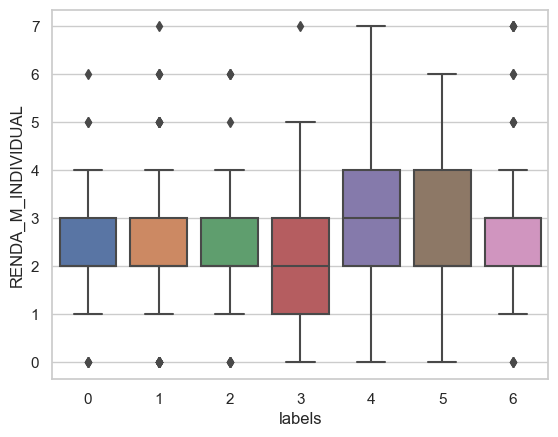

In [283]:
sns.set_theme(style="whitegrid")
sns.boxplot(
    data=df_4_analise,
    x="labels",
    y="RENDA_M_INDIVIDUAL",
    dodge=False
    #hue='deck',
    #palette='deck'
    )

In [738]:
df_4_analise.loc[(df_4_analise.labels == 1)]

index  RENDA_M_INDIVIDUAL  RENDA_M_FAMILIAR  FONTE_RENDA_AU  \
0       32                   3                 4               1   
3      340                   2                 6               0   
6      441                   3                 4               1   
10     602                   3                 6               1   
11     615                   2                 3               1   
..     ...                 ...               ...             ...   
654  44705                   4                 5               1   
657  44811                   4                 7               1   
661  45032                   0                 5               1   
668  45353                   2                 4               2   
669  45354                   2                 4               1   

     FONTE_RENDA_NAO_AU  FONTE_RENDA_EXTRA  HH_EM_AU  HH_FORA_AU  \
0                     0                  0         5           1   
3                     1                  0         0           0   
6                     0                  0         6           1   
10                    0                  0         6           0   
11                    0                  0         6           1   
..                  ...                ...       ...         ...   
654                   0                  0         5           1   
657                   0                  0         6           1   
661                   0                  0         1           1   
668                   0                  0         5           1   
669                   0                  0         6           0   

     ESCOLARIDADE  INDICE_FORMACAO_ACADEMICA  ...  ATUACAO_PSG  ATUACAO_AU  \
0               1                          8  ...            0           1   
3               1                         12  ...            0           1   
6               1                         10  ...            0           1   
10              1                          8  ...            1           1   
11              0                          8  ...            0           1   
..            ...                        ...  ...          ...         ...   
654             2                         15  ...            0           1   
657             2                         12  ...            0           1   
661             1                         10  ...            0           0   
668             0                          9  ...            1           0   
669             0                          1  ...            0           1   

     ATUACAO_COMP  ATUACAO_SEG  ATUACAO_PAT  ATUACAO_OUTROS  ATUACAO_PUR  \
0               0            0            0               0            0   
3               1            0            0               0            0   
6               0            0            0               0            0   
10              0            0            1               0            0   
11              0            0            0               1            0   
..            ...          ...          ...             ...          ...   
654             0            0            0               0            1   
657             0            0            0               0            0   
661             0            0            0               1            0   
668             0            0            0               0            0   
669             0            0            0               0            0   

     ATUACAO_GEO  ATUACAO_ENS  labels  
0              0            0       1  
3              0            0       1  
6              0            0       1  
10             0            0       1  
11             0            0       1  
..           ...          ...     ...  
654            1            0       1  
657            0            1       1  
661            0            0       1  
668            0            1       1  
669            0            0       1  

[152 rows x 34 columns]

<Axes: xlabel='HH_EM_AU', ylabel='Probability'>

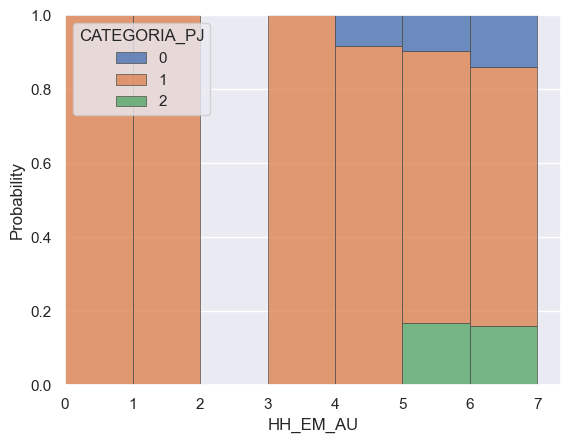

In [739]:
sns.histplot(
    data=df_4_analise.loc[(df_4_analise.labels == 0)],
    #x="FONTE_RENDA_AU", hue="CATEGORIA_PJ",
    x="HH_EM_AU", hue="CATEGORIA_PJ",
    #x="INDICE_SATISFACAO_PROFISSIONAL", hue="CATEGORIA_PJ",
    stat='probability', 
    multiple="fill",
    palette='deep',
    #palette="light:m",
    edgecolor=".3",
    linewidth=.5,
    log_scale=False,
    alpha=.8,
    bins=1,
    binrange=(0,30), 
    #common_norm=True,
     binwidth=1
)

In [363]:
dataframes = [df_4_analise[df_4_analise['labels'] == i] for i in range(6)]

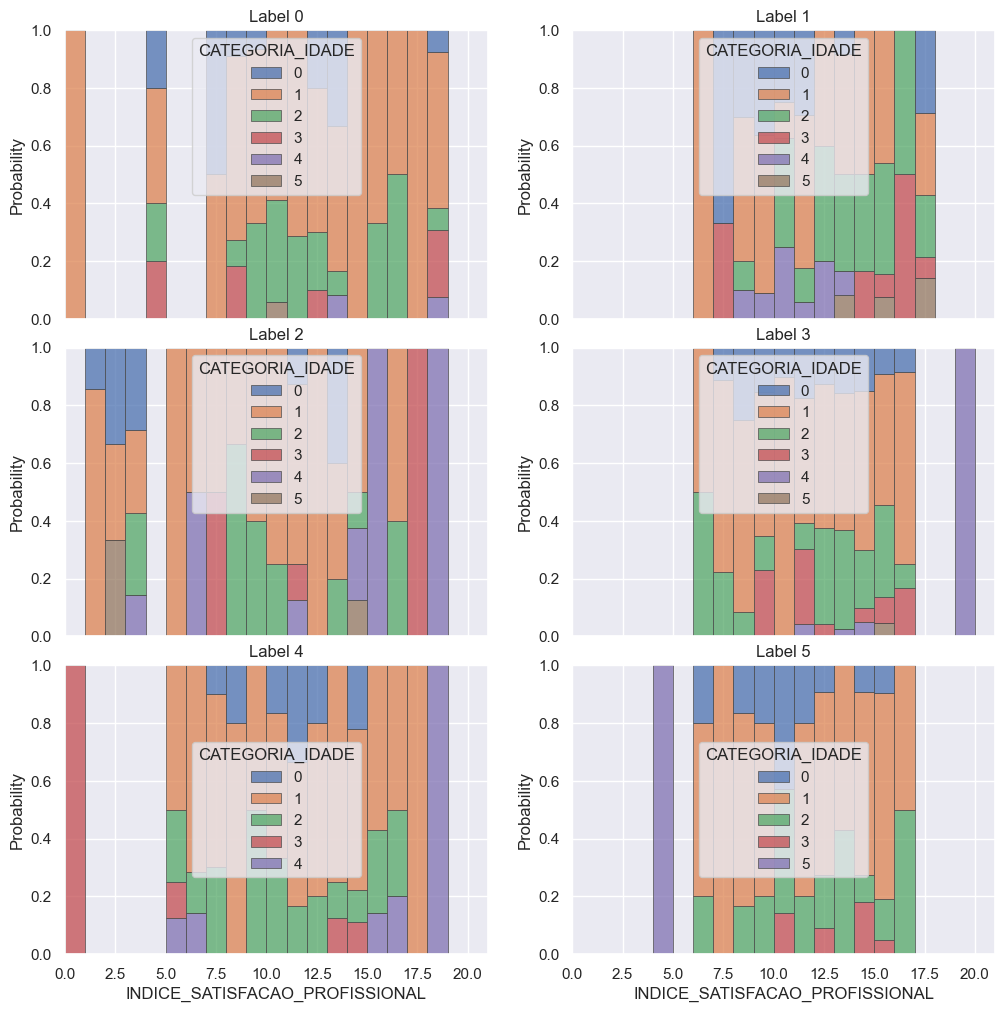

In [740]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12), sharex=True)
fig.subplots_adjust(hspace=0.1)

# Itere sobre os DataFrames e plote os histogramas
for i, ax in enumerate(axes.ravel()):
    if i < len(dataframes):
        sns.histplot(
            data=dataframes[i],
            x='INDICE_SATISFACAO_PROFISSIONAL', hue='CATEGORIA_IDADE',
            stat='probability',
            palette='deep',
            #kde=True,
            ax=ax,
            multiple='fill',
            #multiple='dodge',
            edgecolor=".3",
            linewidth=.5,
            log_scale=False,
            binwidth=1,
            binrange=(0,30), 
            )
        ax.set_title(f'Label {i}')
    else:
        ax.axis('off')


arquivo = 'INDICE_SATISFACAO_PROFISSIONAL.png'
plt.savefig(os.path.join(diretorio, arquivo))
plt.show()

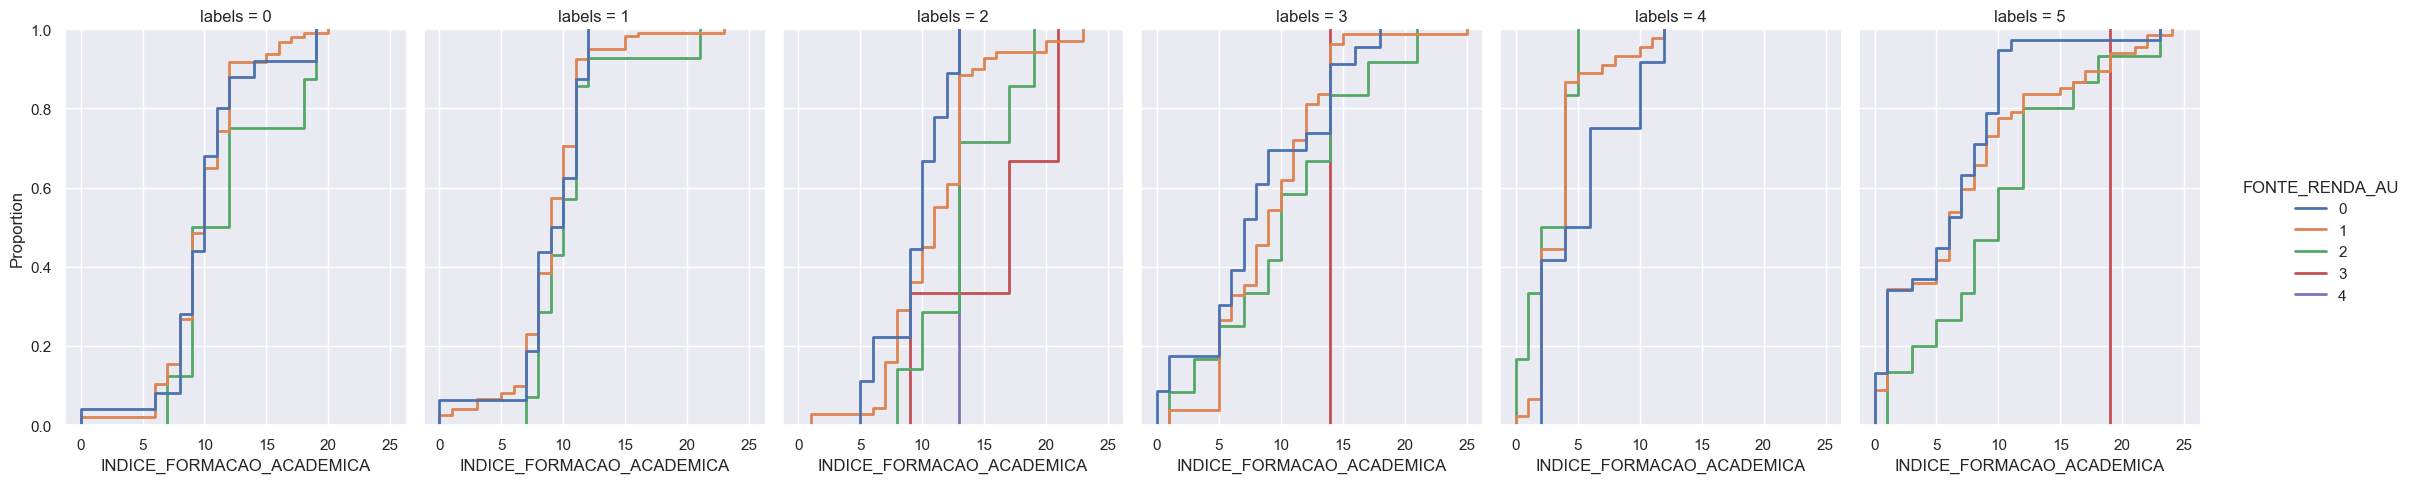

In [741]:
sns.displot(
    df_4_analise,
    x="INDICE_FORMACAO_ACADEMICA", col="labels", hue="FONTE_RENDA_AU",
    kind="ecdf", aspect=.75, linewidth=2, palette='deep',
)

<Axes: xlabel='RENDA_M_INDIVIDUAL', ylabel='Probability'>

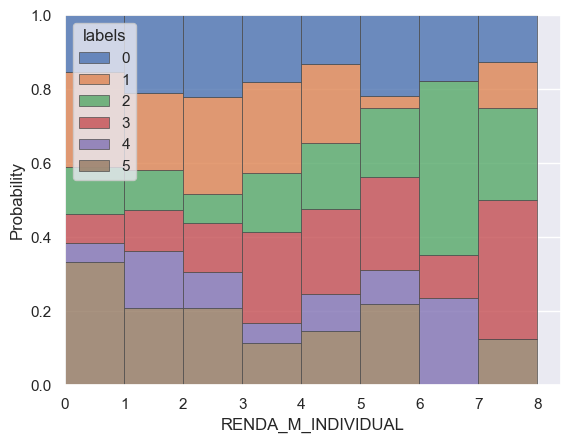

In [742]:
sns.histplot(
    data=df_4_analise,
    x="RENDA_M_INDIVIDUAL", hue="labels",
    stat='probability', 
    multiple="fill",
    palette='deep',
    #palette="light:m",
    edgecolor=".3",
    linewidth=.5,
    log_scale=False,
    alpha=.8,
    bins=1,
    binrange=(0,10), 
    #common_norm=True,
     binwidth=1
)

<Axes: xlabel='FONTE_RENDA_AU', ylabel='Probability'>

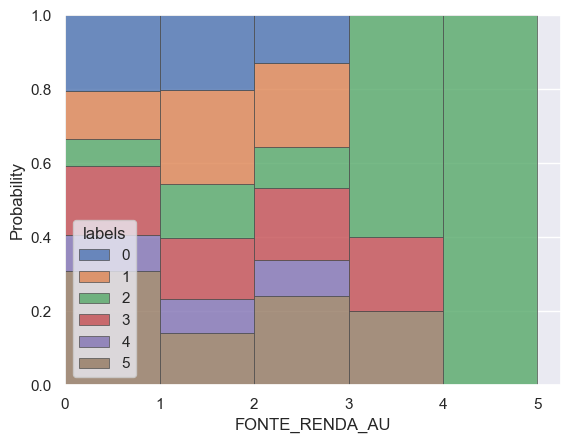

In [745]:
sns.histplot(
    data=df_4_analise,
    x="FONTE_RENDA_AU", hue="labels",
    stat='probability', 
    multiple="fill",
    palette='deep',
    #palette="light:m",
    edgecolor=".3",
    linewidth=.5,
    log_scale=False,
    alpha=.8,
    bins=1,
    binrange=(0,10), 
    #common_norm=True,
     binwidth=1
)

<Axes: xlabel='INDICE_SATISFACAO_PROFISSIONAL', ylabel='Probability'>

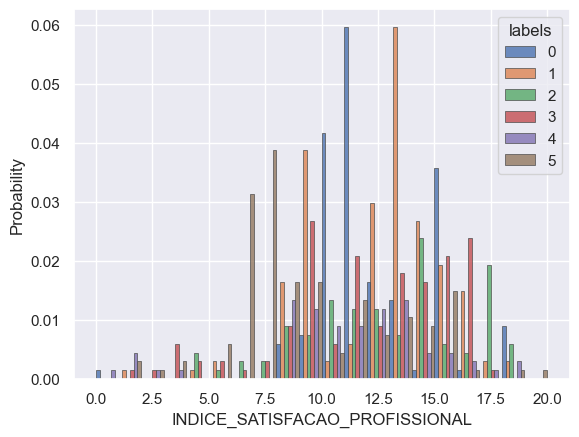

In [753]:
sns.histplot(
    data=df_4_analise,
    x="INDICE_SATISFACAO_PROFISSIONAL", hue="labels",
    stat='probability', 
    multiple="dodge",
    palette='deep',
    #palette="light:m",
    edgecolor=".3",
    linewidth=.5,
    log_scale=False,
    alpha=.8,
    bins=1,
    binrange=(0,20), 
    #common_norm=True,
     binwidth=1
)

In [ ]:
#['index', 'RENDA_M_INDIVIDUAL', 'RENDA_M_FAMILIAR', 'FONTE_RENDA_AU', 'FONTE_RENDA_NAO_AU', 'FONTE_RENDA_EXTRA', 'HH_EM_AU', 'HH_FORA_AU', 'ESCOLARIDADE', 'INDICE_FORMACAO_ACADEMICA', 'INDICE_SATISFACAO_IES', 'QNTD_IDIOMAS',
#'INDICE_PARTICIPACAO_EVENTOS', 'INDICE_OBSTACULOS_PROFISSIONAIS', 'INDICE_SATISFACAO_PROFISSIONAL', 'AVALIACAO_MERCADO_AU', 'AVALIACAO_MERCADO_OUTROS', 'INDICE_PROJ_OBRA', 'DOMINIO_INFORMATICA', 'CATEGORIA_IDADE', 'CATEGORIA_GENERO', 'REGIAO', 'CATEGORIA_PJ', 'ATUACAO_INT', 'ATUACAO_PSG', 'ATUACAO_AU', 'ATUACAO_COMP', 'ATUACAO_SEG', 'ATUACAO_PAT', 'ATUACAO_OUTROS', 'ATUACAO_PUR', 'ATUACAO_GEO', 'ATUACAO_ENS', 'labels']

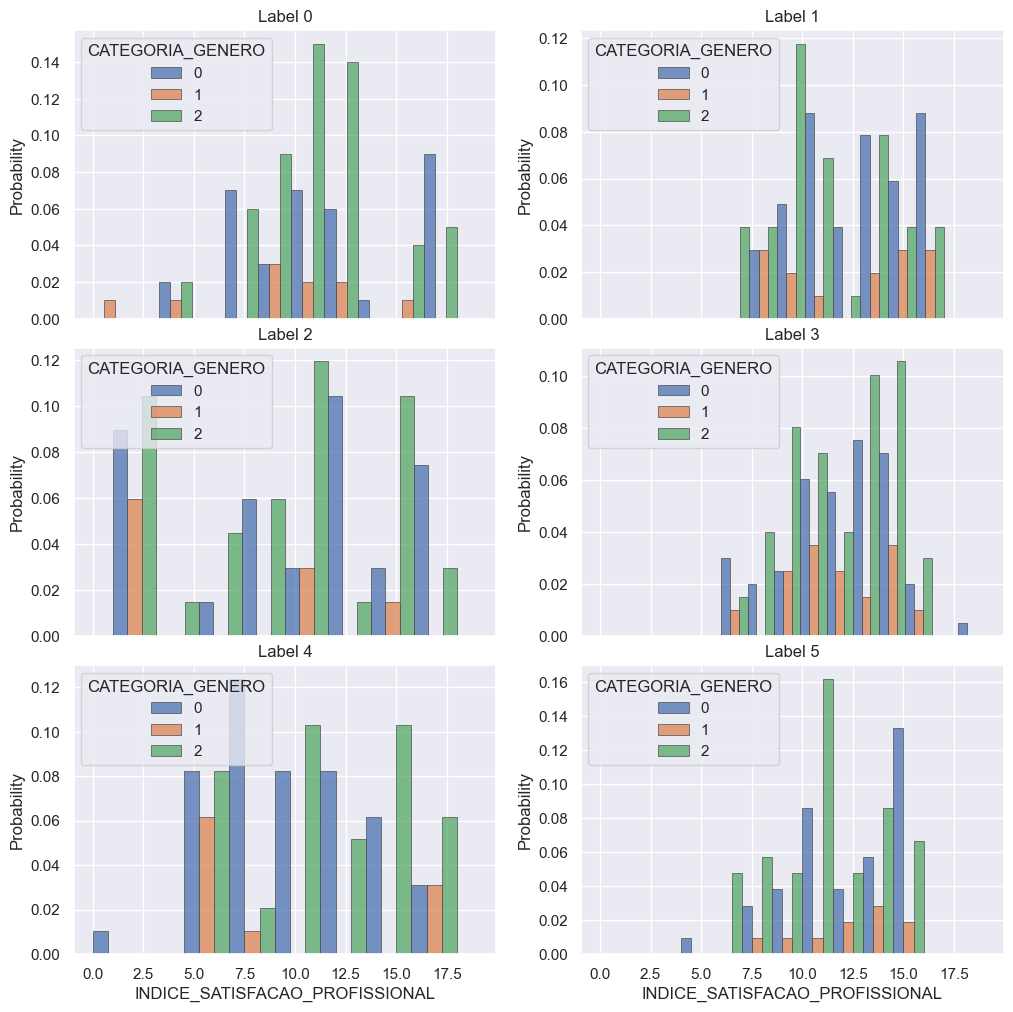

In [766]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12), sharex=True)
fig.subplots_adjust(hspace=0.1)

# Itere sobre os DataFrames e plote os histogramas
for i, ax in enumerate(axes.ravel()):
    if i < len(dataframes):
        sns.histplot(
            data=dataframes[i],
            x='INDICE_SATISFACAO_PROFISSIONAL', hue='CATEGORIA_GENERO',
            stat='probability',
            palette='deep',
            #kde=True,
            ax=ax,
            multiple='dodge',
            edgecolor=".3",
            linewidth=.5,
            log_scale=False,
            #binwidth=1,
            #binrange=(10,20), 
            )
        ax.set_title(f'Label {i}')
    else:
        ax.axis('off')


arquivo = 'INDICE_SATISFACAO_PROFISSIONAL.png'
plt.savefig(os.path.join(diretorio, arquivo))
plt.show()

In [769]:
df_4_analise.loc[(df_4_analise.labels == 0)]

index  RENDA_M_INDIVIDUAL  RENDA_M_FAMILIAR  FONTE_RENDA_AU  \
5      416                   1                 7               1   
12     685                   1                 5               1   
18     963                   1                 3               1   
25    1359                   5                 7               1   
26    1606                   3                 6               1   
..     ...                 ...               ...             ...   
658  44924                   2                 6               1   
659  44965                   3                 6               0   
660  44987                   3                 4               1   
666  45278                   4                 6               1   
667  45346                   2                 4               1   

     FONTE_RENDA_NAO_AU  FONTE_RENDA_EXTRA  HH_EM_AU  HH_FORA_AU  \
5                     0                  0         6           1   
12                    1                  1         5           5   
18                    0                  0         1           1   
25                    0                  0         6           1   
26                    0                  1         4           4   
..                  ...                ...       ...         ...   
658                   0                  1         5           2   
659                   1                  0         4           5   
660                   0                  0         5           0   
666                   0                  0         6           1   
667                   0                  0         6           6   

     ESCOLARIDADE  INDICE_FORMACAO_ACADEMICA  ...  ATUACAO_PSG  ATUACAO_AU  \
5               0                          9  ...            0           1   
12              1                          9  ...            0           0   
18              0                          9  ...            0           1   
25              1                          6  ...            0           1   
26              1                          8  ...            1           0   
..            ...                        ...  ...          ...         ...   
658             0                          9  ...            1           1   
659             1                         14  ...            1           1   
660             2                         18  ...            0           0   
666             1                          9  ...            0           1   
667             0                         11  ...            1           1   

     ATUACAO_COMP  ATUACAO_SEG  ATUACAO_PAT  ATUACAO_OUTROS  ATUACAO_PUR  \
5               0            0            0               0            0   
12              0            0            0               0            0   
18              0            0            0               1            0   
25              0            0            0               0            0   
26              0            0            0               1            0   
..            ...          ...          ...             ...          ...   
658             1            0            0               1            0   
659             0            0            1               0            1   
660             0            0            0               0            0   
666             0            0            0               0            0   
667             0            0            0               0            0   

     ATUACAO_GEO  ATUACAO_ENS  labels  
5              0            0       0  
12             0            0       0  
18             0            0       0  
25             0            0       0  
26             0            0       0  
..           ...          ...     ...  
658            0            0       0  
659            0            0       0  
660            0            1       0  
666            0            1       0  
667            0            0       0  

[130 rows x 34 columns]

In [781]:
df_4_analise.loc[(df_4_analise.labels == 0)].drop(labels=['REGIAO','CATEGORIA_PJ','CATEGORIA_IDADE','labels'],axis=1).corr(method='pearson')

index  RENDA_M_INDIVIDUAL  \
index                            1.000000            0.315254   
RENDA_M_INDIVIDUAL               0.315254            1.000000   
RENDA_M_FAMILIAR                 0.071764            0.389709   
FONTE_RENDA_AU                  -0.101707            0.108684   
FONTE_RENDA_NAO_AU              -0.042467           -0.028025   
FONTE_RENDA_EXTRA                0.006152           -0.198206   
HH_EM_AU                         0.114331            0.269146   
HH_FORA_AU                       0.104183           -0.089534   
ESCOLARIDADE                     0.115267            0.199033   
INDICE_FORMACAO_ACADEMICA        0.180444            0.065763   
INDICE_SATISFACAO_IES            0.162758            0.089094   
QNTD_IDIOMAS                    -0.118117            0.077420   
INDICE_PARTICIPACAO_EVENTOS     -0.073749            0.061309   
INDICE_OBSTACULOS_PROFISSIONAIS -0.068238           -0.226276   
INDICE_SATISFACAO_PROFISSIONAL   0.046515            0.113745   
AVALIACAO_MERCADO_AU            -0.022320           -0.039343   
AVALIACAO_MERCADO_OUTROS         0.066160           -0.148496   
INDICE_PROJ_OBRA                 0.038944            0.039846   
DOMINIO_INFORMATICA             -0.123483           -0.140853   
CATEGORIA_GENERO                -0.049933           -0.203382   
ATUACAO_INT                     -0.195912           -0.253288   
ATUACAO_PSG                      0.003280            0.047370   
ATUACAO_AU                       0.106373           -0.001866   
ATUACAO_COMP                    -0.000116            0.123129   
ATUACAO_SEG                     -0.070080            0.015630   
ATUACAO_PAT                      0.075555           -0.038937   
ATUACAO_OUTROS                   0.035195            0.138056   
ATUACAO_PUR                      0.018638           -0.027452   
ATUACAO_GEO                     -0.137438           -0.090595   
ATUACAO_ENS                      0.221379            0.170811   

                                 RENDA_M_FAMILIAR  FONTE_RENDA_AU  \
index                                    0.071764   -1.017069e-01   
RENDA_M_INDIVIDUAL                       0.389709    1.086840e-01   
RENDA_M_FAMILIAR                         1.000000    3.709833e-02   
FONTE_RENDA_AU                           0.037098    1.000000e+00   
FONTE_RENDA_NAO_AU                       0.039780   -3.901806e-01   
FONTE_RENDA_EXTRA                       -0.045241   -4.705664e-01   
HH_EM_AU                                 0.178318    5.152530e-01   
HH_FORA_AU                              -0.102765   -3.812531e-01   
ESCOLARIDADE                             0.021061    6.036814e-03   
INDICE_FORMACAO_ACADEMICA               -0.119900    6.920207e-02   
INDICE_SATISFACAO_IES                   -0.079313   -6.824149e-02   
QNTD_IDIOMAS                             0.237356    2.055520e-02   
INDICE_PARTICIPACAO_EVENTOS              0.064146    1.333779e-01   
INDICE_OBSTACULOS_PROFISSIONAIS         -0.084060   -4.374974e-02   
INDICE_SATISFACAO_PROFISSIONAL           0.231555    2.396311e-02   
AVALIACAO_MERCADO_AU                     0.034788   -1.163718e-01   
AVALIACAO_MERCADO_OUTROS                -0.001688   -1.060980e-01   
INDICE_PROJ_OBRA                         0.177275   -6.412767e-02   
DOMINIO_INFORMATICA                     -0.002206    1.571398e-01   
CATEGORIA_GENERO                         0.139282   -4.016630e-17   
ATUACAO_INT                             -0.065820    8.993116e-02   
ATUACAO_PSG                              0.033455    7.641216e-02   
ATUACAO_AU                              -0.157101    9.187106e-02   
ATUACAO_COMP                            -0.071272    1.239706e-01   
ATUACAO_SEG                             -0.073240    5.911932e-02   
ATUACAO_PAT                             -0.222596   -5.126082e-02   
ATUACAO_OUTROS                           0.170452   -8.993116e-02   
ATUACAO_PUR                              0.030438   -4.368027e-02   
ATUACAO_GEO        

<Axes: >

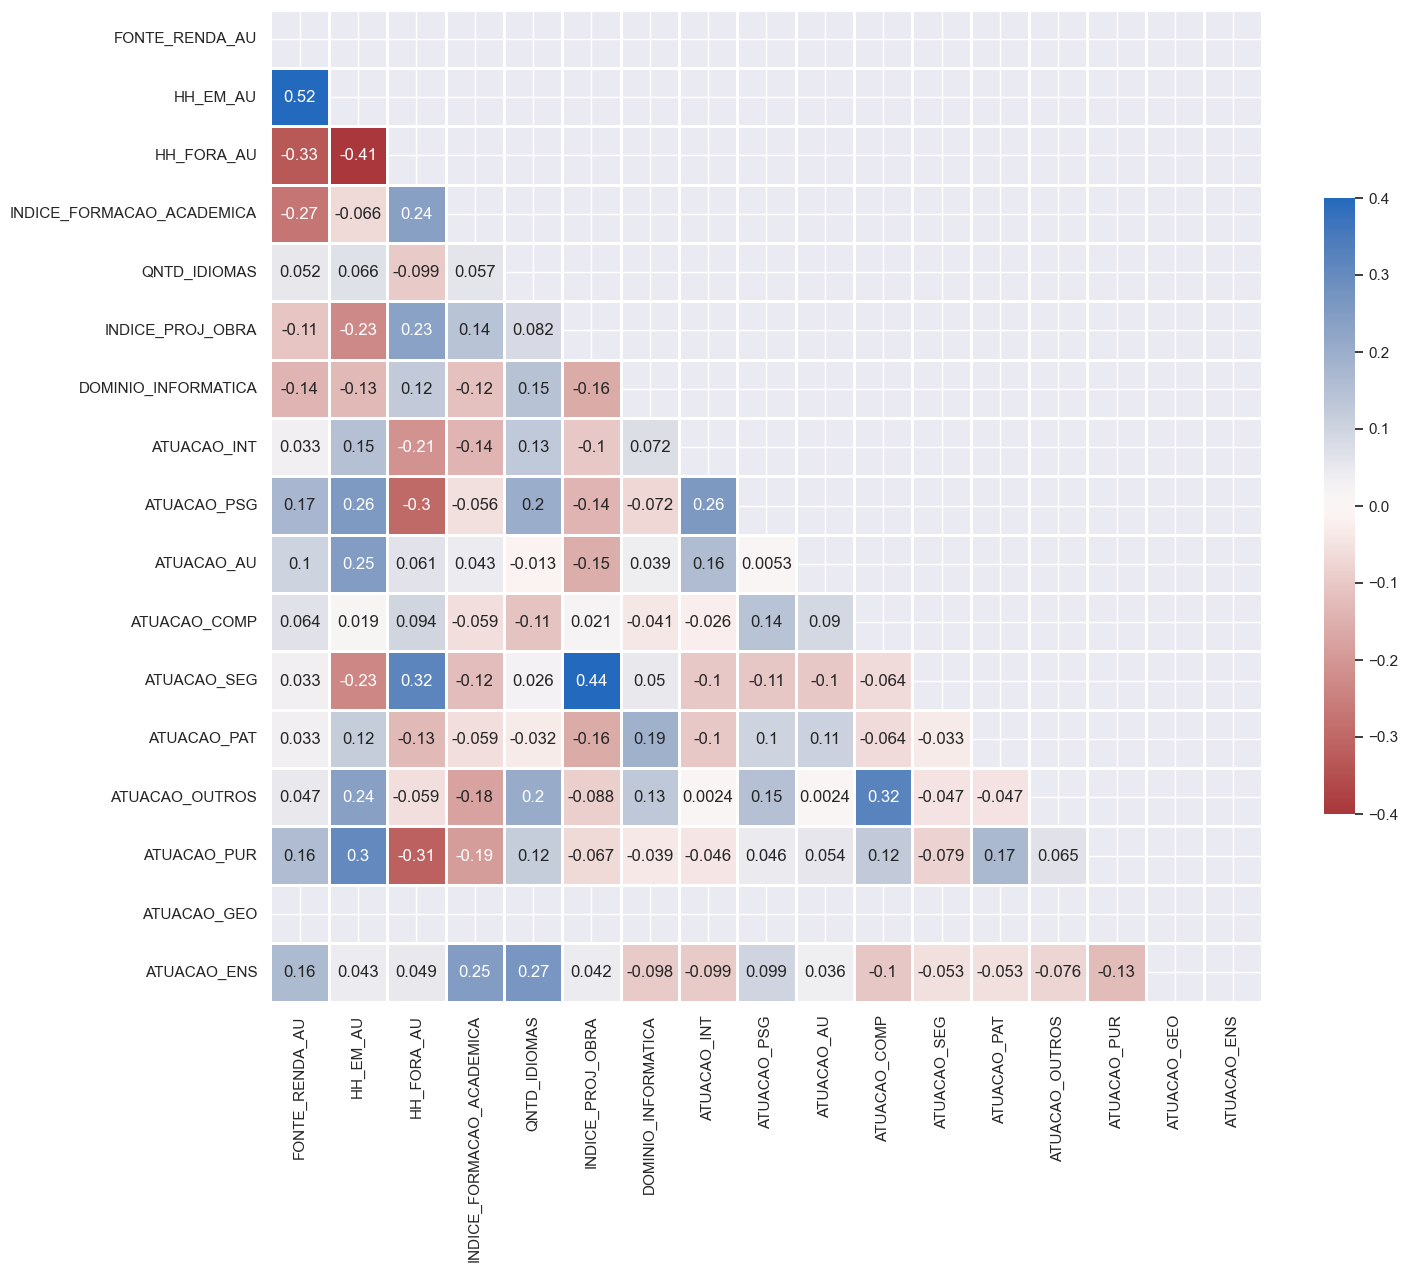

In [819]:
sns.set_theme(style="darkgrid")
corr = df_4_analise.loc[(df_4_analise.labels == 4)].drop(
    labels=['REGIAO','CATEGORIA_PJ','CATEGORIA_IDADE','labels','index','RENDA_M_FAMILIAR','RENDA_M_INDIVIDUAL','FONTE_RENDA_EXTRA','ESCOLARIDADE','INDICE_SATISFACAO_IES','INDICE_OBSTACULOS_PROFISSIONAIS','FONTE_RENDA_NAO_AU','CATEGORIA_GENERO','AVALIACAO_MERCADO_AU','AVALIACAO_MERCADO_OUTROS','INDICE_PARTICIPACAO_EVENTOS','INDICE_SATISFACAO_PROFISSIONAL'],
    axis=1,
    ).corr(method='pearson')
#corr = df_sns.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(16, 16))

cmap = sns.color_palette("vlag_r", as_cmap=True)
#cmap = sns.color_palette("viridis", as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.4, vmin=-.4, center=0,
            annot=True, square=True, linewidths=.9, cbar_kws={"shrink": .5})